In [1]:
# 1 - IMPORTACION DE LIBRERIAS
import numpy as np
import pandas as pd

# LIBRERIAS PARA HACER GRAFICOS
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as xp

In [2]:
# 2 - CARGA DEL FICHERO DE DATOS
# Instalar la biblioteca pydrive
!pip install pydrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Autenticarse y crear el cliente PyDrive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Usar el ID del archivo proporcionado
file_id = '1oFanAV79Sdk6gQtDtdEj2xQUfrQJNEFp'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('SM_datos_análisis_limpios.csv')

import pandas as pd
data = pd.read_csv('SM_datos_análisis_limpios.csv')
data.head()


SEQN SEXO  EDAD                ETNIA   TS    CAB  GLU  HDL  TRG   ERT  \
0  73567    M    65  Blanco No-Hispánico  141   93.7  104   79   39  4.35   
1  73568    F    26  Blanco No-Hispánico  105   73.7   81   96   31  4.81   
2  73574    F    33                Otros  121   78.7   89   53   23  4.59   
3  73577    M    32   Mexicano Americano  119  100.0   97   33  151  5.22   
4  73581    M    50                Otros  133   99.3  104   78  107  4.73   

   ...  BASO  PLQ  VPM  CAB+  TAS+  GLU+  HDL+  TRG+  N+  SM  
0  ...   0.1  187  7.7     0     1     1     0     0   2   0  
1  ...   0.0  231  9.3     0     0     0     0     0   0   0  
2  ...   0.0  210  9.6     0     0     0     0     0   0   0  
3  ...   0.0  330  7.4     0     0     0     1     1   2   0  
4  ...   0.0  172  8.1     0     1     1     0     0   2   0  

[5 rows x 36 columns]

In [3]:
# 3 - INFORMACION DEL CONJUNTO DE DATOS
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    2178 non-null   int64  
 1   SEXO    2178 non-null   object 
 2   EDAD    2178 non-null   int64  
 3   ETNIA   2178 non-null   object 
 4   TS      2178 non-null   int64  
 5   CAB     2178 non-null   float64
 6   GLU     2178 non-null   int64  
 7   HDL     2178 non-null   int64  
 8   TRG     2178 non-null   int64  
 9   ERT     2178 non-null   float64
 10  HGB     2178 non-null   float64
 11  HCT     2178 non-null   float64
 12  VCM     2178 non-null   float64
 13  HCM     2178 non-null   float64
 14  CHCM    2178 non-null   float64
 15  RDW     2178 non-null   float64
 16  LEUC    2178 non-null   float64
 17  LINF%   2178 non-null   float64
 18  MONO%   2178 non-null   float64
 19  NEUT%   2178 non-null   float64
 20  EOSI%   2178 non-null   float64
 21  BASO%   2178 non-null   float64
 22  

In [4]:
# 4 - NUMERO DE VALORES UNICOS PARA CADA VARIABLE
data.agg(['nunique']).T

nunique
SEQN      2178
SEXO         2
EDAD        62
ETNIA        5
TS          93
CAB        602
GLU        132
HDL         89
TRG        379
ERT        245
HGB         98
HCT        222
VCM        310
HCM        164
CHCM        70
RDW         83
LEUC       127
LINF%      381
MONO%      119
NEUT%      412
EOSI%      116
BASO%       27
LINF        44
MONO        14
NEUT       110
EOSI        18
BASO         3
PLQ        292
VPM         61
CAB+         2
TAS+         2
GLU+         2
HDL+         2
TRG+         2
N+           6
SM           2

In [5]:
# 5 - ANALISIS DESCRIPTIVO - NULOS
data.isnull().sum()

SEQN     0
SEXO     0
EDAD     0
ETNIA    0
TS       0
CAB      0
GLU      0
HDL      0
TRG      0
ERT      0
HGB      0
HCT      0
VCM      0
HCM      0
CHCM     0
RDW      0
LEUC     0
LINF%    0
MONO%    0
NEUT%    0
EOSI%    0
BASO%    0
LINF     0
MONO     0
NEUT     0
EOSI     0
BASO     0
PLQ      0
VPM      0
CAB+     0
TAS+     0
GLU+     0
HDL+     0
TRG+     0
N+       0
SM       0
dtype: int64

In [6]:
# 6 -ELIMINAR COLUMNAS NO NECESARIAS
columns_to_drop = ["SEQN"]
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])
data.head()


SEXO  EDAD                ETNIA   TS    CAB  GLU  HDL  TRG   ERT   HGB  ...  \
0    M    65  Blanco No-Hispánico  141   93.7  104   79   39  4.35  15.2  ...   
1    F    26  Blanco No-Hispánico  105   73.7   81   96   31  4.81  15.1  ...   
2    F    33                Otros  121   78.7   89   53   23  4.59  11.9  ...   
3    M    32   Mexicano Americano  119  100.0   97   33  151  5.22  15.5  ...   
4    M    50                Otros  133   99.3  104   78  107  4.73  14.8  ...   

   BASO  PLQ  VPM  CAB+  TAS+  GLU+  HDL+  TRG+  N+  SM  
0   0.1  187  7.7     0     1     1     0     0   2   0  
1   0.0  231  9.3     0     0     0     0     0   0   0  
2   0.0  210  9.6     0     0     0     0     0   0   0  
3   0.0  330  7.4     0     0     0     1     1   2   0  
4   0.0  172  8.1     0     1     1     0     0   2   0  

[5 rows x 35 columns]

Eliminar los outliers. La distancia de Mahalanobis es una métrica que se utiliza para identificar outliers en un conjunto de datos multivariante. A diferencia de los métodos univariantes que tratan cada variable de forma individual, la distancia de Mahalanobis toma en cuenta la correlación entre variables. Este método es especialmente útil cuando se sospecha que los outliers son el resultado de una combinación de características, y no solo de variaciones extremas en una sola característica. Como algunos parámetros del Hemograma tienen intervalos de referencia que difieren entre los sexos, los outliers serán eliminados dentro de cada una de las categorías SEXO.

In [7]:
# 7 - ELIMINAR OUTLIERS DENTRO DE CADA SEXO - DISTANCIA DE MAHALANOBIS
# Identificación de las variables numéricas
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()

# Mostrar las variables numéricas identificadas
numeric_columns


['EDAD',
 'TS',
 'CAB',
 'GLU',
 'HDL',
 'TRG',
 'ERT',
 'HGB',
 'HCT',
 'VCM',
 'HCM',
 'CHCM',
 'RDW',
 'LEUC',
 'LINF%',
 'MONO%',
 'NEUT%',
 'EOSI%',
 'BASO%',
 'LINF',
 'MONO',
 'NEUT',
 'EOSI',
 'BASO',
 'PLQ',
 'VPM',
 'CAB+',
 'TAS+',
 'GLU+',
 'HDL+',
 'TRG+',
 'N+',
 'SM']

In [8]:
# Importación de las bibliotecas necesarias
import pandas as pd
from scipy.spatial import distance
import numpy as np

# División del conjunto de datos en grupos según la variable 'SEXO'
grouped_data = data.groupby('SEXO')

# Inicialización de listas para almacenar los índices de los outliers en cada grupo de sexo
outliers_indices_M = []
outliers_indices_F = []

# Cálculo de la distancia de Mahalanobis y detección de outliers en cada grupo
for name, group in grouped_data:
    # Filtrado de solo las columnas numéricas para el cálculo
    group_numeric = group[numeric_columns]

    # Cálculo de la media y la matriz de covarianza inversa
    mean = group_numeric.mean()
    inv_cov_matrix = np.linalg.pinv(group_numeric.cov())

    # Cálculo de la distancia de Mahalanobis para cada observación en el grupo
    mahalanobis_distancia = group_numeric.apply(lambda x: distance.mahalanobis(x, mean, inv_cov_matrix)**2, axis=1)

    # Identificación de outliers usando el criterio de chi-cuadrado con p=0.01 (nivel de confianza del 99%)
    critical_value = len(numeric_columns) * 2.576  # Valor crítico para chi-cuadrado con p=0.01
    outliers = np.where(mahalanobis_distancia > critical_value)

    # Almacenamiento de los índices de los outliers detectados
    if name == 'M':
        outliers_indices_M.extend(group.iloc[outliers].index.tolist())
    else:
        outliers_indices_F.extend(group.iloc[outliers].index.tolist())

# Eliminación de los outliers de cada grupo de sexo del conjunto de datos original
data_clean = data.drop(index=outliers_indices_M + outliers_indices_F)

# Número total de datos antes de la eliminación de outliers
total_data_before = len(data)

# Número total de datos después de la eliminación de outliers
total_data_after = len(data_clean)

# Número de outliers eliminados por cada grupo de sexo
num_outliers_M = len(outliers_indices_M)
num_outliers_F = len(outliers_indices_F)

# Impresión de los resultados
print(f"Número total de datos antes de la eliminación de outliers: {total_data_before}")
print(f"Número total de datos después de la eliminación de outliers: {total_data_after}")
print(f"Número de outliers eliminados en el grupo de sexo 'M': {num_outliers_M}")
print(f"Número de outliers eliminados en el grupo de sexo 'F': {num_outliers_F}")


Número total de datos antes de la eliminación de outliers: 2178
Número total de datos después de la eliminación de outliers: 2120
Número de outliers eliminados en el grupo de sexo 'M': 29
Número de outliers eliminados en el grupo de sexo 'F': 29


Se han identificado 29 outliers en el grupo de sexo masculino (M) y 29 outliers en el grupo de sexo femenino (F), utilizando la distancia de Mahalanobis y un nivel de confianza del 99%.

In [9]:
from google.colab import files

# Guardar el DataFrame 'data_clean' en un archivo CSV
data_clean.to_csv('conjunto_de_datos_limpios_sin_outliers.csv', index=False)

# Descargar el archivo CSV
#files.download('conjunto_de_datos_limpios_sin_outliers.csv')

In [10]:
# 8 - MEDIDAS DE CENTRALIZACION, LOCALIZACION Y DISPERSION
data_clean.describe(include='all')


SEXO         EDAD                ETNIA           TS          CAB  \
count   2120  2120.000000                 2120  2120.000000  2120.000000   
unique     2          NaN                    5          NaN          NaN   
top        M          NaN  Blanco No-Hispánico          NaN          NaN   
freq    1158          NaN                  707          NaN          NaN   
mean     NaN    37.308019                  NaN   117.616981    94.042358   
std      NaN    14.435907                  NaN    14.604508    15.592028   
min      NaN    18.000000                  NaN    87.000000    61.500000   
25%      NaN    25.000000                  NaN   107.750000    82.500000   
50%      NaN    35.000000                  NaN   115.000000    92.050000   
75%      NaN    47.000000                  NaN   125.000000   103.200000   
max      NaN    80.000000                  NaN   207.000000   164.200000   

                GLU          HDL          TRG          ERT          HGB  ...  \
count   2120.000000  2120.000000  2120.000000  2120.000000  2120.000000  ...   
unique          NaN          NaN          NaN          NaN          NaN  ...   
top             NaN          NaN          NaN          NaN          NaN  ...   
freq            NaN          NaN          NaN          NaN          NaN  ...   
mean      93.874057    52.157547   137.311321     4.749118    14.251274  ...   
std       19.435757    14.753558   105.561486     0.464361     1.503037  ...   
min       49.000000    17.000000    20.000000     3.200000     7.900000  ...   
25%       85.000000    42.000000    69.000000     4.430000    13.300000  ...   
50%       91.000000    49.000000   105.000000     4.740000    14.300000  ...   
75%       98.000000    60.000000   172.000000     5.070000    15.300000  ...   
max      291.000000   121.000000   993.000000     6.450000    18.700000  ...   

               BASO          PLQ          VPM         CAB+         TAS+  \
count   2120.000000  2120.000000  2120.000000  2120.000000  2120.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       0.041274   236.128302     8.496462     0.412736     0.172170   
std        0.050287    54.988716     0.926793     0.492442     0.377617   
min        0.000000    71.000000     6.200000     0.000000     0.000000   
25%        0.000000   198.000000     7.900000     0.000000     0.000000   
50%        0.000000   232.000000     8.400000     0.000000     0.000000   
75%        0.100000   266.000000     9.000000     1.000000     0.000000   
max        0.200000   602.000000    13.000000     1.000000     1.000000   

               GLU+         HDL+         TRG+           N+           SM  
count   2120.000000  2120.000000  2120.000000  2120.000000  2120.000000  
unique          NaN          NaN          NaN          NaN          NaN  
top             NaN          NaN          NaN          NaN          NaN  
freq            NaN          NaN          NaN          NaN          NaN  
mean       0.207075     0.304717     0.311792     1.408491     0.198585  
std        0.405306     0.460396     0.463335     1.246467     0.399029  
min        0.000000     0.000000     0.000000     0.000000     0.000000  
25%        0.000000     0.000000     0.000000     0.000000     0.000000  
50%        0.000000     0.000000     0.000000     1.000000     0.000000  
75%        0.000000     1.000000     1.000000     2.000000     0.000000  
max        1.000000     1.000000     1.000000     5.000000     1.000000  

[11 rows x 35 columns]

In [11]:
# 9 - NÚMERO DE INDIVIDUOS POR SEXO Y ETNIA
# Crear una tabla de contingencia para 'SEXO' y 'ETNIA'
contingency_table = pd.crosstab(data_clean['SEXO'], data_clean['ETNIA'])

# Calcular el total de registros para cada 'SEXO'
total_by_sex = contingency_table.sum(axis=1)

# Crear un diccionario para almacenar los resultados con porcentajes
result_dict = {}

# Calcular los números y porcentajes y almacenarlos en el diccionario
for sex, row in contingency_table.iterrows():
    total_for_sex = total_by_sex[sex]
    result_dict[sex] = {}
    for etnia, count in row.items():
        percentage = round((count / total_for_sex) * 100)
        result_dict[sex][etnia] = f"{count} ({int(percentage)})"

# Convertir el diccionario a un DataFrame para mejor visualización
result_df = pd.DataFrame(result_dict).T

result_df


Blanco No-Hispánico Mexicano Americano Negro No-Hispánico     Otros  \
F            293 (30)           188 (20)           174 (18)  188 (20)   
M            414 (36)           198 (17)           229 (20)  198 (17)   

  Otros Hispánicos  
F         119 (12)  
M         119 (10)

In [12]:
# 10 - CASOS POSITIVOS POR SEXO Y ETNIA

# Agrupar el DataFrame por 'SEXO' y 'ETNIA' y contar el número de casos donde 'SM' es igual a 1
grouped_data_positivos = data_clean.groupby(['SEXO', 'ETNIA'])['SM'].sum().reset_index()

# Agrupar el DataFrame por 'SEXO' y 'ETNIA' para contar el total de casos
grouped_data_total = data_clean.groupby(['SEXO', 'ETNIA']).size().reset_index(name='Total')

# Fusionar los DataFrames para tener los casos positivos y el total en el mismo DataFrame
merged_data = pd.merge(grouped_data_total, grouped_data_positivos, on=['SEXO', 'ETNIA'], how='left').fillna(0)

# Calcular el porcentaje de casos positivos
merged_data['Porcentaje_Entero'] = ((merged_data['SM'] / merged_data['Total']) * 100).apply(lambda x: round(x))

# Crear una columna que combina los casos positivos y el porcentaje
merged_data['Casos_Porcentaje'] = merged_data.apply(lambda row: f"{int(row['SM'])} ({int(row['Porcentaje_Entero'])})", axis=1)

# Convertir el DataFrame a formato de tabla pivote para una mejor visualización
casos_positivos_pivot = merged_data.pivot(index='ETNIA', columns='SEXO', values='Casos_Porcentaje').fillna('0 (0)')

# Calcular el total de casos positivos y el total de casos por ETNIA
total_positivos_etnia = data_clean.groupby('ETNIA')['SM'].sum()
total_casos_etnia = data_clean.groupby('ETNIA').size()

# Calcular el porcentaje de casos positivos por ETNIA
porcentaje_total_etnia = ((total_positivos_etnia / total_casos_etnia) * 100).apply(lambda x: round(x))

# Crear una columna 'TOTAL' que combina los casos positivos y el porcentaje por ETNIA
casos_positivos_pivot['TOTAL'] = total_positivos_etnia.apply(str) + " (" + porcentaje_total_etnia.apply(str) + ")"

# Visualizar el DataFrame
print(casos_positivos_pivot)




SEXO                       F        M     TOTAL
ETNIA                                          
Blanco No-Hispánico  59 (20)  75 (18)  134 (19)
Mexicano Americano   56 (30)  55 (28)  111 (29)
Negro No-Hispánico   29 (17)  24 (10)   53 (13)
Otros                33 (18)  32 (16)   65 (17)
Otros Hispánicos     30 (25)  28 (24)   58 (24)


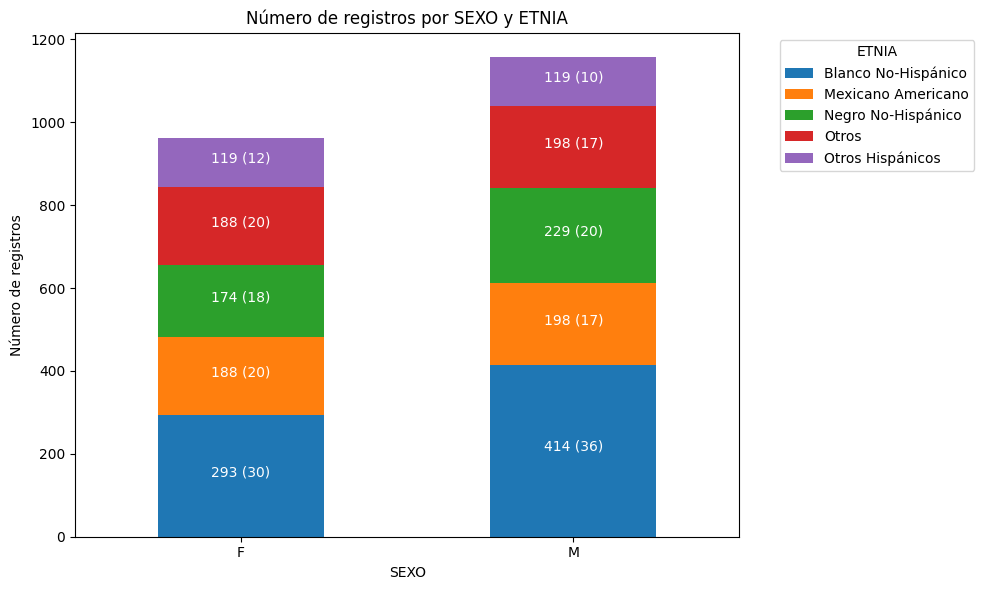

In [13]:
# 11 - GRÁFICO DE NÚMERO DE INDIVIDUOS POR SEXO Y ETNIA
# Convertir las cadenas a enteros para el gráfico
def extract_count(value):
    return int(value.split(" ")[0])

numerical_result_df = result_df.applymap(extract_count)

# Crear el gráfico de barras apiladas
ax = numerical_result_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Etiquetas y título
plt.xlabel('SEXO')
plt.ylabel('Número de registros')
plt.title('Número de registros por SEXO y ETNIA')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje X para mejorar la legibilidad

# Añadir anotaciones de texto para mostrar el número y el porcentaje de registros
y_offset = np.zeros(len(result_df.index))
for index, row in enumerate(result_df.iterrows()):
    sex, values = row
    y_pos = 0  # Posición inicial del texto dentro de la barra
    for etnia, value in values.items():
        count = numerical_result_df.loc[sex, etnia]
        ax.annotate(value, (index, y_pos + count / 2), textcoords="offset points", xytext=(0,0), ha='center', color='white')
        y_pos += count  # Actualizar la posición inicial del próximo texto

# Añadir leyenda
plt.legend(title='ETNIA', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

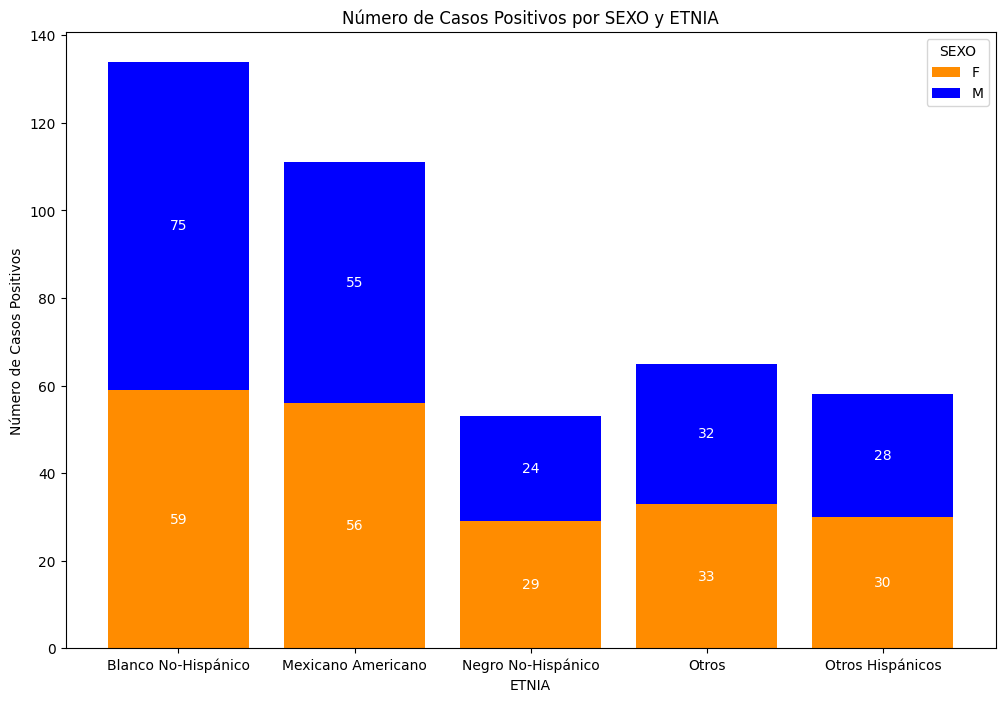

In [14]:
# 12 - GRÁFICO DE CASOS POSITIVOS POR SEXO Y ETNIA

import matplotlib.pyplot as plt
import numpy as np

# Definir colores para cada SEXO
colors = {'M': 'blue', 'F': 'darkorange'}

# Extraer los números de casos positivos y convertirlos a enteros para cada SEXO
for col in casos_positivos_pivot.columns:  # Incluyendo la columna 'TOTAL'
    casos_positivos_pivot[col] = casos_positivos_pivot[col].apply(lambda x: int(x.split(" ")[0]) if isinstance(x, str) else x)

# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(12, 8))

# Iniciar la altura acumulada de las barras
bottom_values = np.zeros(len(casos_positivos_pivot))

# Dibujar barras y etiquetas para cada SEXO
for col in casos_positivos_pivot.columns[:-1]:  # Excluyendo la columna 'TOTAL'
    bar = ax.bar(casos_positivos_pivot.index, casos_positivos_pivot[col], color=colors[col], label=col, bottom=bottom_values)

    # Calcular la posición de las etiquetas
    heights = bottom_values + casos_positivos_pivot[col] / 2

    # Añadir etiquetas centradas en color blanco
    for idx, (rect, height) in enumerate(zip(bar, heights)):
        ax.text(rect.get_x() + rect.get_width() / 2, height, str(casos_positivos_pivot[col].iloc[idx]), ha='center', va='center', color='white')

    bottom_values += casos_positivos_pivot[col]

# Añadir etiquetas y título
ax.set_ylabel('Número de Casos Positivos')
ax.set_xlabel('ETNIA')
ax.set_title('Número de Casos Positivos por SEXO y ETNIA')
ax.legend(title='SEXO')

# Mostrar el gráfico
plt.show()





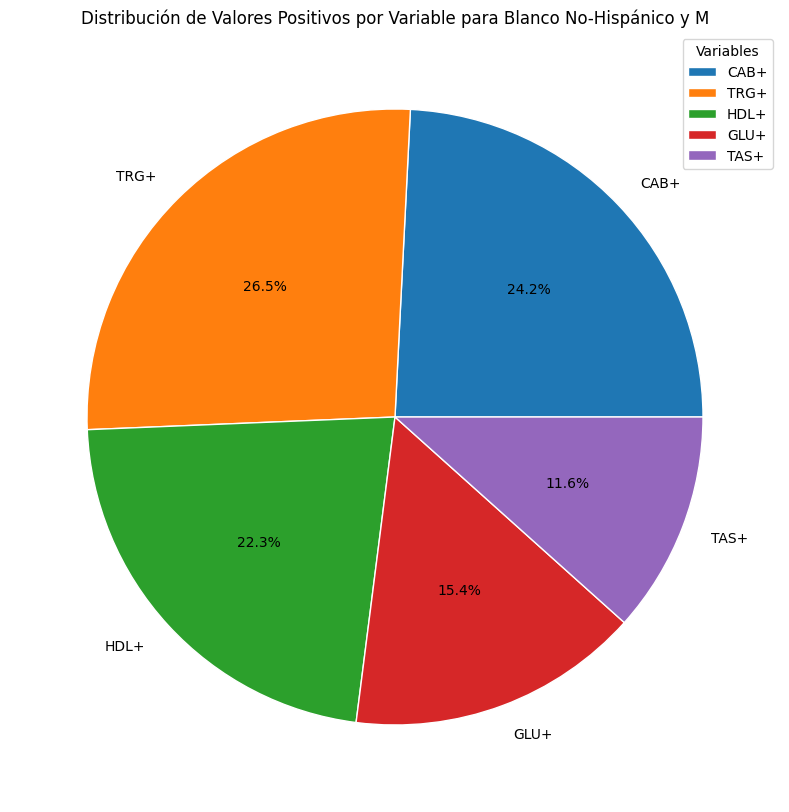

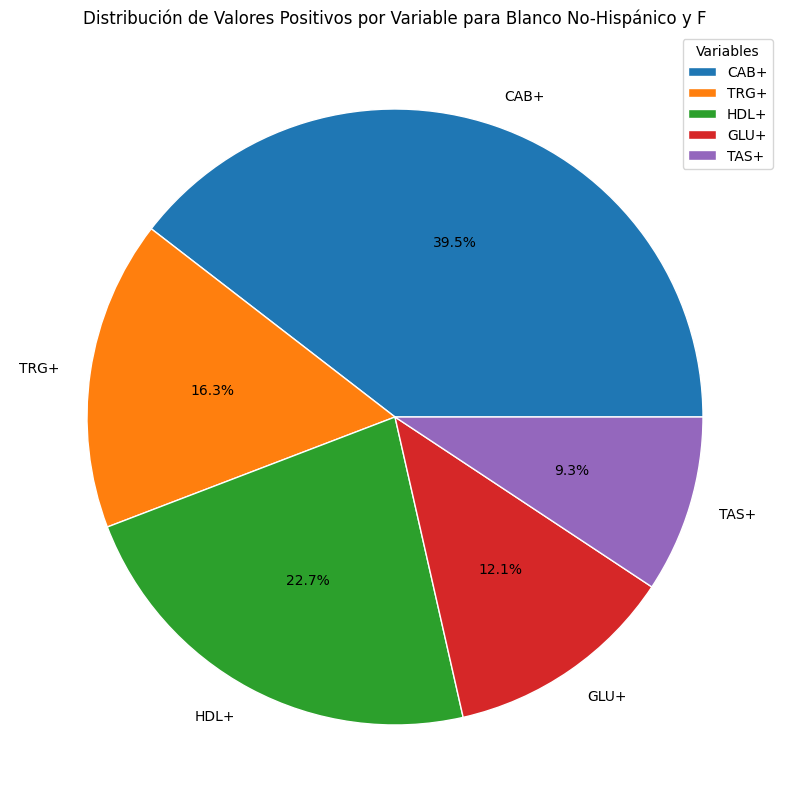

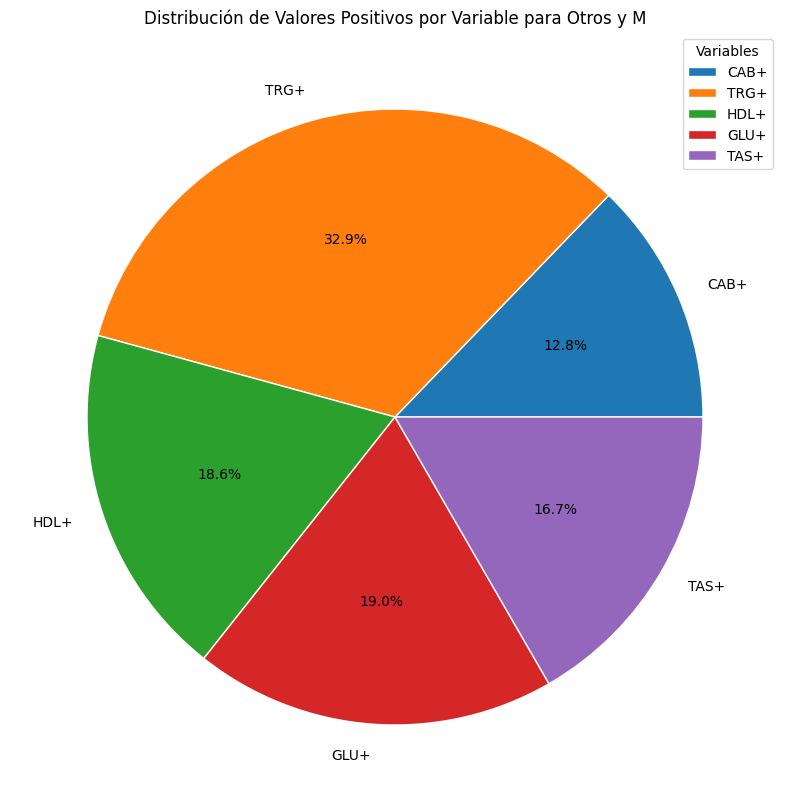

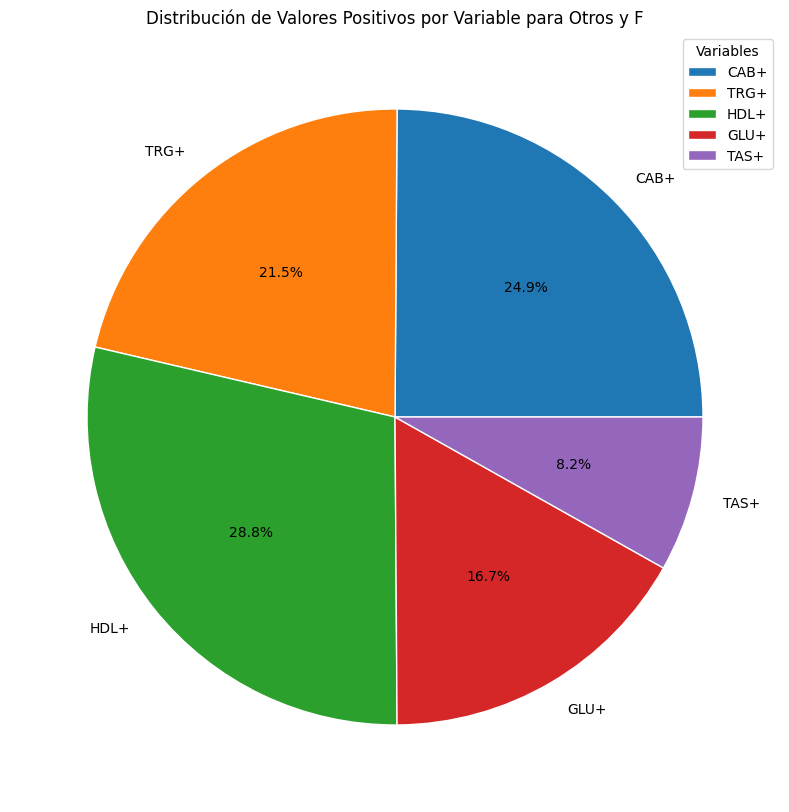

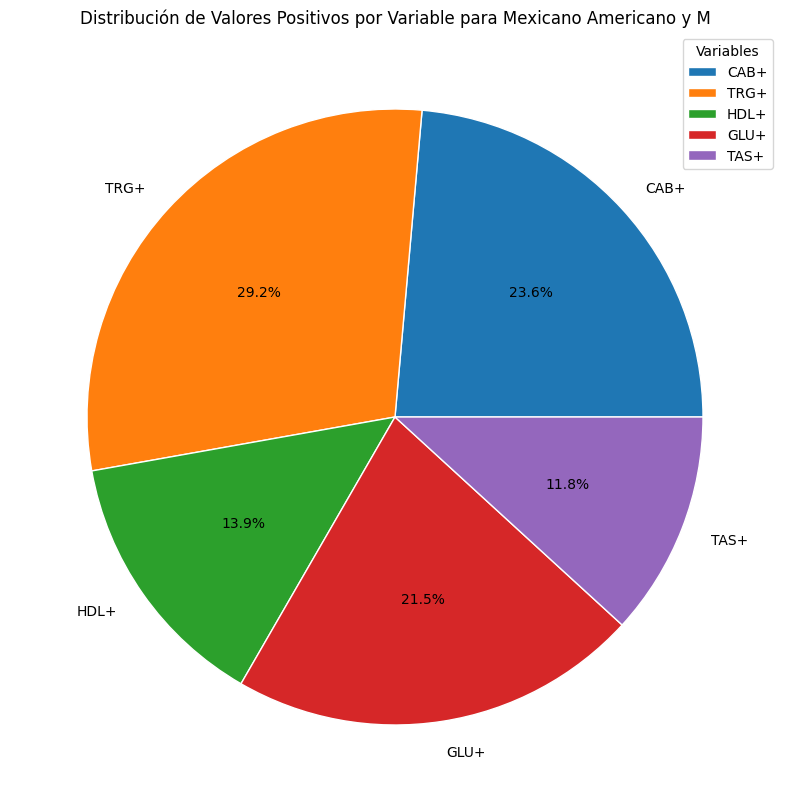

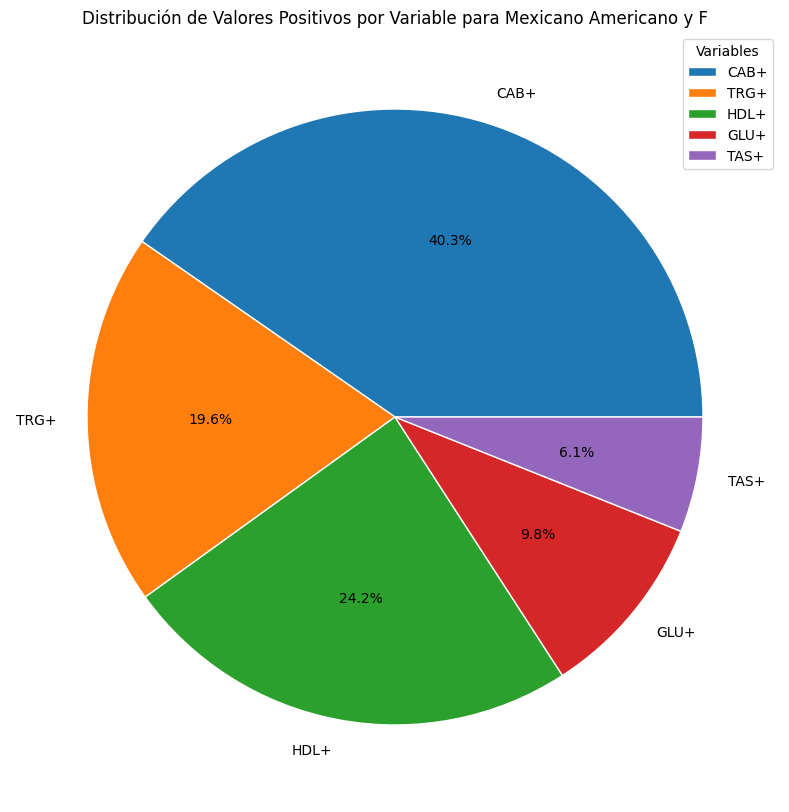

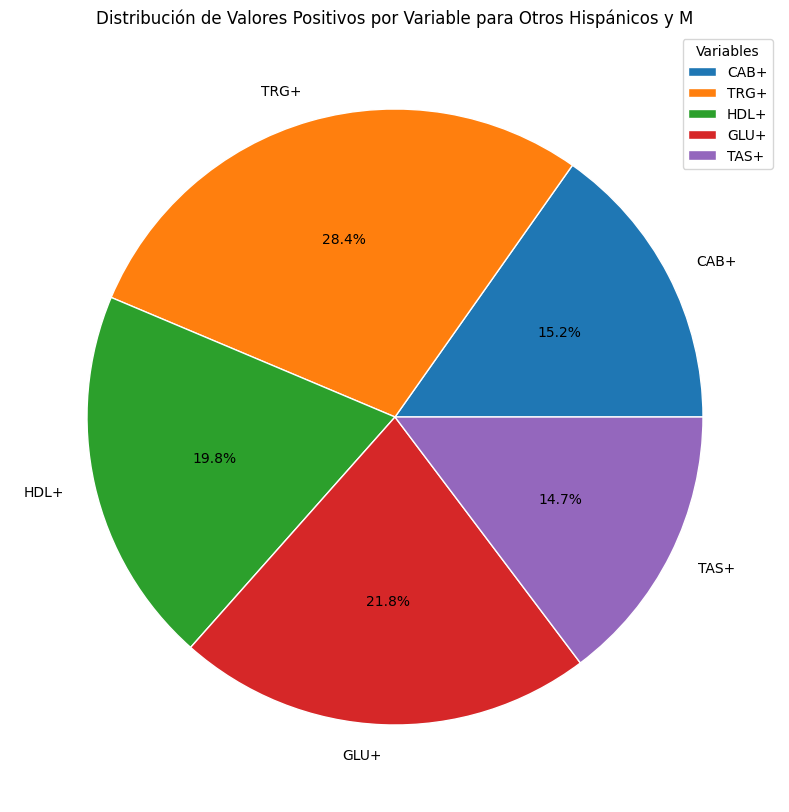

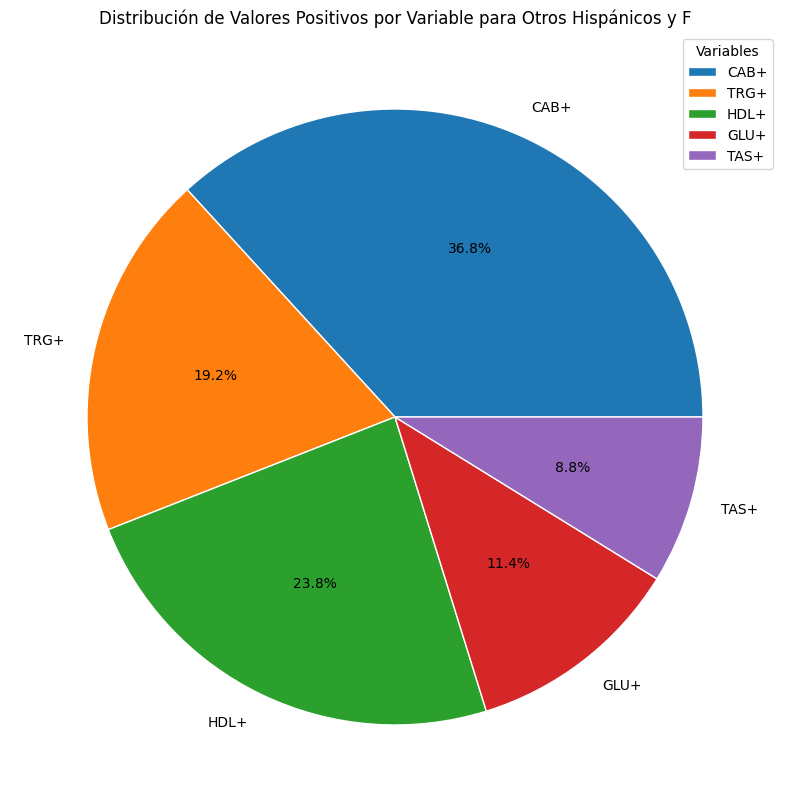

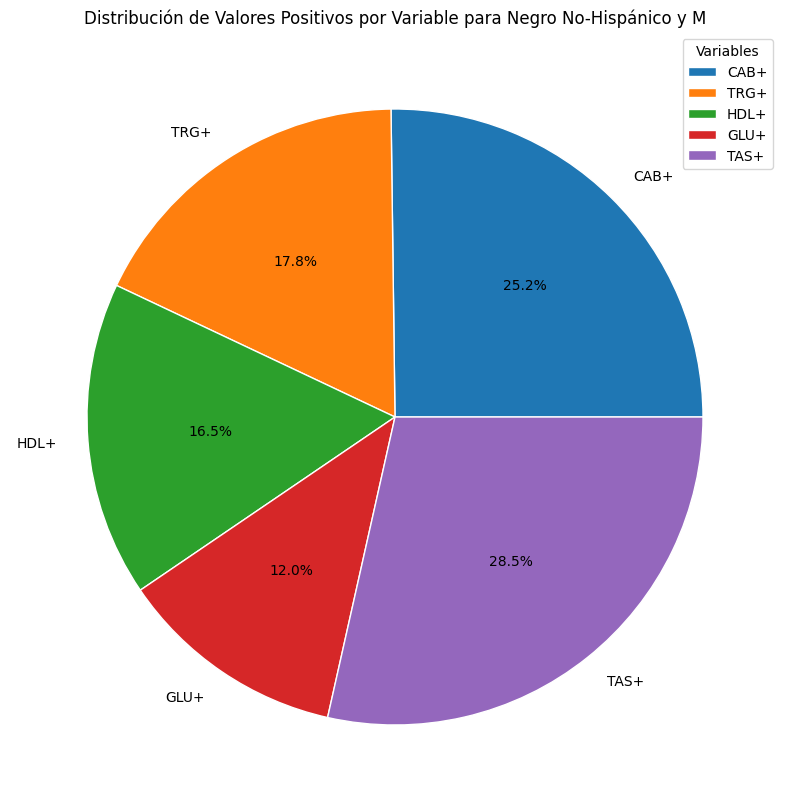

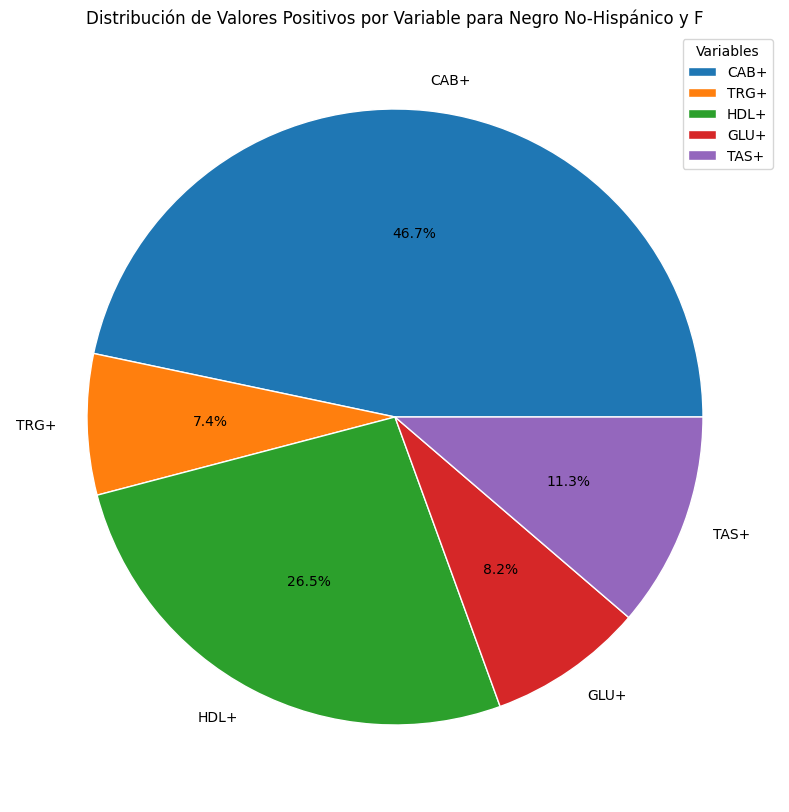

In [15]:
# 13 - PROPORCIÓN DEL COMPONENTE POSITIVO RELATIVAMENTE AL TOTAL DE COMPONENTES POSITIVOS POR SEXO Y ETNIA
import pandas as pd
import matplotlib.pyplot as plt

# Lista de variables a estudiar
variables = ['CAB+', 'TRG+', 'HDL+', 'GLU+', 'TAS+']

# Obtener las etnias y sexos únicos en el DataFrame
unique_ethnicities = data_clean['ETNIA'].unique()
unique_sexes = data_clean['SEXO'].unique()

# Iterar sobre cada etnia y sexo para crear gráficos de pastel
for ethnicity in unique_ethnicities:
    for sex in unique_sexes:
        plt.figure(figsize=(15, 10))

        # Filtrar datos según la etnia y el sexo actuales
        subset_data = data_clean[(data_clean['ETNIA'] == ethnicity) & (data_clean['SEXO'] == sex)]

        # Inicializar una lista para almacenar los totales para cada variable
        totals = []

        # Calcular el total de valores positivos para cada variable
        for variable in variables:
            totals.append(subset_data[variable].sum())

        # Crear el gráfico de pastel con líneas blancas para delimitar cada segmento
        plt.pie(totals, labels=variables, autopct='%1.1f%%', wedgeprops={'edgecolor': 'white'})

        # Agregar título y leyenda
        plt.title(f'Distribución de Valores Positivos por Variable para {ethnicity} y {sex}')
        plt.legend(title='Variables')

        # Mostrar el gráfico
        plt.show()




In [16]:
# 14 - COMPONENTES POSITIVOS POR ESTADÍO POR SEXO Y ETNIA
# Importar la biblioteca Pandas
import pandas as pd

# Variables de interés
variables = ['CAB+', 'TRG+', 'HDL+', 'GLU+', 'TAS+']

# Paso 1: Agrupar los datos por 'SEXO', 'ETNIA', y 'N+'
grouped_data = data_clean[data_clean['N+'] != 0].groupby(['SEXO', 'ETNIA', 'N+'])[variables].sum().reset_index()

# Paso 2: Contar el total de registros para cada 'N+' dentro de cada 'SEXO' y 'ETNIA'
total_counts = data_clean[data_clean['N+'] != 0].groupby(['SEXO', 'ETNIA', 'N+']).size().reset_index(name='Total')

# Paso 3: Fusionar los DataFrames para tener las sumas y el total en el mismo DataFrame
merged_data = pd.merge(grouped_data, total_counts, on=['SEXO', 'ETNIA', 'N+'], how='left')

# Paso 4: Anexar el total de cada 'N+' entre paréntesis
for var in variables:
    merged_data[var] = merged_data.apply(lambda row: f"{int(row[var])} ({int(row['Total'])})", axis=1)

# Convertir el DataFrame final al formato de tabla pivote para una mejor visualización
final_pivot_df = merged_data.pivot(index=['ETNIA', 'N+'], columns=['SEXO'], values=variables)

# Mostrar el DataFrame final
print(final_pivot_df)



                           CAB+               TRG+               HDL+  \
SEXO                          F         M        F         M        F   
ETNIA               N+                                                  
Blanco No-Hispánico 1   46 (78)  28 (122)   3 (78)  34 (122)  21 (78)   
                    2   48 (54)   37 (77)  16 (54)   40 (77)  19 (54)   
                    3   39 (39)   39 (49)  26 (39)   42 (49)  29 (39)   
                    4   16 (16)   19 (20)  14 (16)   19 (20)  15 (16)   
                    5     4 (4)     6 (6)    4 (4)     6 (6)    4 (4)   
Mexicano Americano  1   36 (48)   10 (37)   1 (48)   12 (37)   7 (48)   
                    2   49 (53)   27 (56)  19 (53)   38 (56)  29 (53)   
                    3   34 (35)   23 (32)  27 (35)   26 (32)  29 (35)   
                    4   17 (17)   18 (21)  17 (17)   21 (21)  15 (17)   
                    5     4 (4)     2 (2)    4 (4)     2 (2)    4 (4)   
Negro No-Hispánico  1   47 (63)   20 (83)   0 (63) 

In [17]:
from google.colab import files

# Ruta donde se guardará el archivo CSV
csv_path = '/content/final_pivot_df.csv'

# Guardar el DataFrame en un archivo CSV
final_pivot_df.to_csv(csv_path)

# Descargar el archivo CSV
#files.download(csv_path)

In [18]:
# 15 - PRUEBA DE CHI-CUADRADO PARA LAS VARIABLES CATEGÓRICAS (0,1)
import pandas as pd
from scipy.stats import chi2_contingency

# Lista de variables a estudiar
variables = ['CAB+', 'TRG+', 'HDL+', 'GLU+', 'TAS+']

# Obtener las etnias y sexos únicos en el DataFrame
unique_ethnicities = data_clean['ETNIA'].unique()
unique_sexes = data_clean['SEXO'].unique()

# Inicializar un DataFrame para almacenar los resultados
chi_df = pd.DataFrame(columns=['ETNIA', 'SEXO', 'VARIABLE_1', 'VARIABLE_2', 'P-VALUE', 'ASSOCIATION'])

# Iterar sobre cada etnia y sexo
for ethnicity in unique_ethnicities:
    for sex in unique_sexes:

        # Filtrar datos según la etnia y el sexo actuales
        subset_data = data_clean[(data_clean['ETNIA'] == ethnicity) & (data_clean['SEXO'] == sex)]

        # Iterar sobre cada par de variables
        for i in range(len(variables)):
            for j in range(i + 1, len(variables)):
                var1 = variables[i]
                var2 = variables[j]

                # Crear tabla de contingencia
                contingency_table = pd.crosstab(subset_data[var1], subset_data[var2])

                # Realizar prueba de Chi-cuadrado
                chi2, p_value, _, _ = chi2_contingency(contingency_table)

                # Determinar si la asociación es significativa
                association = 'Yes' if p_value < 0.05 else 'No'

                # Agregar resultados al DataFrame
                chi_df = chi_df.append({
                    'ETNIA': ethnicity,
                    'SEXO': sex,
                    'VARIABLE_1': var1,
                    'VARIABLE_2': var2,
                    'P-VALUE': p_value,
                    'ASSOCIATION': association
                }, ignore_index=True)

# Guardar el DataFrame como archivo CSV en Google Colab
chi_df.to_csv('/content/chiq_categ.csv', index=False)

# Descargar el archivo CSV en el entorno de Google Colab
#files.download('/content/chiq_categ.csv')


<ipython-input-18-656ea4af9103>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chi_df = chi_df.append({
<ipython-input-18-656ea4af9103>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chi_df = chi_df.append({
<ipython-input-18-656ea4af9103>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chi_df = chi_df.append({
<ipython-input-18-656ea4af9103>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chi_df = chi_df.append({
<ipython-input-18-656ea4af9103>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chi_df = chi_df.append({
<ipython-input-18-65

Para realizar pruebas de normalidad en cada una de las variables numéricas dentro de cada categoría de 'SEXO', utilizaremos la prueba de Shapiro-Wilk disponible en la biblioteca scipy.stats.

In [19]:
# 16 - PRUEBA DE NORMALIDAD SHAPIRO-WILK DE LAS VARIABLES NUMÉRICAS DENTRO DE CADA CATEGORIA DE SEXO
from scipy import stats

# División del DataFrame 'data_clean' en grupos según la variable 'SEXO'
grouped_data_clean = data_clean.groupby('SEXO')

# Diccionario para almacenar los resultados de las pruebas de normalidad
normality_test_results = {
    'Variable': [],
    'SEXO': [],
    'W_statistic': [],
    'p_value': [],
    'Is_Normal': []
}

# Realizar la prueba de Shapiro-Wilk para cada variable numérica en cada grupo de 'SEXO'
for name, group in grouped_data_clean:
    for col in numeric_columns:
        w_stat, p_value = stats.shapiro(group[col])

        # Almacenar los resultados en el diccionario
        normality_test_results['Variable'].append(col)
        normality_test_results['SEXO'].append(name)
        normality_test_results['W_statistic'].append(w_stat)
        normality_test_results['p_value'].append(p_value)
        normality_test_results['Is_Normal'].append(p_value > 0.05)  # Nivel de significancia alfa = 0.05

# Convertir el diccionario a un DataFrame para una mejor visualización
normality_test_df = pd.DataFrame(normality_test_results)

# Guardar el DataFrame combinado como un archivo CSV
normality_test_df.to_csv('test_normalidad.csv', index=False)
#from google.colab import files
#files.download('test_normalidad.csv')

La prueba de Shapiro-Wilk muestra un resultado VERDADERO para la distribución normal solamente en la variable ERT para ambos sexos.

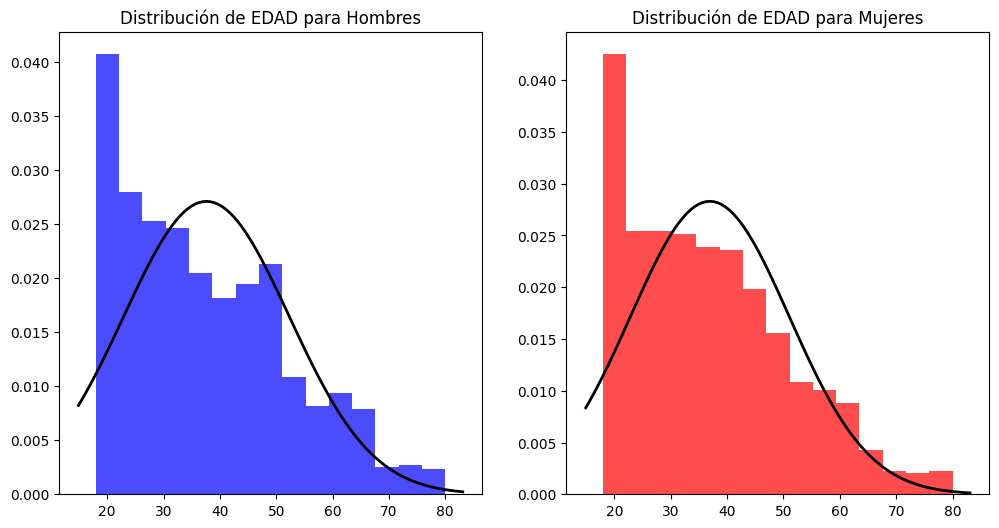

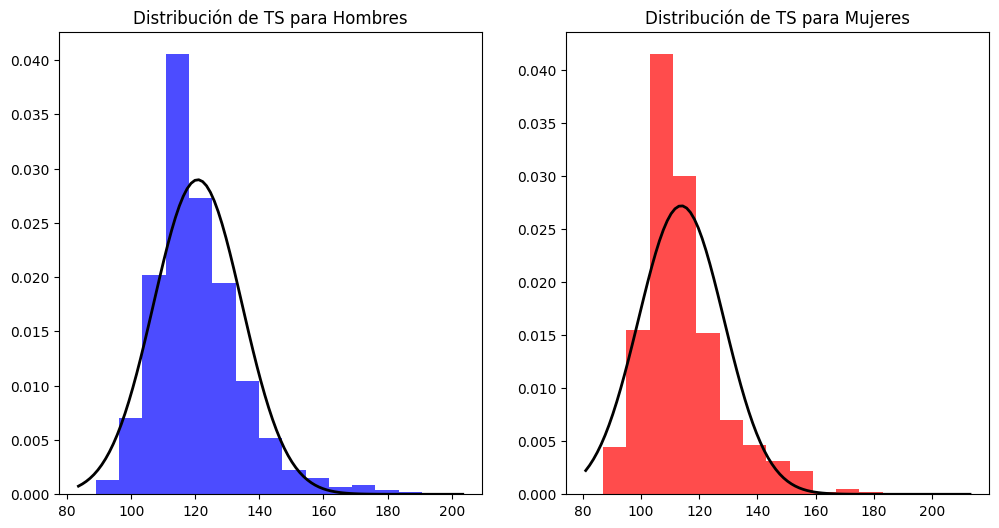

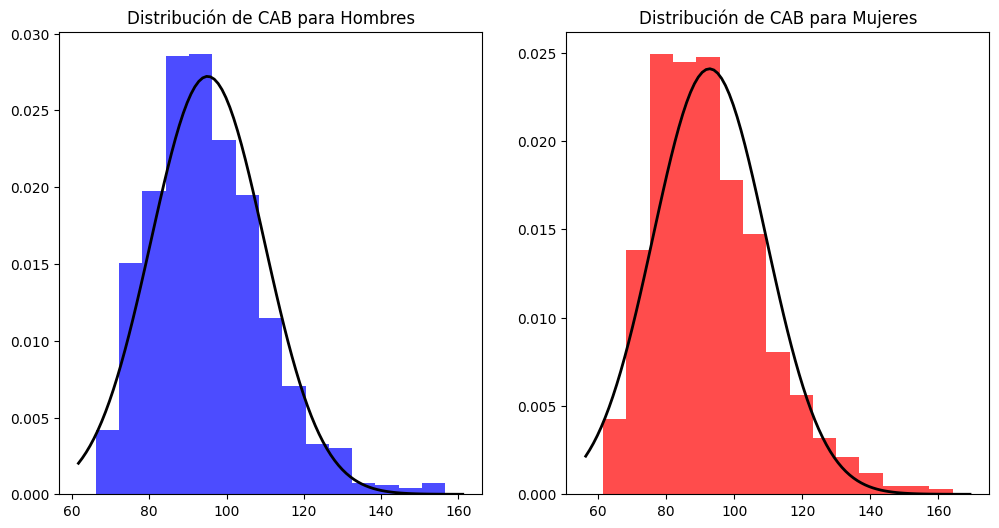

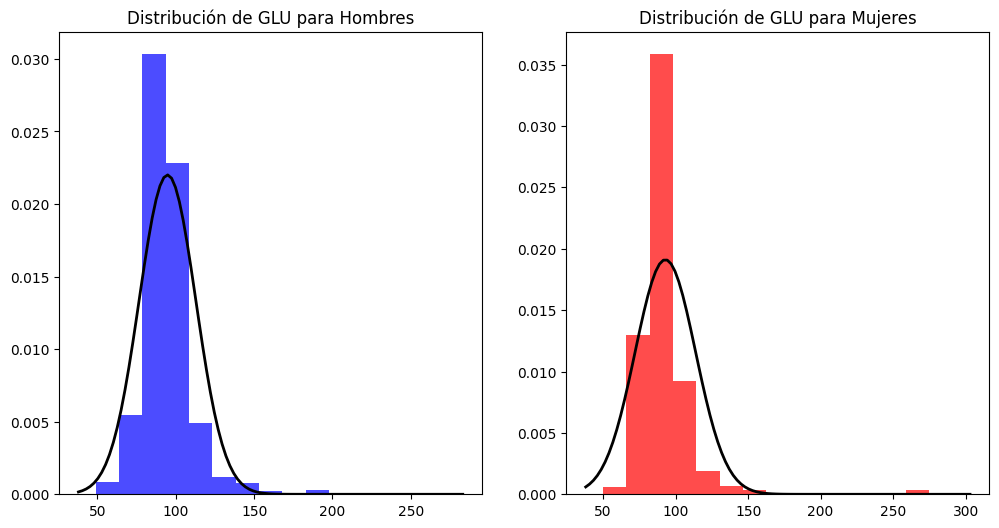

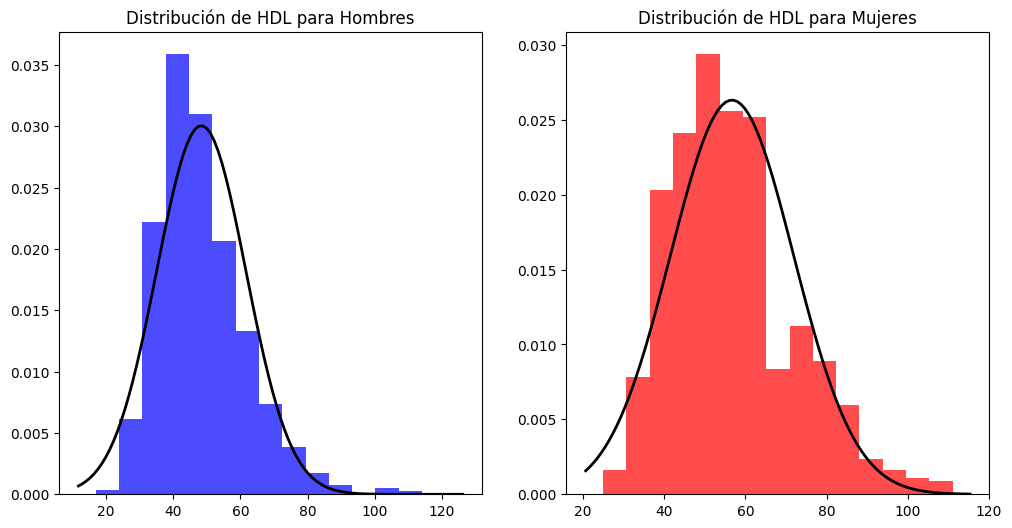

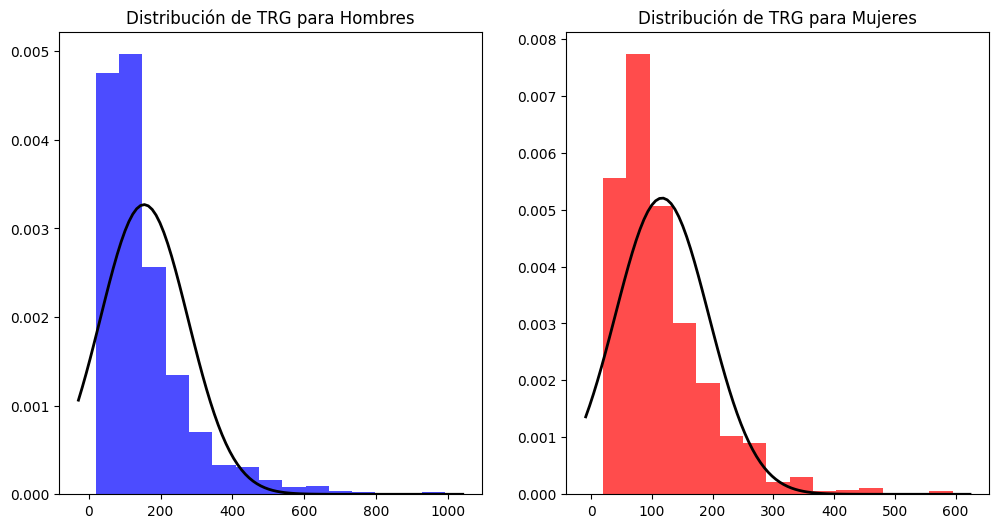

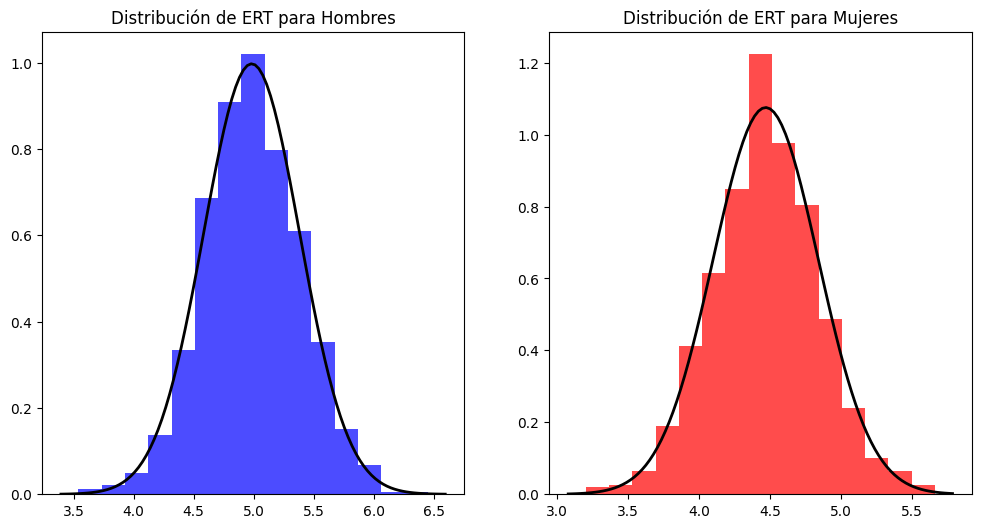

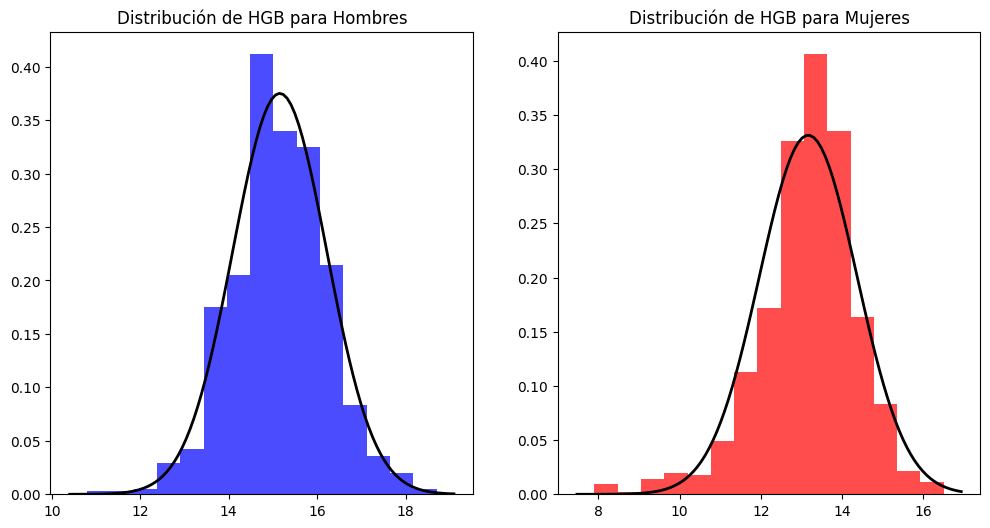

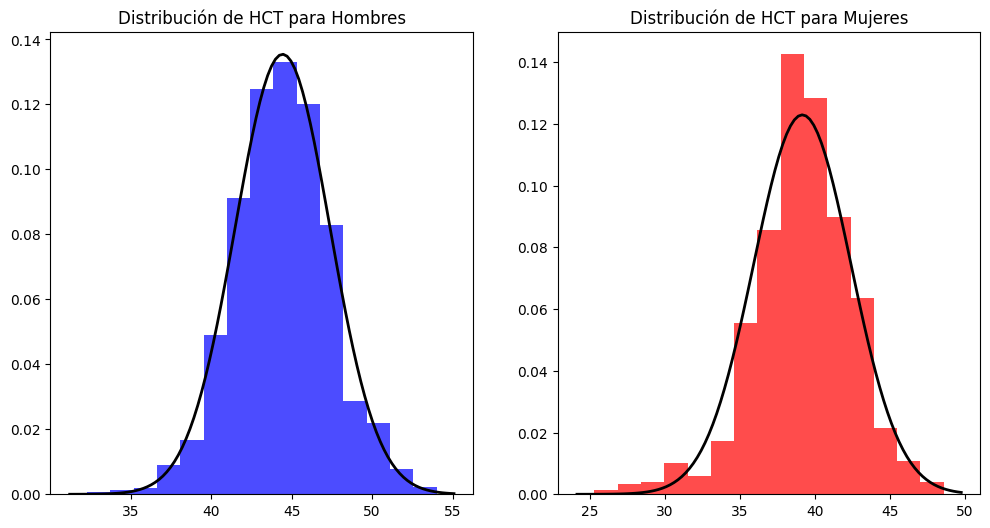

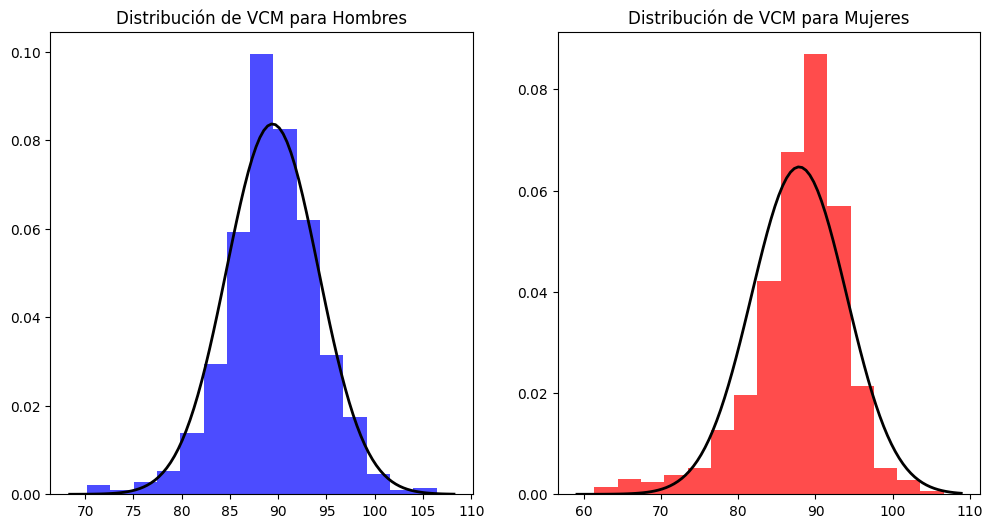

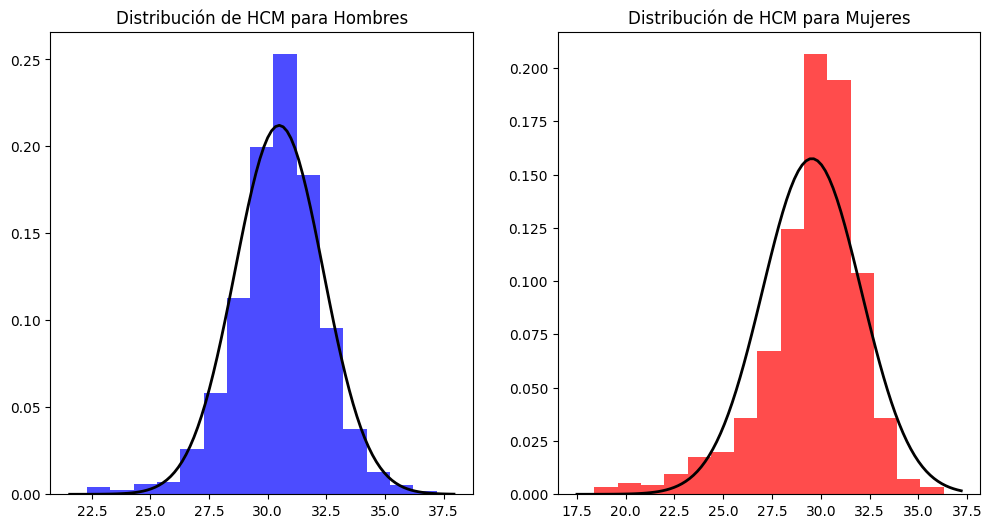

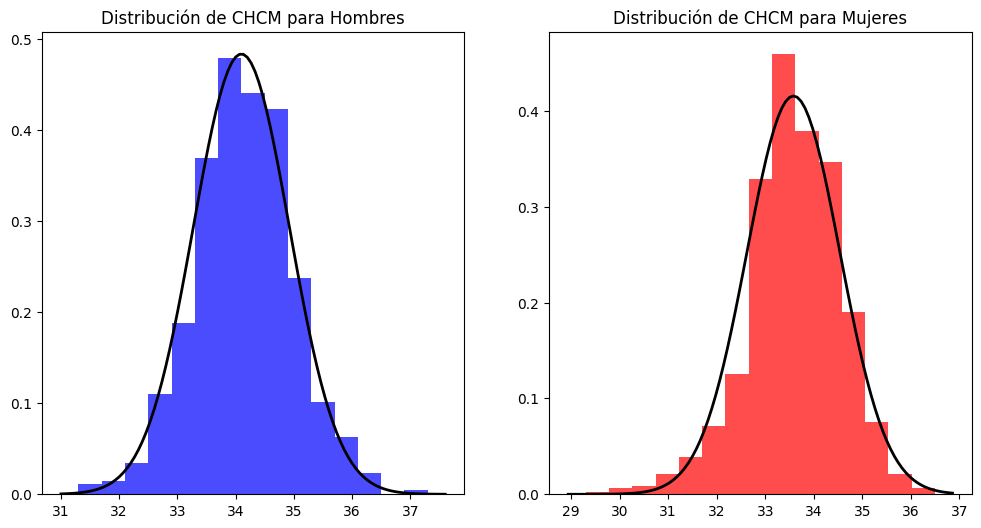

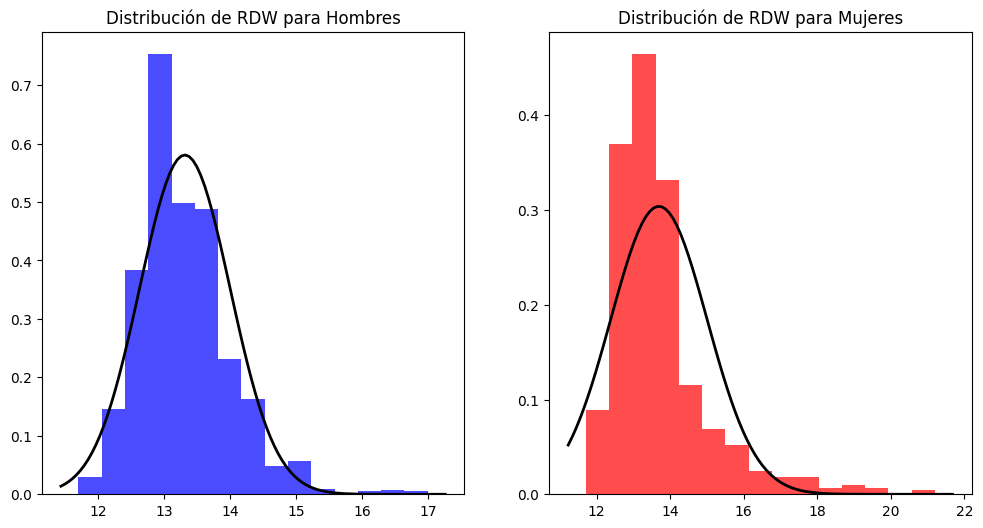

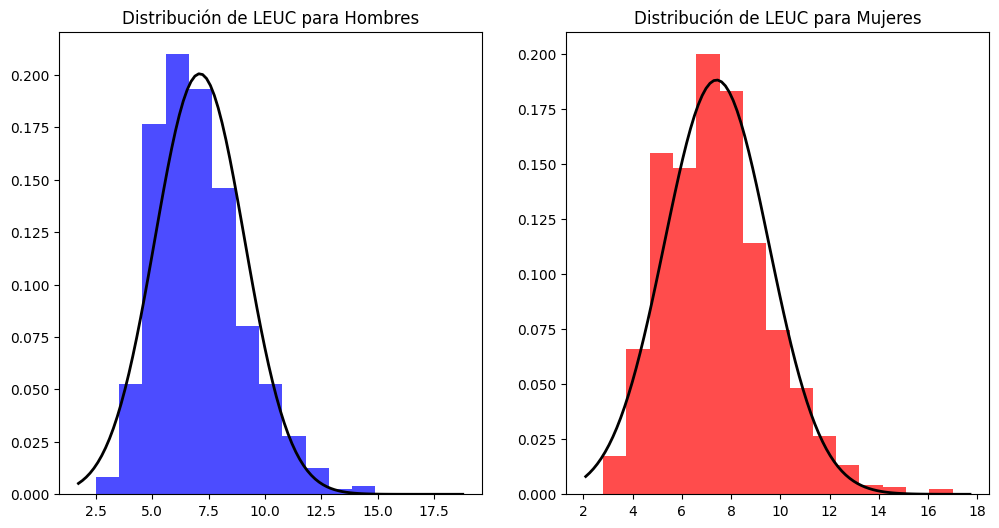

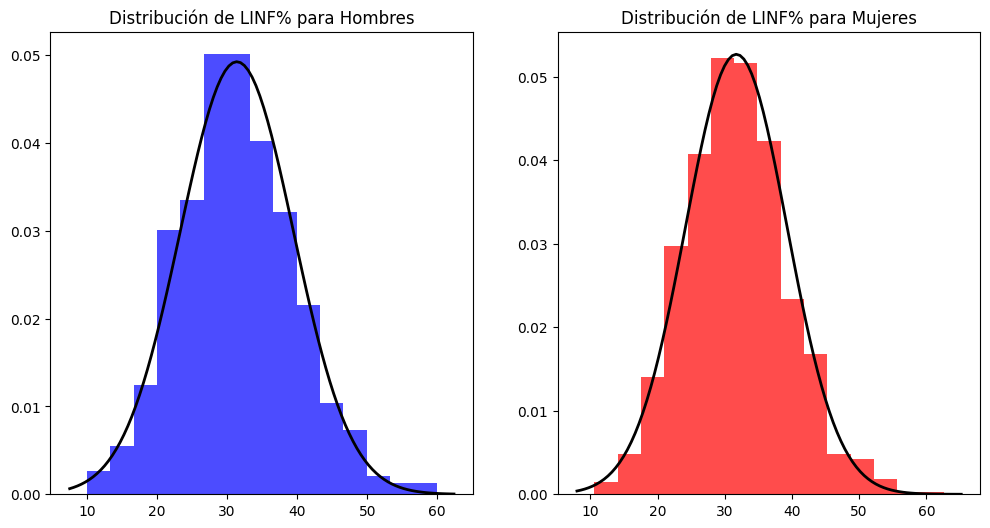

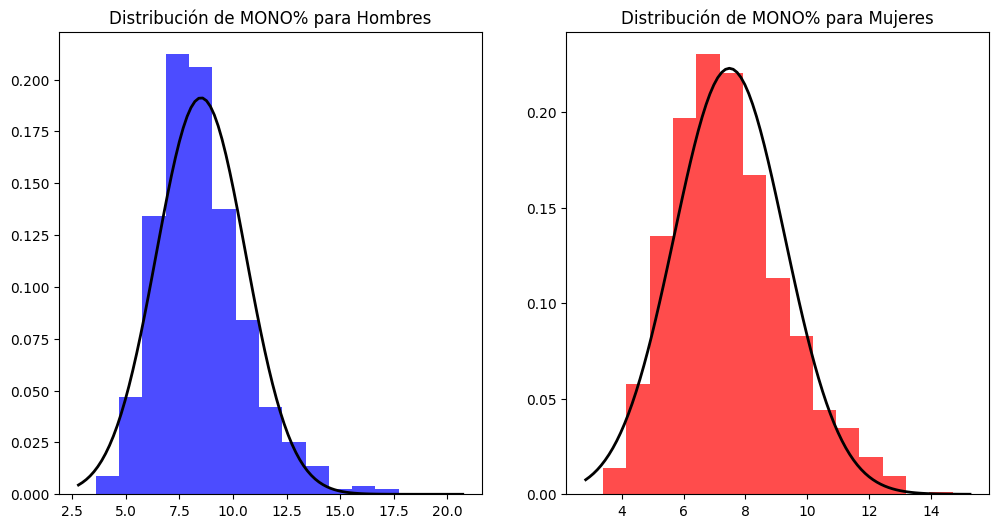

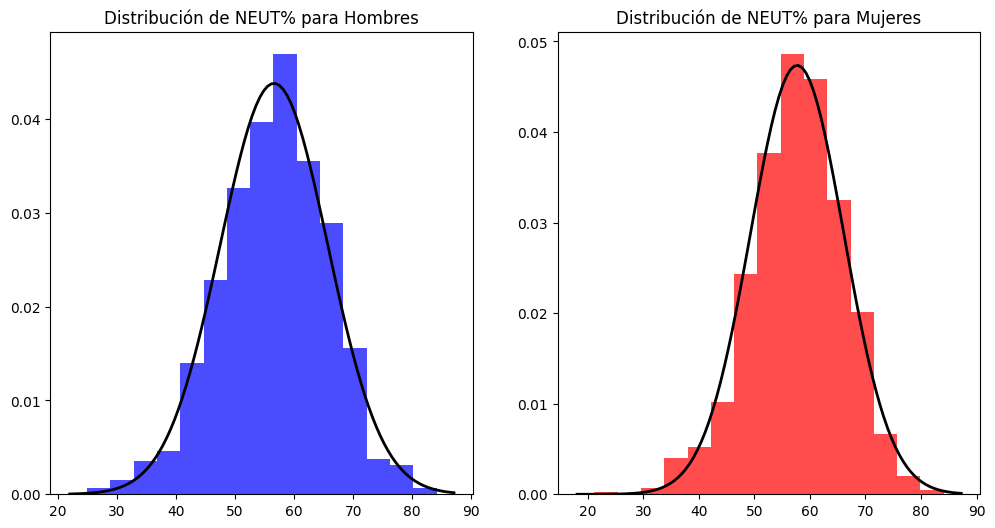

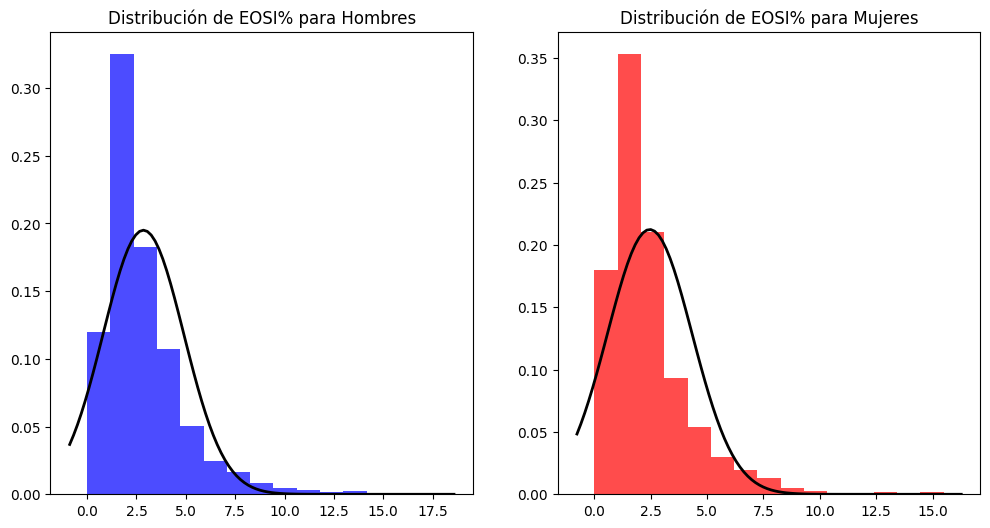

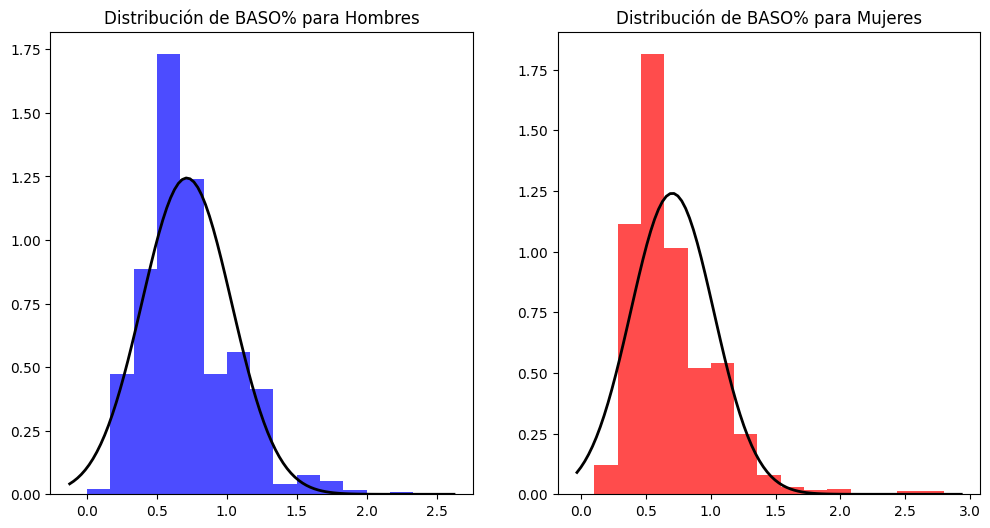

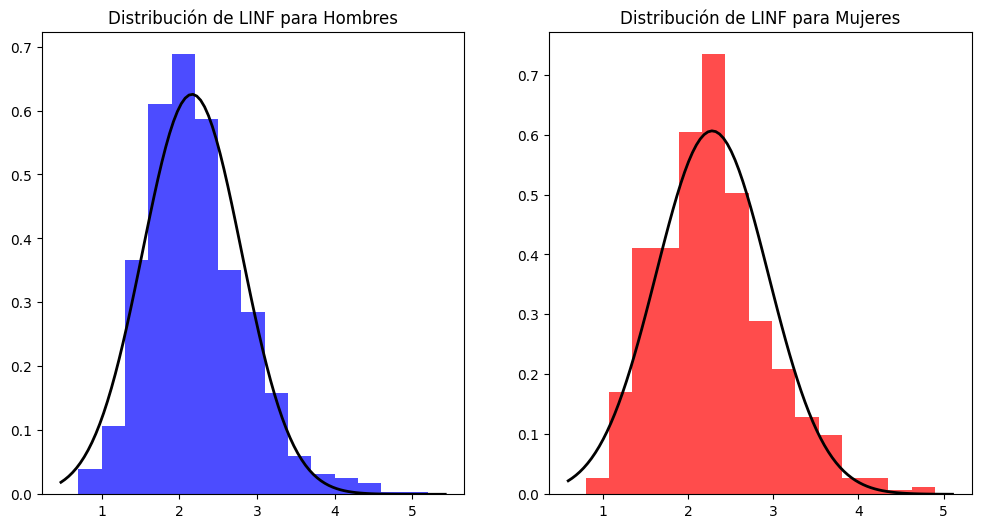

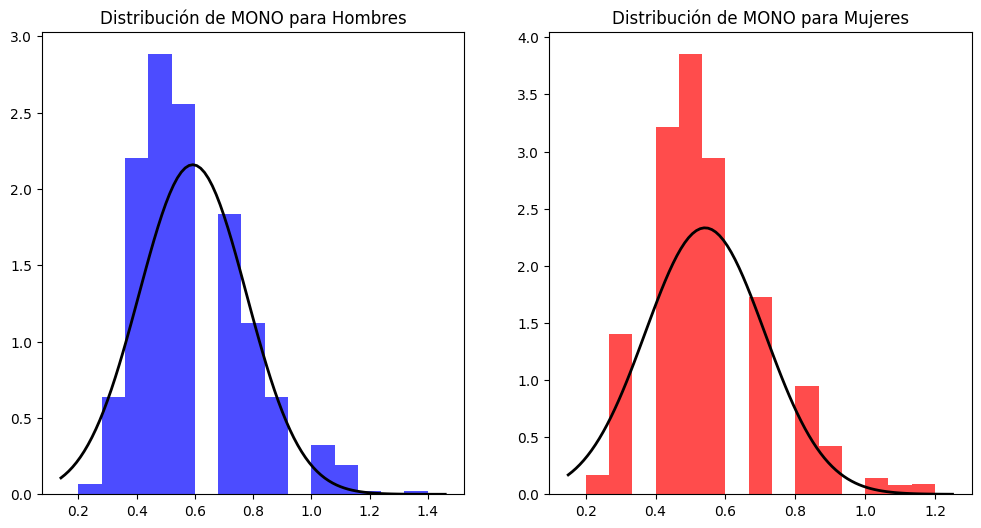

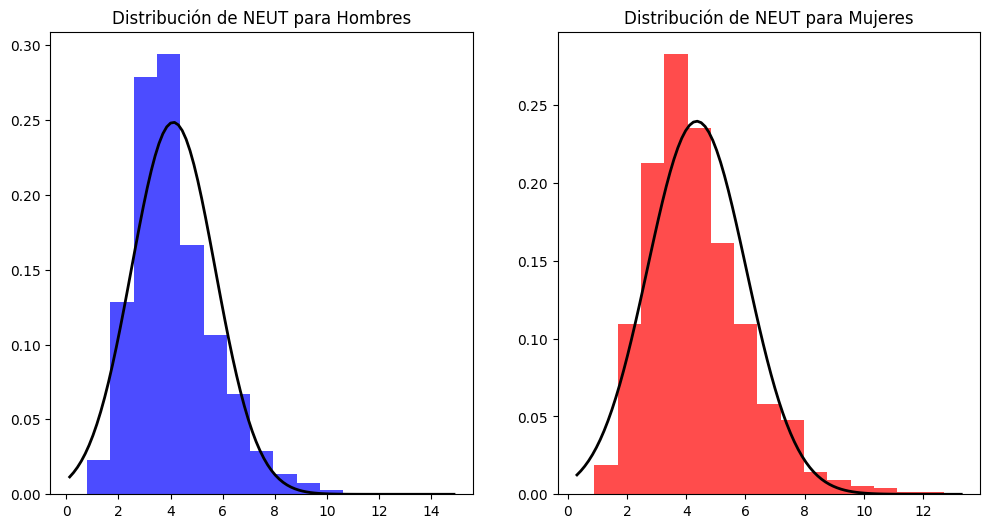

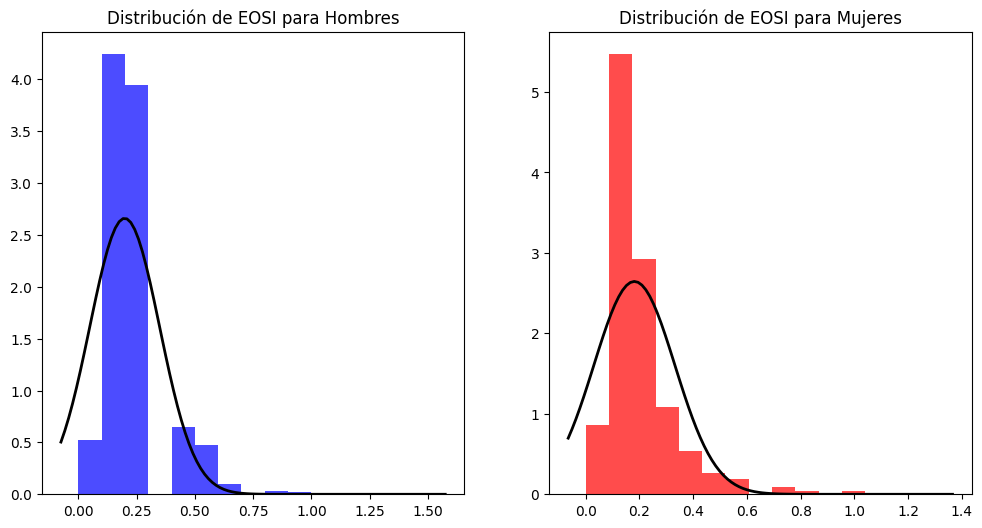

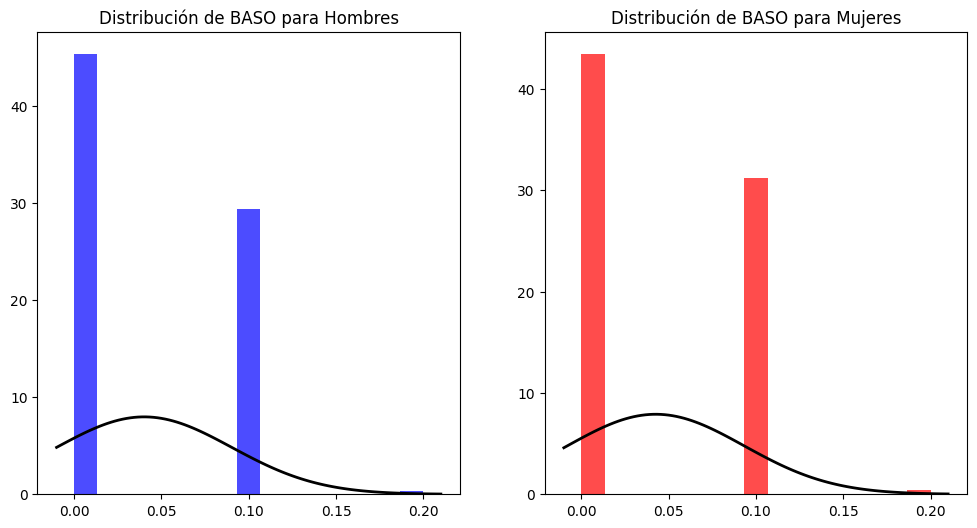

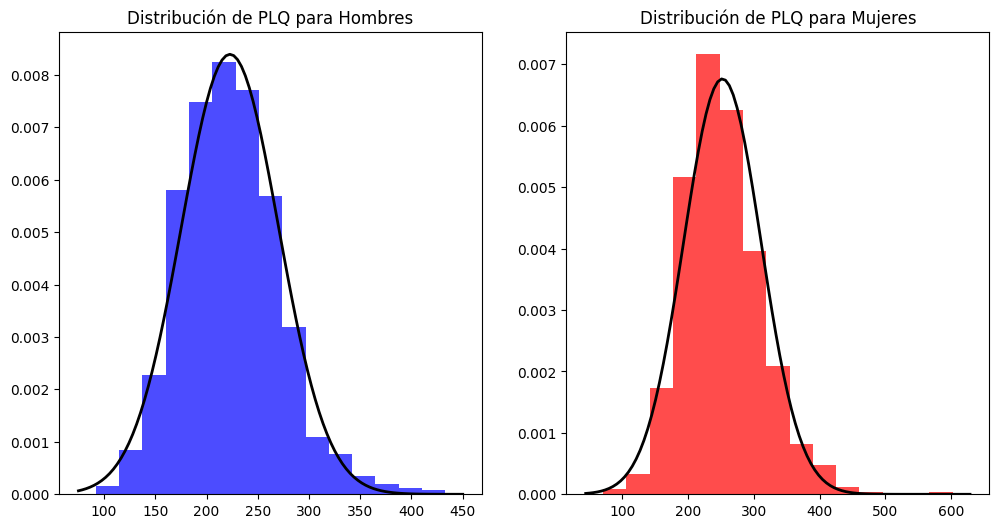

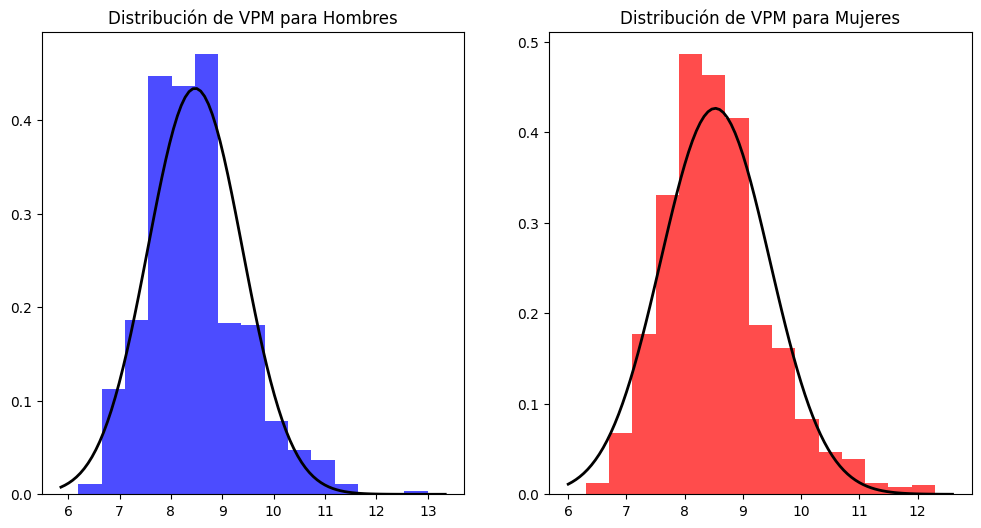

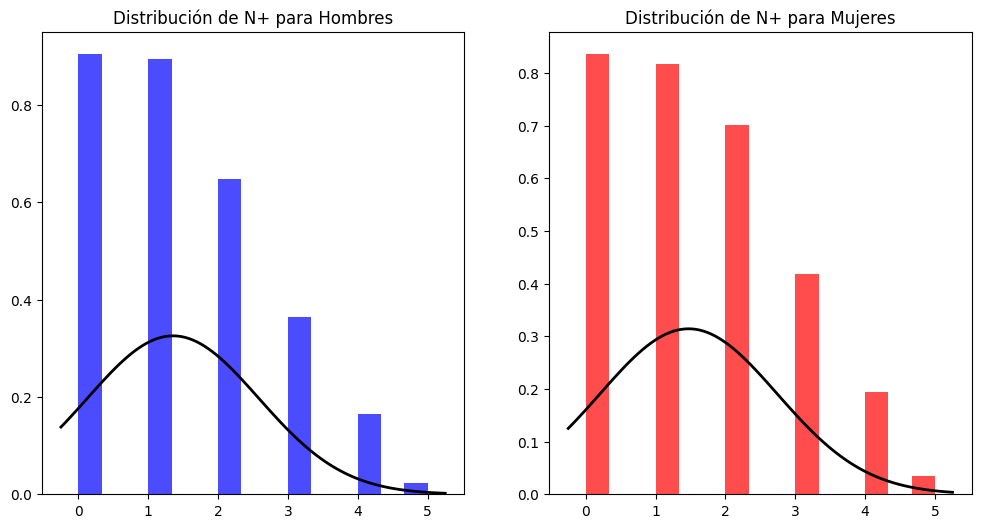

In [20]:
# 17 - HISTOGRAMAS DE LAS VARIABLES POR SEXO
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# 1. Identificar variables numéricas continuas con más de 2 valores únicos
numeric_cols = data_clean.select_dtypes(include=['float64', 'int64']).columns
numeric_cols_filtered = [col for col in numeric_cols if len(data_clean[col].unique()) > 2]

# 2. Filtrar datos por sexo
data_male = data_clean[data_clean['SEXO'] == 'M']
data_female = data_clean[data_clean['SEXO'] == 'F']

# 3 y 4. Crear histogramas y superponer distribuciones normales
for col in numeric_cols_filtered:
    plt.figure(figsize=(12, 6))

    # Histograma para hombres
    plt.subplot(1, 2, 1)
    plt.hist(data_male[col], bins=15, color='blue', edgecolor='none', alpha=0.7, density=True)
    mu, std = data_male[col].mean(), data_male[col].std()
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    plt.plot(x, norm.pdf(x, mu, std), 'k', linewidth=2)
    plt.title(f'Distribución de {col} para Hombres')

    # Histograma para mujeres
    plt.subplot(1, 2, 2)
    plt.hist(data_female[col], bins=15, color='red', edgecolor='none', alpha=0.7, density=True)
    mu, std = data_female[col].mean(), data_female[col].std()
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    plt.plot(x, norm.pdf(x, mu, std), 'k', linewidth=2)
    plt.title(f'Distribución de {col} para Mujeres')

    plt.show()


La prueba de Shapiro-Wilk muestra un resultado VERDADERO para la distribución normal solamente en la variable ERT para ambos sexos. Dado que la distribución mayoritaria de las variables no és normal, utilizamos el coeficiente de correlación de Spearman para evaluar las relaciones de orden entre las variables, por ser más robusto frente a la no normalidad y a relaciones no lineales.

El valor p en el contexto del coeficiente de correlación de Spearman se utiliza para evaluar la significancia estadística de la correlación observada entre dos variables. Específicamente, el valor p es una medida de la probabilidad de que la correlación observada haya ocurrido por azar bajo la hipótesis nula de que no hay correlación entre las variables.
•	Un valor p pequeño (<0.05) indica que podemos rechazar la hipótesis nula. En otras palabras, una correlación con un valor p menor que 0.05 es generalmente considerada estadísticamente significativa.
•	Un valor p grande (≥0.05) sugiere que no podemos rechazar la hipótesis nula. En este caso, no hay suficiente evidencia para afirmar que la correlación es estadísticamente significativa.
Es crucial recordar que un valor p pequeño no es una indicación de que la correlación es fuerte o importante, sino que simplemente es improbable que haya ocurrido por azar. Del mismo modo, un valor p grande no significa necesariamente que no hay correlación.


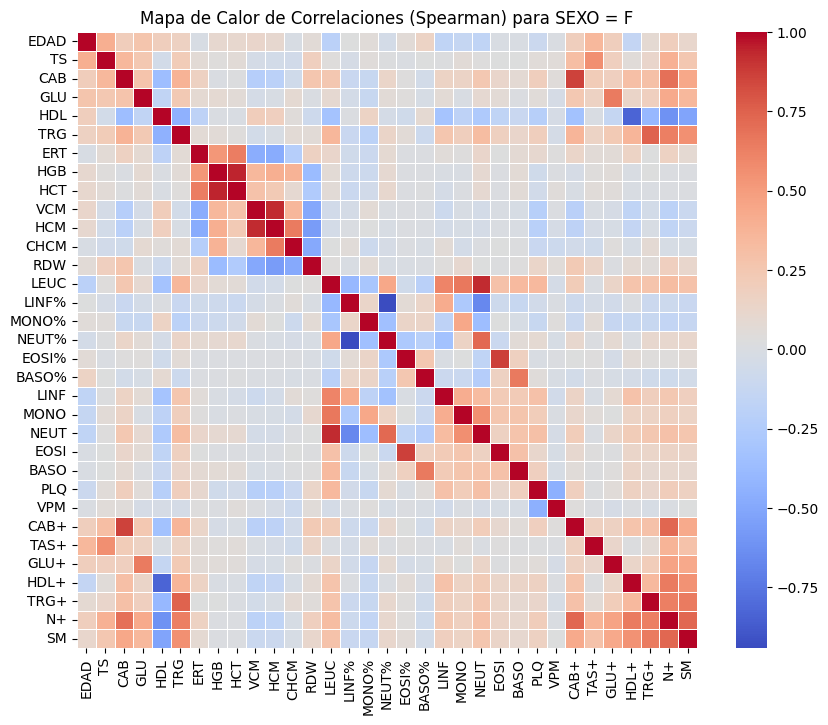

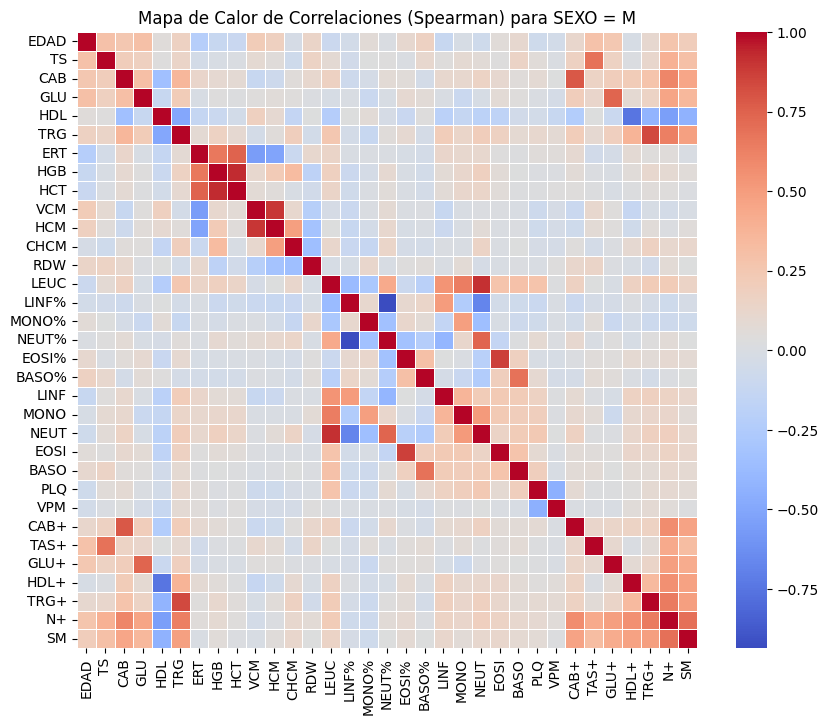

Correlaciones significativas:
     SEXO VARIABLE 1 VARIABLE 2        p-value
0       F       EDAD       EDAD   0.000000e+00
1       F       EDAD         TS   2.509090e-39
2       F       EDAD        CAB   1.976699e-10
3       F       EDAD        GLU   2.435470e-17
4       F       EDAD        HDL   1.156341e-09
...   ...        ...        ...            ...
1369    M         SM       GLU+   4.096338e-50
1370    M         SM       HDL+   2.795238e-66
1371    M         SM       TRG+   8.619124e-72
1372    M         SM         N+  3.395897e-168
1373    M         SM         SM   0.000000e+00

[1374 rows x 4 columns]


In [21]:
# 19 - CORRELACIÓN (SPEARMAN) ENTRE LAS VARIABLES POR SEXO
# Importa la librería scipy para calcular el coeficiente de correlación de Spearman
from scipy.stats import spearmanr

# Dividir el conjunto de datos en grupos según la variable 'SEXO'
grouped_data = data_clean.groupby('SEXO')

# Iterar sobre cada grupo para calcular el coeficiente de correlación de Spearman y generar el mapa de calor
for name, group in grouped_data:
    # Filtrar solo las columnas numéricas para el cálculo
    group_numeric = group.select_dtypes(include=[np.number])

    # Calcular el coeficiente de correlación de Spearman
    correlation_matrix, _ = spearmanr(group_numeric)

    # Crear el mapa de calor con anotaciones numéricas y etiquetas de variables
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5, xticklabels=group_numeric.columns, yticklabels=group_numeric.columns)
    plt.title(f'Mapa de Calor de Correlaciones (Spearman) para SEXO = {name}')
    plt.show()

   # Crear un DataFrame para almacenar las correlaciones significativas
corr_data_clean = pd.DataFrame(columns=['SEXO', 'VARIABLE 1', 'VARIABLE 2', 'p-value'])

# Dividir el conjunto de datos en grupos según la variable 'SEXO'
grouped_data = data_clean.groupby('SEXO')

# Iterar sobre cada grupo para calcular el coeficiente de correlación de Spearman y generar el mapa de calor
for name, group in grouped_data:
    # Filtrar solo las columnas numéricas para el cálculo
    group_numeric = group.select_dtypes(include=[np.number])

    # Calcular el coeficiente de correlación de Spearman
    correlation_matrix, p_values = spearmanr(group_numeric)

    # Filtrar las correlaciones significativas (p-value menos de 0.05)
    significant_corr_indices = np.where(p_values < 0.05)
    significant_corr_pairs = [(group_numeric.columns[i], group_numeric.columns[j], p_values[i, j]) for i, j in zip(*significant_corr_indices)]

    # Crear un DataFrame temporal con las correlaciones significativas
    temp_df = pd.DataFrame(significant_corr_pairs, columns=['VARIABLE 1', 'VARIABLE 2', 'p-value'])

    # Agregar la columna 'SEXO' con el valor actual
    temp_df['SEXO'] = name

    # Reorganizar las columnas
    temp_df = temp_df[['SEXO', 'VARIABLE 1', 'VARIABLE 2', 'p-value']]

    # Agregar las correlaciones significativas al DataFrame principal
    corr_data_clean = pd.concat([corr_data_clean, temp_df])

# Filtrar las correlaciones significativas (p-value menos de 0.05)
corr_data_clean = corr_data_clean[corr_data_clean['p-value'] < 0.05]

# Reiniciar los índices
corr_data_clean.reset_index(drop=True, inplace=True)

# Mostrar el DataFrame final
print("Correlaciones significativas:")
print(corr_data_clean)

# Guardar el DataFrame en un archivo CSV
nombre_archivo = 'corr_data_clean.csv'
corr_data_clean.to_csv(nombre_archivo, index=False)

# Descargar el archivo CSV en el disco desde Google Colab
#files.download(nombre_archivo)


In [22]:
# 18 - NORMALIZACIÓN DE LAS VARIABLES EXPLICATIVAS POR SEXO (MAX-MIN)
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Crear una copia del DataFrame original para almacenar los datos normalizados
data_norm = data_clean.copy()

# Identificar las columnas numéricas (float64 e int64)
numeric_cols = data_clean.select_dtypes(include=['float64', 'int64']).columns

# Filtrar columnas que solo toman los valores 0 y 1, y la columna 'N+'
filtered_cols = [col for col in numeric_cols if len(data_clean[col].unique()) > 2 and col != 'N+']

# Inicializar el MinMaxScaler
scaler = MinMaxScaler()

# Normalizar las columnas filtradas por SEXO
for sex in ['M', 'F']:
    subset = data_clean[data_clean['SEXO'] == sex]
    scaled_values = scaler.fit_transform(subset[filtered_cols])
    data_norm.loc[data_norm['SEXO'] == sex, filtered_cols] = scaled_values

# Guardar el DataFrame normalizado como un archivo CSV
data_norm.to_csv('/content/data_norm.csv', index=False)

# Código para descargar el archivo CSV en Google Colab
from google.colab import files
#files.download('/content/data_norm.csv')

In [23]:
# 19 - GRÁFICO RELACION UNIVARIANTE DE LAS VARIABLES EXPLICATIVAS NORMALIZADAS (0-1)CON EL NÚMERO DE COMPONENTES POSITIVOS (N+)
import seaborn as sns
import matplotlib.pyplot as plt

# Identificar las columnas numéricas (float64 e int64)
numeric_cols = data_norm.select_dtypes(include=['float64', 'int64']).columns

# Filtrar columnas que solo toman los valores 0 y 1
filtered_cols = [col for col in numeric_cols if len(data_norm[col].unique()) > 2]

# Valores únicos para la variable 'N+'
n_values = [0, 1, 2, 3, 4, 5]

# Configurar el estilo de Seaborn y ajustar la paleta de colores
sns.set(style="whitegrid")
sns.set_palette("pastel")

# Crear gráficos de violín para cada variable numérica filtrada
for col in filtered_cols:
    plt.figure(figsize=(12, 6))
    ax = sns.violinplot(x='N+', y=col, hue='SEXO', data=data_norm, split=True,
                        inner=None, palette={"M": "blue", "F": "darkorange"})
    ax.set_title(f'Gráfico de Violín de {col} por N+ y SEXO', fontsize=16)
    ax.set_xlabel('Número de Componentes Positivos', fontsize=14)
    ax.set_ylabel(col, fontsize=14)
    ax.tick_params(axis='both', labelsize=12)
    ax.set_ylim(0, 1)  # Ajustar la escala del eje vertical
    ax.legend(title='SEXO', loc='upper right', fontsize=12)

plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [24]:
# 20 CAPACIDAD PREDICTIVA DE CADA VARIABLE EN RELACIÓN A SM (AUC)
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc

# Crear un diccionario para almacenar los resultados
resultados = {'Variable': [], 'Sexo': [], 'Mejor Corte': [], 'Sensibilidad': [], 'Especificidad': [], 'AUC': []}

# Lista de variables continuas (float64 e int64)
variables_continuas = data_norm.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Para cada variable continua
for variable in variables_continuas:
    for sexo in data_norm['SEXO'].unique():
        # Filtrar el DataFrame por variable y sexo
        data_filtrada = data_norm[(data_norm['SEXO'] == sexo)]

        # Calcular ROC y métricas
        fpr, tpr, thresholds = roc_curve(data_filtrada['SM'], data_filtrada[variable])
        roc_auc = auc(fpr, tpr)
        sensibilidad = tpr
        especificidad = 1 - fpr

        # Encontrar el mejor corte basado en el punto más cercano a (0,1) en la curva ROC
        idx_mejor_corte = np.argmax(sensibilidad + especificidad)
        mejor_corte = thresholds[idx_mejor_corte]

        # Almacenar los resultados en el diccionario
        resultados['Variable'].append(variable)
        resultados['Sexo'].append(sexo)
        resultados['Mejor Corte'].append(mejor_corte)
        resultados['Sensibilidad'].append(sensibilidad[idx_mejor_corte])
        resultados['Especificidad'].append(especificidad[idx_mejor_corte])
        resultados['AUC'].append(roc_auc)

# Crear un DataFrame con los resultados
resultado_df = pd.DataFrame(resultados)

# Guardar el DataFrame como "resultados_con_mejor_corte.csv"
resultado_df.to_csv('auc.csv', index=False)

# Proporcionar el enlace para descargar el archivo en Google Colab
#from google.colab import files
#files.download('auc.csv')


Evaluar la Sensibilidad, Especificidad, AUC y Coeficiente de Correlación de Mathews de las variables en relación a la categoría SM. El coeficiente de correlación de Matthews (MCC) es una medida de la calidad de las predicciones binarias en un problema de clasificación. A diferencia de otras métricas, como la precisión o el F1-Score, el MCC tiene en cuenta tanto los verdaderos positivos como los verdaderos negativos y considera el equilibrio entre las clases. Es especialmente útil en problemas de clasificación desequilibrados o cuando se desea una métrica que no dependa del equilibrio de clases. Un MCC más alto indica un mejor rendimiento del modelo en términos de clasificación.

In [25]:
# 21 CAPACIDAD PREDICTIVA DE CADA VARIABLE EN RELACIÓN A SM (COEFICIENTE DE CORRELACIÓN DE MATTHEWS)
import pandas as pd
import numpy as np
from sklearn.metrics import matthews_corrcoef, roc_curve, auc
import matplotlib.pyplot as plt

# Obtener la lista de variables continuas
variables_continuas = data_norm.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Lista de valores únicos de "SEXO"
valores_sexo = data_norm['SEXO'].unique()

# Diccionario para almacenar los resultados
resultados = {}

for variable in variables_continuas:
    for sexo in valores_sexo:
        # Filtrar el DataFrame por la variable "SEXO" y la categoría "SM"
        data_filtrada = data_norm[(data_norm['SEXO'] == sexo)]

        # Calcular los valores de corte y MCC
        cut_points = np.linspace(0, 1, 100)  # Puntos de corte entre 0 y 1
        mcc_scores = []

        for cut in cut_points:
            # Crear una columna binaria basada en el punto de corte
            data_filtrada['Predicción'] = (data_filtrada[variable] > cut).astype(int)

            # Calcular el MCC
            mcc = matthews_corrcoef(data_filtrada['SM'], data_filtrada['Predicción'])
            mcc_scores.append(mcc)

        # Encontrar el punto de corte que maximiza el MCC
        best_cut = cut_points[np.argmax(mcc_scores)]
        best_mcc = max(mcc_scores)

        # Almacenar los resultados en el diccionario
        resultados[(variable, sexo)] = {'Mejor Corte': best_cut, 'Mejor MCC': best_mcc}

A saída de streaming foi truncada nas últimas 5000 linhas.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrada['Predicción'] = (data_filtrada[variable] > cut).astype(int)
<ipython-input-25-a50b5ce9484e>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrada['Predicción'] = (data_filtrada[variable] > cut).astype(int)
<ipython-input-25-a50b5ce9484e>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [26]:
for i, variable in enumerate(variables_continuas):
    for j, sexo in enumerate(valores_sexo):
        # Filtrar el DataFrame por variable y sexo
        data_filtrada = data_norm[(data_norm['SEXO'] == sexo)]

        # Calcular ROC y métricas
        fpr, tpr, thresholds = roc_curve(data_filtrada['SM'], data_filtrada[variable])
        roc_auc = auc(fpr, tpr)
        sensibilidad = tpr
        especificidad = 1 - fpr
        mcc = [matthews_corrcoef(data_filtrada['SM'], (data_filtrada[variable] > cut).astype(int)) for cut in thresholds]

        # Encontrar el índice del umbral que maximiza el MCC
        idx_max_mcc = np.argmax(mcc)
        best_threshold = thresholds[idx_max_mcc]
        best_mcc = mcc[idx_max_mcc]

        # Almacenar los resultados en un diccionario
        resultados[(variable, sexo)] = {
            "Mejor Corte": best_threshold,
            "Mejor MCC": best_mcc,
            "Sensibilidad": sensibilidad[idx_max_mcc],
            "Especificidad": especificidad[idx_max_mcc],
            "AUC": roc_auc
        }

# Mostrar resultados de los cortes óptimos y MCC
for key, value in resultados.items():
    print(f'Variable: {key[0]}, SEXO: {key[1]}')
    print(f'Mejor Corte: {value["Mejor Corte"]:.2f}')
    print(f'Mejor MCC: {value["Mejor MCC"]:.2f}')
    print(f'Sensibilidad: {value["Sensibilidad"]:.2f}')
    print(f'Especificidad: {value["Especificidad"]:.2f}')
    print(f'AUC: {value["AUC"]:.2f}')



Variable: EDAD, SEXO: M
Mejor Corte: 0.29
Mejor MCC: 0.20
Sensibilidad: 0.69
Especificidad: 0.56
AUC: 0.65
Variable: EDAD, SEXO: F
Mejor Corte: 0.68
Mejor MCC: 0.12
Sensibilidad: 0.14
Especificidad: 0.94
AUC: 0.58
Variable: TS, SEXO: M
Mejor Corte: 0.38
Mejor MCC: 0.32
Sensibilidad: 0.46
Especificidad: 0.85
AUC: 0.72
Variable: TS, SEXO: F
Mejor Corte: 0.36
Mejor MCC: 0.28
Sensibilidad: 0.28
Especificidad: 0.92
AUC: 0.68
Variable: CAB, SEXO: M
Mejor Corte: 0.39
Mejor MCC: 0.48
Sensibilidad: 0.76
Especificidad: 0.81
AUC: 0.83
Variable: CAB, SEXO: F
Mejor Corte: 0.26
Mejor MCC: 0.44
Sensibilidad: 0.96
Especificidad: 0.56
AUC: 0.81
Variable: GLU, SEXO: M
Mejor Corte: 0.23
Mejor MCC: 0.42
Sensibilidad: 0.63
Especificidad: 0.82
AUC: 0.76
Variable: GLU, SEXO: F
Mejor Corte: 0.21
Mejor MCC: 0.44
Sensibilidad: 0.51
Especificidad: 0.90
AUC: 0.75
Variable: HDL, SEXO: M
Mejor Corte: 2.00
Mejor MCC: 0.00
Sensibilidad: 0.00
Especificidad: 1.00
AUC: 0.18
Variable: HDL, SEXO: F
Mejor Corte: 2.00
Mejor

In [27]:
import pandas as pd

# Crear un DataFrame con los resultados
mcc_df = pd.DataFrame(resultados).T
mcc_df.index.names = ['Variable', 'SEXO']

# Guardar el DataFrame en un archivo CSV
mcc_df.to_csv('/content/mcc_resultados.csv')

# Descargar el archivo CSV
#from google.colab import files
#files.download('/content/mcc_resultados.csv')


El índice de Youden se utiliza para seleccionar un umbral de clasificación óptimo que maximiza tanto la sensibilidad como la especificidad.
En problemas de clasificación con clases desequilibradas, donde una clase tiene muchas más muestras que la otra, es importante considerar otros factores además del índice de Youden.

In [28]:
# 22 CAPACIDAD PREDICTIVA DE CADA VARIABLE EN RELACIÓN A SM (ÍNDICE DE YOUDEN)
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc

# Crear un diccionario para almacenar los resultados
resultados = {'Variable': [], 'Sexo': [], 'Mejor Corte': [], 'Mejor IY': [], 'Sensibilidad': [], 'Especificidad': [], 'AUC': []}

# Lista de variables continuas (float64 e int64)
variables_continuas = data_norm.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Para cada variable continua
for variable in variables_continuas:
    for sexo in data_norm['SEXO'].unique():
        # Filtrar el DataFrame por variable y sexo
        data_filtrada = data_norm[(data_norm['SEXO'] == sexo)]

        # Calcular ROC y métricas
        fpr, tpr, thresholds = roc_curve(data_filtrada['SM'], data_filtrada[variable])
        roc_auc = auc(fpr, tpr)
        sensibilidad = tpr
        especificidad = 1 - fpr

        # Calcular el índice de Youden para cada corte
        iy_values = sensibilidad + especificidad - 1
        idx_max_iy = np.argmax(iy_values)
        best_threshold = thresholds[idx_max_iy]
        best_iy = iy_values[idx_max_iy]

        # Almacenar los resultados en el diccionario
        resultados['Variable'].append(variable)
        resultados['Sexo'].append(sexo)
        resultados['Mejor Corte'].append(best_threshold)
        resultados['Mejor IY'].append(best_iy)
        resultados['Sensibilidad'].append(sensibilidad[idx_max_iy])
        resultados['Especificidad'].append(especificidad[idx_max_iy])
        resultados['AUC'].append(roc_auc)

# Crear un DataFrame con los resultados
youden_df = pd.DataFrame(resultados)

# Guardar el DataFrame como "youden.csv"
youden_df.to_csv('youden.csv', index=False)

# Proporcionar el enlace para descargar el archivo en Google Colab
#from google.colab import files
#files.download('youden.csv')

La validación cruzada de k-fold es una técnica que se utiliza para evaluar el rendimiento de un modelo en una muestra independiente. En cada iteración de la validación cruzada, el conjunto de datos se divide en  k subconjuntos (o "folds"). Uno de los k subconjuntos se utiliza como conjunto de prueba, mientras que los k−1 restantes se utilizan como conjunto de entrenamiento. Este proceso se repite k veces, cada vez con un subconjunto diferente como conjunto de prueba. Finalmente, se toma la media de las métricas de rendimiento obtenidas en las k iteraciones para obtener una evaluación más robusta del modelo.  Dado que la validación cruzada de k-fold ya incluye un proceso de evaluación mediante "mini conjuntos de prueba", no es estrictamente necesario dividir adicionalmente el conjunto de datos en conjuntos de entrenamiento y prueba cuando se utiliza esta técnica. Sin embargo, existen algunas circunstancias en las que podría ser útil realizar ambos procedimientos:
Evaluación Final: Si desea una evaluación final del modelo en un conjunto de datos que no se ha utilizado en absoluto durante el proceso de entrenamiento o selección del modelo.
Comparación de Modelos: Si está comparando varios modelos y desea que todos sean evaluados en el mismo conjunto de prueba independiente.
Configuración de Hiperparámetros: Si utiliza la validación cruzada para la selección de hiperparámetros, es posible que aún desee un conjunto de prueba separado para una evaluación final imparcial del modelo.
Estabilidad del Modelo: Para evaluar cómo el modelo se comporta con datos completamente nuevos, más allá de los utilizados en la validación cruzada.
En resumen, si su objetivo principal es la selección de modelos o la afinación de hiperparámetros, la validación cruzada de  k-fold por sí sola es generalmente suficiente. Si desea una evaluación adicional del rendimiento generalizable del modelo, entonces un conjunto de prueba separado puede ser beneficioso.



In [29]:
# 23 MODELO 1.0 - ÁRBOL DE DECISIÓN (MAXIMIZANDO AUC)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, matthews_corrcoef, confusion_matrix

# Crear un diccionario para almacenar los resultados por sexo
resultados_por_sexo = {}

# Obtener los sexos únicos en el DataFrame
sexos_unicos = data_norm['SEXO'].unique()

# Definir las variables predictoras (excluyendo las variables mencionadas)
variables_predictoras = [col for col in data_norm.columns if col not in ['TS', 'CAB', 'GLU', 'HDL', 'TRG', 'TAS+', 'CAB+', 'GLU+', 'HDL+', 'TRG+', 'N+', 'ETNIA', 'SEXO', 'SM']]

# Iterar sobre cada sexo y ajustar un modelo de árbol de decisión con validación cruzada
for sexo in sexos_unicos:
    # Filtrar el DataFrame por sexo
    data_sexo = data_norm[data_norm['SEXO'] == sexo]

    # Separar las variables predictoras y la variable objetivo
    X = data_sexo[variables_predictoras]
    y = data_sexo['SM']

    # Realizar validación cruzada de 5-fold para evaluar el modelo
    modelo_cart = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
    scores = cross_val_score(modelo_cart, X, y, cv=5, scoring='roc_auc')

    # Entrenar el modelo en el conjunto de datos completo
    modelo_cart.fit(X, y)

    # Obtener las variables utilizadas en el árbol
    variables_arbol = [variables_predictoras[i] for i in range(len(variables_predictoras)) if modelo_cart.feature_importances_[i] > 0]

    # Realizar predicciones en el conjunto de datos completo
    y_pred = modelo_cart.predict(X)

    # Calcular la matriz de confusión
    conf_matrix = confusion_matrix(y, y_pred)

    # Calcular la Sensibilidad y Especificidad
    tn, fp, fn, tp = conf_matrix.ravel()
    sensibilidad = tp / (tp + fn)
    especificidad = tn / (tn + fp)

    # Calcular el AUC (Área bajo la curva ROC)
    y_prob = modelo_cart.predict_proba(X)[:, 1]
    roc_auc = roc_auc_score(y, y_prob)

    # Calcular el Coeficiente de Correlación de Matthews (MCC)
    mcc = matthews_corrcoef(y, y_pred)

    # Almacenar los resultados en el diccionario
    resultados_por_sexo[sexo] = {
        "Variables en el Árbol": variables_arbol,
        "MCC": mcc,
        "AUC": roc_auc,
        "Sensibilidad": sensibilidad,
        "Especificidad": especificidad
    }

# Imprimir los resultados para cada sexo
for sexo, resultados in resultados_por_sexo.items():
    print(f"Resultados para Sexo: {sexo}")
    print("Variables en el Árbol:")
    print(resultados["Variables en el Árbol"])
    print("MCC:", resultados["MCC"])
    print("AUC:", resultados["AUC"])
    print("Sensibilidad:", resultados["Sensibilidad"])
    print("Especificidad:", resultados["Especificidad"])
    print("\n")






Resultados para Sexo: M
Variables en el Árbol:
['EDAD', 'VCM', 'CHCM', 'LEUC', 'EOSI%', 'LINF', 'PLQ']
MCC: 0.2828083679599728
AUC: 0.726685015048313
Sensibilidad: 0.205607476635514
Especificidad: 0.9703389830508474


Resultados para Sexo: F
Variables en el Árbol:
['EDAD', 'HCM', 'LEUC', 'PLQ']
MCC: 0.3107580991355534
AUC: 0.7328982307963017
Sensibilidad: 0.14492753623188406
Especificidad: 0.9947019867549669




El balanceo de clases es un aspecto crucial en el modelado de aprendizaje supervisado, especialmente en problemas de clasificación. A continuación, se presentan algunas de las razones por las cuales el balanceo de clases es importante:

Pros
Mejora del Rendimiento del Modelo: Los algoritmos de aprendizaje automático pueden ser sesgados hacia la clase mayoritaria, lo que resulta en un rendimiento pobre para la clase minoritaria. El balanceo de clases ayuda a mitigar este sesgo.

Generalización Mejorada: Un modelo entrenado en un conjunto de datos desequilibrado podría no generalizar bien a nuevos datos. El balanceo de clases contribuye a una mejor generalización.

Evaluación de Métricas Más Confiable: En un conjunto de datos desequilibrado, métricas como la precisión pueden ser engañosas. Al equilibrar las clases, las métricas de evaluación del modelo son más representativas.

Recuperación de Información Relevante: En muchos casos prácticos, la clase minoritaria es de mayor interés (por ejemplo, detección de fraude, diagnóstico de enfermedades). El balanceo de clases permite que el modelo sea más sensible a la clase minoritaria.

Contras
Riesgo de Sobreajuste: Técnicas como el sobremuestreo pueden llevar a un sobreajuste si se agregan demasiadas instancias repetidas de la clase minoritaria.

Aumento de la Carga Computacional: Técnicas como el sobremuestreo y el submuestreo pueden aumentar o disminuir significativamente el tamaño del conjunto de datos, lo que afecta el tiempo y los recursos computacionales necesarios para entrenar modelos.

Distorsión de la Distribución de Datos: Técnicas como el submuestreo pueden eliminar información potencialmente útil, mientras que el sobremuestreo puede llevar a una representación poco realista de la clase minoritaria.

No es una Solución Universal: El balanceo de clases no garantiza una mejora en todos los casos. Depende de la naturaleza del problema y del algoritmo utilizado.

Dadas estas consideraciones, es esencial abordar el desequilibrio de clases de manera cuidadosa y evaluar el rendimiento del modelo con métricas apropiadas como la curva ROC-AUC, el F1-score, la sensibilidad y la especificidad, entre otras.

In [58]:
# 24 MODELO 1.1 - ÁRBOL DE DECISIÓN (MAXIMIZANDO AUC CON BALANCEO DE CLASES) POR SEXOS
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, matthews_corrcoef, confusion_matrix
from sklearn.datasets import load_iris
from joblib import dump

# Crear un diccionario para almacenar los resultados por sexo
resultados_por_sexo = {}
importancias_por_sexo = {}
criterios_info_por_sexo = {}

# Obtener los sexos únicos en el DataFrame
sexos_unicos = data_norm['SEXO'].unique()

# Definir las variables predictoras (excluyendo las variables mencionadas)
variables_predictoras = [col for col in data_norm.columns if col not in ['TS', 'CAB', 'GLU', 'HDL', 'TRG', 'TAS+', 'CAB+', 'GLU+', 'HDL+', 'TRG+', 'N+', 'ETNIA', 'SEXO', 'SM']]

# Iterar sobre cada sexo y ajustar un modelo de árbol de decisión con validación cruzada
for sexo in sexos_unicos:
    # Filtrar el DataFrame por sexo
    data_sexo = data_norm[data_norm['SEXO'] == sexo]

    # Separar las variables predictoras y la variable objetivo
    X = data_sexo[variables_predictoras]
    y = data_sexo['SM']

    # Realizar validación cruzada de 10-fold para evaluar el modelo
    modelo_cart_fin = DecisionTreeClassifier(criterion='gini', max_depth=3, class_weight='balanced', random_state=42)
    scores = cross_val_score(modelo_cart_fin, X, y, cv=10, scoring='roc_auc')

    # Entrenar el modelo en el conjunto de datos completo
    modelo_cart_fin.fit(X, y)

    # Guardar el modelo entrenado
    dump(modelo_cart_fin, f'modelo_cart_fin_{sexo}.joblib')

    # Obtener las variables utilizadas en el árbol
    variables_arbol = [variables_predictoras[i] for i in range(len(variables_predictoras)) if modelo_cart_fin.feature_importances_[i] > 0]
    importancia_variables = [modelo_cart_fin.feature_importances_[i] for i in range(len(variables_predictoras)) if modelo_cart_fin.feature_importances_[i] > 0]

    # Almacenar las importancias en el diccionario por sexo
    importancias_por_sexo[sexo] = {'Variable': variables_arbol, 'Importancia': importancia_variables}

    # Realizar predicciones en el conjunto de datos completo
    y_pred = modelo_cart_fin.predict(X)

    # Calcular la matriz de confusión
    conf_matrix = confusion_matrix(y, y_pred)

    # Calcular la Sensibilidad y Especificidad
    tn, fp, fn, tp = conf_matrix.ravel()
    sensibilidad = tp / (tp + fn)
    especificidad = tn / (tn + fp)

    # Calcular el AUC (Área bajo la curva ROC)
    y_prob = modelo_cart_fin.predict_proba(X)[:, 1]
    roc_auc = roc_auc_score(y, y_prob)

    # Calcular el Coeficiente de Correlación de Matthews (MCC)
    mcc = matthews_corrcoef(y, y_pred)

    # Calcular el Criterio de Información de Akaike (AIC)
    n = len(y)
    aic = -2 * (roc_auc - 1) * n + 2 * len(variables_arbol)

    # Calcular el Criterio de Información Bayesiano (BIC)
    bic = -2 * (roc_auc - 1) * n + len(variables_arbol) * np.log(n)

    # Almacenar los resultados en el diccionario por sexo
    resultados_por_sexo[sexo] = {
        "Variables en el Árbol": variables_arbol,
        "MCC": mcc,
        "AUC": roc_auc,
        "Sensibilidad": sensibilidad,
        "Especificidad": especificidad,
        "AIC": aic,
        "BIC": bic
    }

    # Imprimir los resultados
    print(f"Resultados para Sexo: {sexo}")
    print("Variables en el Árbol:")
    print(variables_arbol)
    print("MCC:", mcc)
    print("AUC:", roc_auc)
    print("Sensibilidad:", sensibilidad)
    print("Especificidad:", especificidad)
    print("AIC:", aic)
    print("BIC:", bic)
    print("\n")

# Crear DataFrames para las importancias de variables y resultados por sexo
importancias_df = pd.DataFrame.from_dict(importancias_por_sexo, orient='index')
importancias_df.index.name = 'Sexo'

resultados_df = pd.DataFrame.from_dict(resultados_por_sexo, orient='index')
resultados_df.index.name = 'Sexo'

# Combinar los DataFrames
resultado_final_df = pd.concat([importancias_df, resultados_df], axis=1)

# Guardar el DataFrame combinado en un archivo CSV
resultado_final_df.to_csv('resultados-combinados.csv')

# Proporcionar el enlace para descargar el archivo en Google Colab
#from google.colab import files
#files.download('resultados-combinados.csv')






Resultados para Sexo: M
Variables en el Árbol:
['EDAD', 'HCT', 'CHCM', 'LEUC', 'LINF', 'EOSI']
MCC: 0.29106445437607054
AUC: 0.742589695865674
Sensibilidad: 0.7383177570093458
Especificidad: 0.6334745762711864
AIC: 608.162264375099
BIC: 638.4889623238967


Resultados para Sexo: F
Variables en el Árbol:
['EDAD', 'VCM', 'RDW', 'LEUC']
MCC: 0.3447356219160575
AUC: 0.7575423105224429
Sensibilidad: 0.7391304347826086
Especificidad: 0.6741721854304635
AIC: 474.4885945548198
BIC: 493.96465235748263




AUC (Área bajo la curva ROC):

AUC < 0.5: Clasificación deficiente.
0.5 ≤ AUC < 0.7: Clasificación pobre.
0.7 ≤ AUC < 0.8: Clasificación aceptable.
0.8 ≤ AUC < 0.9: Clasificación buena.
AUC ≥ 0.9: Clasificación excelente.

In [31]:
pip install matplotlib


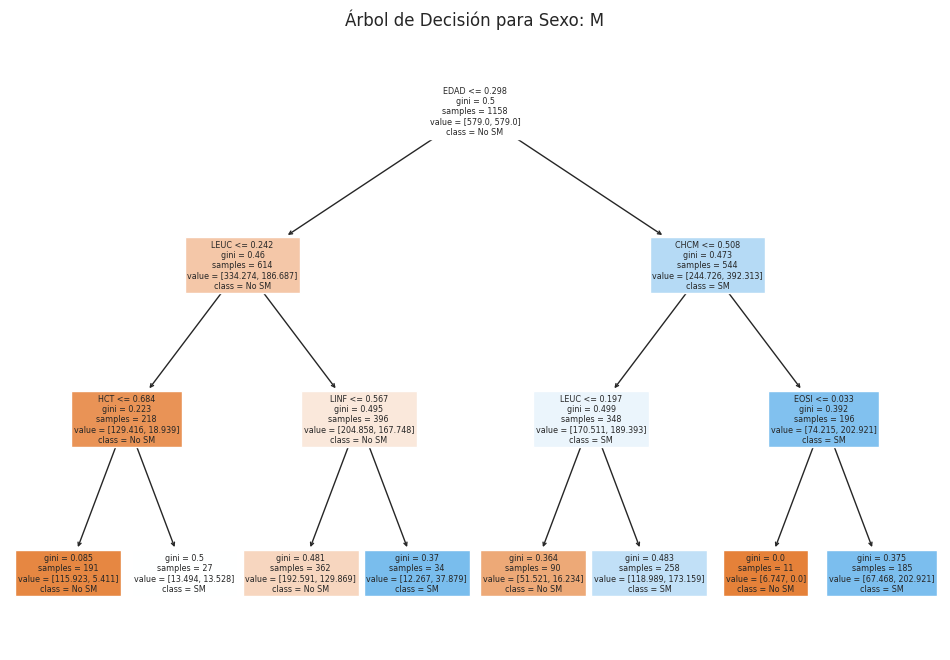

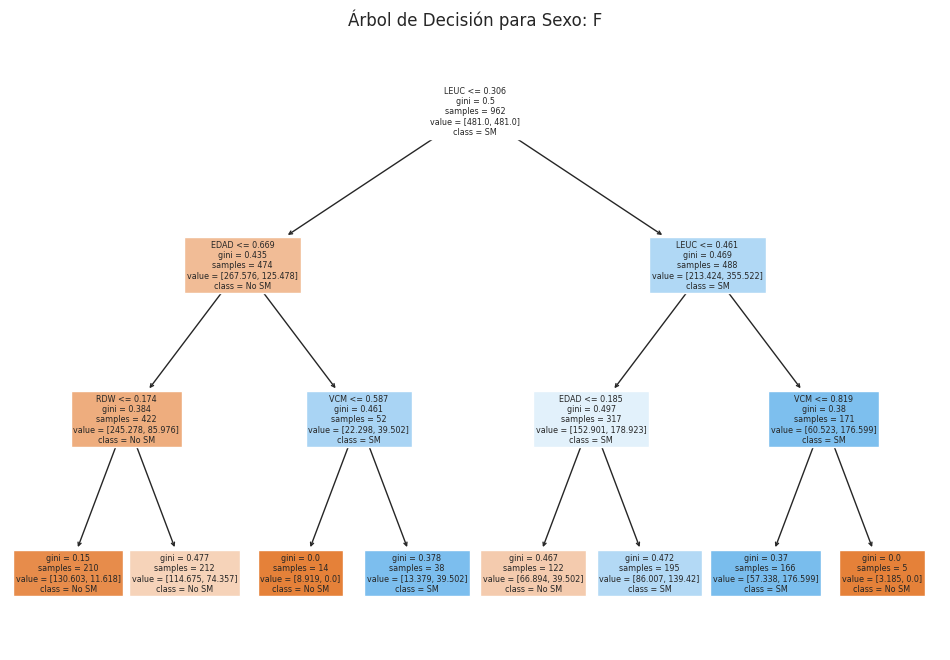

In [53]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Iterar sobre cada sexo y ajustar un modelo de árbol de decisión
for sexo in sexos_unicos:
    # Filtrar el DataFrame por sexo
    data_sexo = data_norm[data_norm['SEXO'] == sexo]

    # Separar las variables predictoras y la variable objetivo
    X = data_sexo[variables_predictoras]
    y = data_sexo['SM']

    # Crear y entrenar el modelo de árbol de decisión
    modelo_cart_fin = DecisionTreeClassifier(criterion='gini', max_depth=3, class_weight='balanced', random_state=42)
    modelo_cart_fin.fit(X, y)

    # Visualizar el árbol de decisión
    plt.figure(figsize=(12, 8))
    plot_tree(modelo_cart_fin, filled=True, feature_names=variables_predictoras, class_names=['No SM', 'SM'])
    plt.title(f"Árbol de Decisión para Sexo: {sexo}")
    plt.show()


In [54]:
from sklearn.tree import export_text

# Iterar sobre cada sexo y ajustar un modelo de árbol de decisión
for sexo in sexos_unicos:
    # Filtrar el DataFrame por sexo
    data_sexo = data_norm[data_norm['SEXO'] == sexo]

    # Separar las variables predictoras y la variable objetivo
    X = data_sexo[variables_predictoras]
    y = data_sexo['SM']

    # Crear y entrenar el modelo de árbol de decisión
    modelo_cart_fin = DecisionTreeClassifier(criterion='gini', max_depth=3, class_weight='balanced', random_state=42)
    modelo_cart_fin.fit(X, y)

    # Obtener las reglas del árbol
    reglas_arbol = export_text(modelo_cart_fin, feature_names=variables_predictoras, spacing=3)

    # Imprimir las reglas por sexo
    print(f"Reglas del Árbol de Decisión para Sexo: {sexo}")
    print(reglas_arbol)


Reglas del Árbol de Decisión para Sexo: M
|--- EDAD <= 0.30
|   |--- LEUC <= 0.24
|   |   |--- HCT <= 0.68
|   |   |   |--- class: 0
|   |   |--- HCT >  0.68
|   |   |   |--- class: 1
|   |--- LEUC >  0.24
|   |   |--- LINF <= 0.57
|   |   |   |--- class: 0
|   |   |--- LINF >  0.57
|   |   |   |--- class: 1
|--- EDAD >  0.30
|   |--- CHCM <= 0.51
|   |   |--- LEUC <= 0.20
|   |   |   |--- class: 0
|   |   |--- LEUC >  0.20
|   |   |   |--- class: 1
|   |--- CHCM >  0.51
|   |   |--- EOSI <= 0.03
|   |   |   |--- class: 0
|   |   |--- EOSI >  0.03
|   |   |   |--- class: 1

Reglas del Árbol de Decisión para Sexo: F
|--- LEUC <= 0.31
|   |--- EDAD <= 0.67
|   |   |--- RDW <= 0.17
|   |   |   |--- class: 0
|   |   |--- RDW >  0.17
|   |   |   |--- class: 0
|   |--- EDAD >  0.67
|   |   |--- VCM <= 0.59
|   |   |   |--- class: 0
|   |   |--- VCM >  0.59
|   |   |   |--- class: 1
|--- LEUC >  0.31
|   |--- LEUC <= 0.46
|   |   |--- EDAD <= 0.19
|   |   |   |--- class: 0
|   |   |--- EDAD >

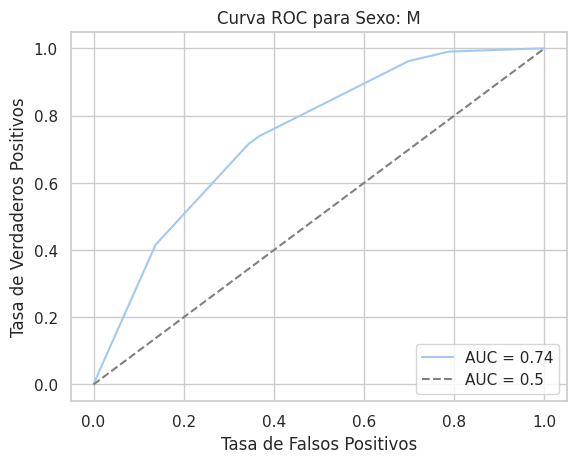

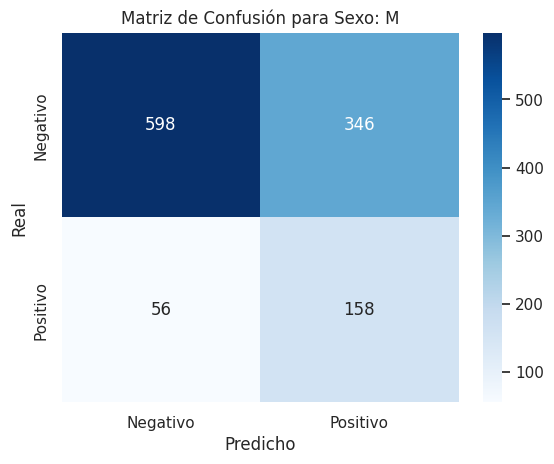

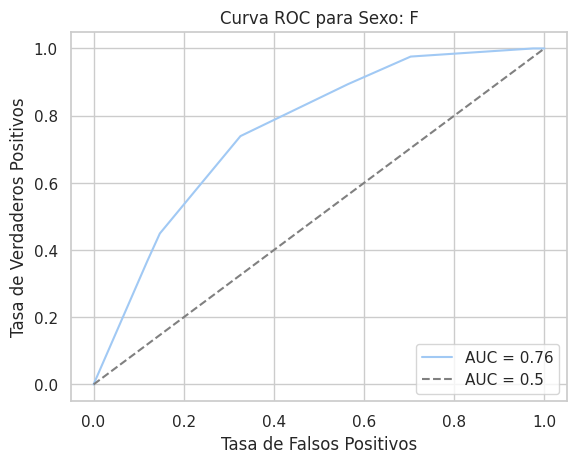

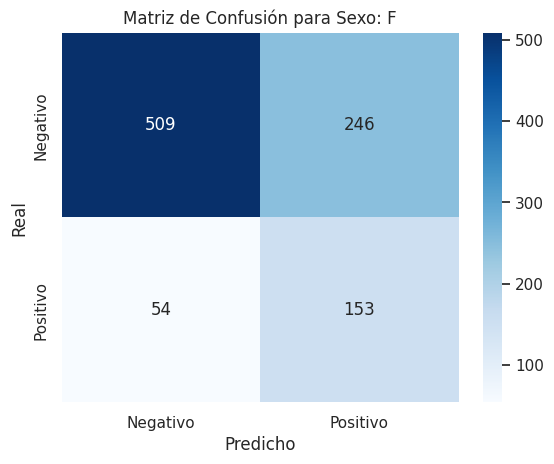

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Función para mostrar la curva ROC y AUC para cada sexo
def mostrar_curva_roc_auc(sexo, X, y, modelo):
    # Calcular las probabilidades y la curva ROC
    y_prob = modelo.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_prob)
    roc_auc = roc_auc_score(y, y_prob)

    # Graficar la curva ROC
    plt.figure()
    plt.title(f'Curva ROC para Sexo: {sexo}')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')

    # Añadir la línea diagonal
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='AUC = 0.5')

    plt.legend(loc='lower right')
    plt.show()

# Función para mostrar la matriz de confusión usando Seaborn
def mostrar_matriz_confusion(sexo, y, y_pred):
    # Calcular la matriz de confusión
    conf_matrix = confusion_matrix(y, y_pred)

    # Definir las etiquetas personalizadas
    labels = ['Negativo', 'Positivo']

    # Graficar la matriz de confusión
    plt.figure()
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'Matriz de Confusión para Sexo: {sexo}')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()

# Iterar sobre cada sexo para mostrar los gráficos
for sexo in sexos_unicos:
    data_sexo = data_norm[data_norm['SEXO'] == sexo]
    X = data_sexo[variables_predictoras]
    y = data_sexo['SM']

    # Asumiendo que 'modelo_cart_fin' es el modelo ya entrenado para el sexo correspondiente
    modelo_cart_fin.fit(X, y)
    y_pred = modelo_cart_fin.predict(X)

    # Mostrar la curva ROC y AUC
    mostrar_curva_roc_auc(sexo, X, y, modelo_cart_fin)

    # Mostrar la matriz de confusión
    mostrar_matriz_confusion(sexo, y, y_pred)



In [56]:
# 25 PREDICCIONES DEL MODELO 1.1 (BALANCEO DE CLASES) POR SEXO Y ETNIAS

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, matthews_corrcoef, confusion_matrix

# Crear un diccionario para almacenar los resultados por género y ETNIA
resultados_por_sexo_y_etnia = {}

# Obtener los géneros únicos en el DataFrame
sexos_unicos = data_norm['SEXO'].unique()

# Obtener las ETNIAs únicas en el DataFrame
etnias_unicas = data_norm['ETNIA'].unique()

# Definir las variables predictoras (excluyendo las variables mencionadas)
variables_predictoras = [col for col in data_norm.columns if col not in ['TS', 'CAB', 'GLU', 'HDL', 'TRG', 'TAS+', 'CAB+', 'GLU+', 'HDL+', 'TRG+', 'N+', 'ETNIA', 'SEXO', 'SM']]

# Iterar sobre cada género y ETNIA para ajustar un modelo de árbol de decisión
for sexo in sexos_unicos:
    for etnia in etnias_unicas:
        # Filtrar el DataFrame por género y ETNIA
        data_sexo_etnia = data_norm[(data_norm['SEXO'] == sexo) & (data_norm['ETNIA'] == etnia)]

        # Separar las variables predictoras y la variable objetivo
        X = data_sexo_etnia[variables_predictoras]
        y = data_sexo_etnia['SM']

        # Crear y entrenar el modelo de árbol de decisión
        modelo_cart_fin = DecisionTreeClassifier(criterion='gini', max_depth=3, class_weight='balanced', random_state=42)
        modelo_cart_fin.fit(X, y)

        # Realizar predicciones en el conjunto de datos
        y_pred = modelo_cart_fin.predict(X)

        # Calcular métricas para evaluar el modelo
        mcc = matthews_corrcoef(y, y_pred)
        y_prob = modelo_cart_fin.predict_proba(X)[:, 1]
        roc_auc = roc_auc_score(y, y_prob)
        conf_matrix = confusion_matrix(y, y_pred)
        tn, fp, fn, tp = conf_matrix.ravel()
        sensibilidad = tp / (tp + fn)
        especificidad = tn / (tn + fp)

        # Almacenar los resultados en el diccionario
        key = (sexo, etnia)
        resultados_por_sexo_y_etnia[key] = {
            "MCC": mcc,
            "AUC": roc_auc,
            "Sensibilidad": sensibilidad,
            "Especificidad": especificidad
        }

# Imprimir los resultados para cada género y ETNIA
for (sexo, etnia), resultados in resultados_por_sexo_y_etnia.items():
    print(f"Resultados para Sexo: {sexo}, ETNIA: {etnia}")
    print("MCC:", resultados["MCC"])
    print("AUC:", resultados["AUC"])
    print("Sensibilidad:", resultados["Sensibilidad"])
    print("Especificidad:", resultados["Especificidad"])
    print("\n")

from google.colab import files

resultados_df = pd.DataFrame.from_dict(resultados_por_sexo_y_etnia, orient='index')
resultados_df.index.names = ['SEXO', 'ETNIA']

# Guardar el DataFrame en un archivo CSV
nombre_archivo = 'resultados_por_sexo_y_etnia.csv'
resultados_df.to_csv(nombre_archivo)

# Descargar el archivo CSV en el disco desde Google Colab
#files.download(nombre_archivo)


Resultados para Sexo: M, ETNIA: Blanco No-Hispánico
MCC: 0.3621176653241636
AUC: 0.7733529990167158
Sensibilidad: 0.84
Especificidad: 0.6283185840707964


Resultados para Sexo: M, ETNIA: Otros
MCC: 0.5882848372775062
AUC: 0.8451618975903614
Sensibilidad: 0.75
Especificidad: 0.8975903614457831


Resultados para Sexo: M, ETNIA: Mexicano Americano
MCC: 0.4131985774466685
AUC: 0.7933248569612206
Sensibilidad: 0.9272727272727272
Especificidad: 0.5244755244755245


Resultados para Sexo: M, ETNIA: Otros Hispánicos
MCC: 0.5700877125495689
AUC: 0.8388932496075354
Sensibilidad: 0.75
Especificidad: 0.8571428571428571


Resultados para Sexo: M, ETNIA: Negro No-Hispánico
MCC: 0.39916149840072446
AUC: 0.8689024390243902
Sensibilidad: 0.875
Especificidad: 0.7365853658536585


Resultados para Sexo: F, ETNIA: Blanco No-Hispánico
MCC: 0.36930355651681246
AUC: 0.8027669129364045
Sensibilidad: 0.9491525423728814
Especificidad: 0.5042735042735043


Resultados para Sexo: F, ETNIA: Otros
MCC: 0.6220137179167

Utilizar el coeficiente de correlación de Matthews (MCC, por sus siglas en inglés) en lugar del área bajo la curva (AUC) como métrica de evaluación para el aprendizaje de un árbol de decisión presenta varias ventajas significativas:   
1. Sensibilidad al desequilibrio de clases: MCC tiene en cuenta el desequilibrio de clases de manera más efectiva que AUC. MCC considera verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos, lo que lo hace más adecuado cuando hay un desequilibrio sustancial entre las clases en el conjunto de datos.
2. Toma en cuenta los errores tipo I y tipo II: MCC mide tanto los errores de tipo I como los de tipo II, lo que proporciona una evaluación más completa del rendimiento del modelo de árbol de decisión. AUC se enfoca principalmente en la tasa de verdaderos positivos frente a falsos positivos.
3. Capacidad para manejar clases desiguales: En problemas donde una clase es mucho más frecuente que la otra, AUC puede dar una impresión engañosa de un buen rendimiento simplemente prediciendo la clase mayoritaria en todo momento. MCC es menos propenso a este sesgo.
4. Interpretación más intuitiva: MCC varía de -1 a 1, donde 1 representa una predicción perfecta, 0 indica un rendimiento similar al azar y -1 denota una predicción inversa perfecta. Esta escala hace que la interpretación de MCC sea más intuitiva que AUC, que varía entre 0 y 1.

In [36]:
# 26 MODELO 2.0 - ÁRBOL DE DECISIÓN (MAXIMIZANDO MCC)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, matthews_corrcoef, confusion_matrix

# Crear un diccionario para almacenar los resultados por sexo
resultados_por_sexo = {}

# Obtener los sexos únicos en el DataFrame
sexos_unicos = data_norm['SEXO'].unique()

# Definir las variables predictoras (excluyendo las variables mencionadas)
variables_predictoras = [col for col in data_norm.columns if col not in ['TS', 'CAB', 'GLU', 'HDL', 'TRG', 'TAS+', 'CAB+', 'GLU+', 'HDL+', 'TRG+', 'N+', 'ETNIA', 'SEXO', 'SM']]

# Iterar sobre cada sexo y ajustar un modelo de árbol de decisión con validación cruzada
for sexo in sexos_unicos:
    # Filtrar el DataFrame por sexo
    data_sexo = data_norm[data_norm['SEXO'] == sexo]

    # Separar las variables predictoras y la variable objetivo
    X = data_sexo[variables_predictoras]
    y = data_sexo['SM']

    # Realizar validación cruzada de 10-fold para evaluar el modelo
    modelo_cart = DecisionTreeClassifier(criterion='gini', max_depth=1, random_state=42)
    scores = cross_val_score(modelo_cart, X, y, cv=10, scoring='matthews_corrcoef')

    # Entrenar el modelo en el conjunto de datos completo
    modelo_cart.fit(X, y)

    # Obtener las variables utilizadas en el árbol
    variables_arbol = [variables_predictoras[i] for i in range(len(variables_predictoras)) if modelo_cart.feature_importances_[i] > 0]

    # Realizar predicciones en el conjunto de datos completo
    y_pred = modelo_cart.predict(X)

    # Calcular la matriz de confusión
    conf_matrix = confusion_matrix(y, y_pred)

    # Calcular la Sensibilidad y Especificidad
    tn, fp, fn, tp = conf_matrix.ravel()
    sensibilidad = tp / (tp + fn)
    especificidad = tn / (tn + fp)

    # Calcular el AUC (Área bajo la curva ROC)
    y_prob = modelo_cart.predict_proba(X)[:, 1]
    roc_auc = roc_auc_score(y, y_prob)

    # Calcular el Coeficiente de Correlación de Matthews (MCC)
    mcc = matthews_corrcoef(y, y_pred)

    # Almacenar los resultados en el diccionario
    resultados_por_sexo[sexo] = {
        "Variables en el Árbol": variables_arbol,
        "MCC": mcc,
        "AUC": roc_auc,
        "Sensibilidad": sensibilidad,
        "Especificidad": especificidad
    }

# Imprimir los resultados para cada sexo
for sexo, resultados in resultados_por_sexo.items():
    print(f"Resultados para Sexo: {sexo}")
    print("Variables en el Árbol:")
    print(resultados["Variables en el Árbol"])
    print("MCC:", resultados["MCC"])
    print("AUC:", resultados["AUC"])
    print("Sensibilidad:", resultados["Sensibilidad"])
    print("Especificidad:", resultados["Especificidad"])
    print("\n")

Resultados para Sexo: M
Variables en el Árbol:
['EDAD']
MCC: 0.0
AUC: 0.6274503009662602
Sensibilidad: 0.0
Especificidad: 1.0


Resultados para Sexo: F
Variables en el Árbol:
['LEUC']
MCC: 0.0
AUC: 0.620660971942285
Sensibilidad: 0.0
Especificidad: 1.0




El árbol obtenido maximizando MCC no fue mejor que el que se consigue maximizando AUC con balanceo de clases con igual profundidad.

In [37]:
# 27 MODELO 3.0 ÁRBOL DE DECISIÓN COM COMPONENTES DEL SM (MAXIMIZANDO AUC CON BALANCEO DE CLASES) POR SEXOS
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, matthews_corrcoef, confusion_matrix
from sklearn.datasets import load_iris

# Crear un diccionario para almacenar los resultados por sexo
resultados_por_sexo = {}
importancias_por_sexo = {}
criterios_info_por_sexo = {}

# Obtener los sexos únicos en el DataFrame
sexos_unicos = data_norm['SEXO'].unique()

# Definir las nuevas variables predictoras
variables_predictoras = ['TS', 'CAB', 'GLU', 'HDL', 'TRG']

# Iterar sobre cada sexo y ajustar un modelo de árbol de decisión con validación cruzada
for sexo in sexos_unicos:
    # Filtrar el DataFrame por sexo
    data_sexo = data_norm[data_norm['SEXO'] == sexo]

    # Separar las variables predictoras y la variable objetivo
    X = data_sexo[variables_predictoras]
    y = data_sexo['SM']

    # Realizar validación cruzada de 10-fold para evaluar el modelo
    modelo_cart = DecisionTreeClassifier(criterion='gini', max_depth=3, class_weight='balanced', random_state=42)
    scores = cross_val_score(modelo_cart, X, y, cv=10, scoring='roc_auc')

    # Entrenar el modelo en el conjunto de datos completo
    modelo_cart.fit(X, y)

    # Obtener las variables utilizadas en el árbol
    variables_arbol = variables_predictoras  # Todas las variables se utilizan en este caso
    importancia_variables = modelo_cart.feature_importances_

    # Almacenar las importancias en el diccionario por sexo
    importancias_por_sexo[sexo] = {'Variable': variables_arbol, 'Importancia': importancia_variables}

    # Realizar predicciones en el conjunto de datos completo
    y_pred = modelo_cart.predict(X)

    # Calcular la matriz de confusión
    conf_matrix = confusion_matrix(y, y_pred)

    # Calcular la Sensibilidad y Especificidad
    tn, fp, fn, tp = conf_matrix.ravel()
    sensibilidad = tp / (tp + fn)
    especificidad = tn / (tn + fp)

    # Calcular el AUC (Área bajo la curva ROC)
    y_prob = modelo_cart.predict_proba(X)[:, 1]
    roc_auc = roc_auc_score(y, y_prob)

    # Calcular el Coeficiente de Correlación de Matthews (MCC)
    mcc = matthews_corrcoef(y, y_pred)

    # Calcular el Criterio de Información de Akaike (AIC)
    n = len(y)
    aic = -2 * (roc_auc - 1) * n + 2 * len(variables_arbol)

    # Calcular el Criterio de Información Bayesiano (BIC)
    bic = -2 * (roc_auc - 1) * n + len(variables_arbol) * np.log(n)

    # Almacenar los resultados en el diccionario por sexo
    resultados_por_sexo[sexo] = {
        "Variables en el Árbol": variables_arbol,
        "MCC": mcc,
        "AUC": roc_auc,
        "Sensibilidad": sensibilidad,
        "Especificidad": especificidad,
        "AIC": aic,
        "BIC": bic
    }

    # Imprimir los resultados
    print(f"Resultados para Sexo: {sexo}")
    print("Variables en el Árbol:")
    print(variables_arbol)
    print("MCC:", mcc)
    print("AUC:", roc_auc)
    print("Sensibilidad:", sensibilidad)
    print("Especificidad:", especificidad)
    print("AIC:", aic)
    print("BIC:", bic)
    print("\n")

# Crear DataFrames para las importancias de variables y resultados por sexo
importancias_df = pd.DataFrame.from_dict(importancias_por_sexo, orient='index')
importancias_df.index.name = 'Sexo'

resultados_df = pd.DataFrame.from_dict(resultados_por_sexo, orient='index')
resultados_df.index.name = 'Sexo'

# Combinar los DataFrames
resultado_final_df = pd.concat([importancias_df, resultados_df], axis=1)

# Guardar el DataFrame combinado en un archivo CSV
resultado_final_df.to_csv('resultados-combinados.csv')

# Proporcionar el enlace para descargar el archivo en Google Colab
#from google.colab import files
#files.download('resultados-combinados.csv')



Resultados para Sexo: M
Variables en el Árbol:
['TS', 'CAB', 'GLU', 'HDL', 'TRG']
MCC: 0.7733919421852083
AUC: 0.9639112743545066
Sensibilidad: 0.9252336448598131
Especificidad: 0.9205508474576272
AIC: 93.58148859496265
BIC: 118.85373688562734


Resultados para Sexo: F
Variables en el Árbol:
['TS', 'CAB', 'GLU', 'HDL', 'TRG']
MCC: 0.8149977281776197
AUC: 0.9811018331893656
Sensibilidad: 0.9130434782608695
Especificidad: 0.9390728476821192
AIC: 46.36007294366056
BIC: 70.7051451969891




In [38]:
# 28 MODELO 3.1 ÁRBOL DE DECISIÓN COM COMPONENTES DEL SM (MAXIMIZANDO AUC CON BALANCEO DE CLASES) SIN DISTINCIÓN DE SEXOS

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, matthews_corrcoef, confusion_matrix

# Crear un diccionario para almacenar los resultados
resultados = {'Variable': [], 'Valor': []}
importancias_variables = {}

# Definir las variables predictoras
variables_predictoras = ['TS', 'CAB', 'GLU', 'HDL', 'TRG']

# Separar las variables predictoras y la variable objetivo
X = data_norm[variables_predictoras]
y = data_norm['SM']

# Realizar validación cruzada de 10-fold para evaluar el modelo
modelo_cart = DecisionTreeClassifier(criterion='gini', max_depth=3, class_weight='balanced', random_state=42)
scores = cross_val_score(modelo_cart, X, y, cv=10, scoring='roc_auc')

# Entrenar el modelo en el conjunto de datos completo
modelo_cart.fit(X, y)

# Obtener las variables utilizadas en el árbol
variables_arbol = [variables_predictoras[i] for i in range(len(variables_predictoras)) if modelo_cart.feature_importances_[i] > 0]
importancia_variables = [modelo_cart.feature_importances_[i] for i in range(len(variables_predictoras)) if modelo_cart.feature_importances_[i] > 0]

# Almacenar los resultados en el diccionario
resultados['Variable'] = ['Variables en el Árbol', 'MCC', 'AUC', 'Sensibilidad', 'Especificidad', 'AIC', 'BIC']
resultados['Valor'] = [variables_arbol,
                       matthews_corrcoef(y, modelo_cart.predict(X)),
                       roc_auc_score(y, modelo_cart.predict_proba(X)[:, 1]),
                       confusion_matrix(y, modelo_cart.predict(X))[1, 1] / (confusion_matrix(y, modelo_cart.predict(X))[1, 1] + confusion_matrix(y, modelo_cart.predict(X))[1, 0]),
                       confusion_matrix(y, modelo_cart.predict(X))[0, 0] / (confusion_matrix(y, modelo_cart.predict(X))[0, 0] + confusion_matrix(y, modelo_cart.predict(X))[0, 1]),
                       -2 * (roc_auc_score(y, modelo_cart.predict_proba(X)[:, 1]) - 1) * len(y) + 2 * len(variables_arbol),
                       -2 * (roc_auc_score(y, modelo_cart.predict_proba(X)[:, 1]) - 1) * len(y) + len(variables_arbol) * np.log(len(y))]

importancias_variables['Variable'] = variables_arbol
importancias_variables['Importancia'] = importancia_variables

# Imprimir los resultados
print("Resultados del Árbol de Decisión:")
for i in range(len(resultados['Variable'])):
    print(resultados['Variable'][i] + ":")
    print(resultados['Valor'][i])
    print()

# Crear DataFrames para las importancias de variables y resultados
importancias_df = pd.DataFrame.from_dict(importancias_variables)
importancias_df.index.name = 'Variable'

resultados_df = pd.DataFrame(resultados)
resultados_df.index.name = 'Variable'

# Guardar el DataFrame combinado en un archivo CSV
resultado_final_df = pd.concat([importancias_df, resultados_df], axis=1)
resultado_final_df.to_csv('resultados-combinados.csv')

# Proporcionar el enlace para descargar el archivo en Google Colab
#from google.colab import files
#files.download('resultados-combinados.csv')



Resultados del Árbol de Decisión:
Variables en el Árbol:
['TS', 'CAB', 'GLU', 'HDL', 'TRG']

MCC:
0.6749650077118413

AUC:
0.9289179467033144

Sensibilidad:
0.8812351543942993

Especificidad:
0.8746321365509123

AIC:
311.38790597794696

BIC:
339.68376281627724



In [39]:
# 29 MODELO 1.2 ÁRBOL DE DECISIÓN (MAXIMIZANDO AUC CON BALANCEO DE CLASES) SIN DISTINCIÓN DE SEXOS

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, matthews_corrcoef, confusion_matrix

# Crear un diccionario para almacenar los resultados
resultados = {'Variable': [], 'Valor': []}
importancias_variables = {}

# Definir las variables predictoras (excluyendo las variables mencionadas)
variables_predictoras = [col for col in data_norm.columns if col not in ['TS', 'CAB', 'GLU', 'HDL', 'TRG', 'TAS+', 'CAB+', 'GLU+', 'HDL+', 'TRG+', 'N+', 'ETNIA', 'SEXO', 'SM']]

# Separar las variables predictoras y la variable objetivo
X = data_norm[variables_predictoras]
y = data_norm['SM']

# Realizar validación cruzada de 10-fold para evaluar el modelo
modelo_cart_f = DecisionTreeClassifier(criterion='gini', max_depth=3, class_weight='balanced', random_state=42)
scores = cross_val_score(modelo_cart_f, X, y, cv=10, scoring='roc_auc')

# Entrenar el modelo en el conjunto de datos completo
modelo_cart_f.fit(X, y)

# Obtener las variables utilizadas en el árbol
variables_arbol = [variables_predictoras[i] for i in range(len(variables_predictoras)) if modelo_cart_f.feature_importances_[i] > 0]
importancia_variables = [modelo_cart_f.feature_importances_[i] for i in range(len(variables_predictoras)) if modelo_cart_f.feature_importances_[i] > 0]

# Almacenar los resultados en el diccionario
resultados['Variable'] = ['Variables en el Árbol', 'MCC', 'AUC', 'Sensibilidad', 'Especificidad', 'AIC', 'BIC']
resultados['Valor'] = [variables_arbol,
                       matthews_corrcoef(y, modelo_cart_f.predict(X)),
                       roc_auc_score(y, modelo_cart_f.predict_proba(X)[:, 1]),
                       confusion_matrix(y, modelo_cart_f.predict(X))[1, 1] / (confusion_matrix(y, modelo_cart_f.predict(X))[1, 1] + confusion_matrix(y, modelo_cart_f.predict(X))[1, 0]),
                       confusion_matrix(y, modelo_cart_f.predict(X))[0, 0] / (confusion_matrix(y, modelo_cart_f.predict(X))[0, 0] + confusion_matrix(y, modelo_cart_f.predict(X))[0, 1]),
                       -2 * (roc_auc_score(y, modelo_cart_f.predict_proba(X)[:, 1]) - 1) * len(y) + 2 * len(variables_arbol),
                       -2 * (roc_auc_score(y, modelo_cart_f.predict_proba(X)[:, 1]) - 1) * len(y) + len(variables_arbol) * np.log(len(y))]

importancias_variables['Variable'] = variables_arbol
importancias_variables['Importancia'] = importancia_variables

# Imprimir los resultados
print("Resultados del Árbol de Decisión:")
for i in range(len(resultados['Variable'])):
    print(resultados['Variable'][i] + ":")
    print(resultados['Valor'][i])
    print()

# Crear DataFrames para las importancias de variables y resultados
importancias_df = pd.DataFrame.from_dict(importancias_variables)
importancias_df.index.name = 'Variable'

resultados_df = pd.DataFrame(resultados)
resultados_df.index.name = 'Variable'

# Combinar los DataFrames
resultado_final_df = pd.concat([importancias_df, resultados_df], axis=1)

# Guardar el DataFrame combinado en un archivo CSV
resultado_final_df.to_csv('resultados-combinados.csv')

# Proporcionar el enlace para descargar el archivo en Google Colab
#from google.colab import files
#files.download('resultados-combinados.csv')


Resultados del Árbol de Decisión:
Variables en el Árbol:
['EDAD', 'RDW', 'LEUC', 'LINF', 'NEUT']

MCC:
0.2918967510626785

AUC:
0.7132580433648968

Sensibilidad:
0.7624703087885986

Especificidad:
0.6027074749852854

AIC:
1225.7858961328375

BIC:
1254.0817529711678



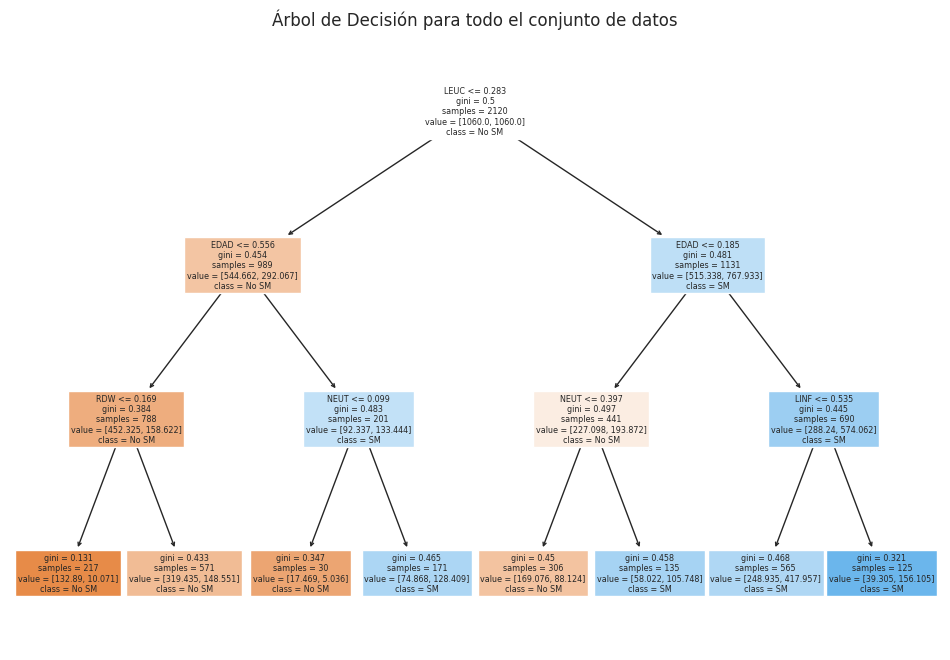

In [40]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Separar las variables predictoras y la variable objetivo
X = data_norm[variables_predictoras]
y = data_norm['SM']

# Crear y entrenar el modelo de árbol de decisión
modelo_cart_f = DecisionTreeClassifier(criterion='gini', max_depth=3, class_weight='balanced', random_state=42)
modelo_cart_f.fit(X, y)

# Visualizar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(modelo_cart_f, filled=True, feature_names=variables_predictoras, class_names=['No SM', 'SM'])
plt.title("Árbol de Decisión para todo el conjunto de datos")
plt.show()




In [41]:
from sklearn.tree import export_text

# Obtener las reglas del árbol
reglas_arbol = export_text(modelo_cart_f, feature_names=variables_predictoras, spacing=3)

# Imprimir las reglas
print("Reglas del Árbol de Decisión:")
print(reglas_arbol)


Reglas del Árbol de Decisión:
|--- LEUC <= 0.28
|   |--- EDAD <= 0.56
|   |   |--- RDW <= 0.17
|   |   |   |--- class: 0
|   |   |--- RDW >  0.17
|   |   |   |--- class: 0
|   |--- EDAD >  0.56
|   |   |--- NEUT <= 0.10
|   |   |   |--- class: 0
|   |   |--- NEUT >  0.10
|   |   |   |--- class: 1
|--- LEUC >  0.28
|   |--- EDAD <= 0.19
|   |   |--- NEUT <= 0.40
|   |   |   |--- class: 0
|   |   |--- NEUT >  0.40
|   |   |   |--- class: 1
|   |--- EDAD >  0.19
|   |   |--- LINF <= 0.53
|   |   |   |--- class: 1
|   |   |--- LINF >  0.53
|   |   |   |--- class: 1



Random Forests:

Ensemble de Árboles: Random Forests es un ensemble learning method, lo que significa que combina múltiples modelos (en este caso, árboles de decisión) para tomar decisiones más robustas. Cada árbol se entrena de forma independiente en una muestra aleatoria de los datos y con características seleccionadas de manera aleatoria.

Bagging: La técnica utilizada en Random Forests se llama Bagging (Bootstrap Aggregating). Se crea una muestra aleatoria con reemplazo a partir de los datos de entrenamiento para cada árbol. Esto introduce variabilidad en el proceso de entrenamiento y reduce el riesgo de sobreajuste.

Bootstrap: Random Forests utiliza el método de Bootstrap para crear múltiples conjuntos de datos de entrenamiento. Esto significa que algunos ejemplos pueden aparecer varias veces en un conjunto de datos bootstrap, mientras que otros pueden no estar presentes en absoluto. Esto aumenta la diversidad de los árboles y mejora la generalización.

Selección Aleatoria de Características: En cada división de un nodo de un árbol, solo se considera un subconjunto aleatorio de las características. Esto evita que algunas características dominen el proceso de decisión y hace que los árboles sean más independientes entre sí.

Votación o Promedio: Para hacer predicciones, Random Forests utiliza una estrategia de votación en el caso de clasificación o un promedio en el caso de regresión. Cada árbol emite su propia predicción y se selecciona la predicción final basada en la mayoría (clasificación) o el promedio ponderado (regresión) de las predicciones individuales.

Robustez y Generalización: Debido a la combinación de múltiples árboles y la diversidad introducida a través del bootstrapping y la selección de características aleatorias, Random Forests tiende a ser más robusto contra el sobreajuste y generaliza bien a datos nuevos y no vistos.

Importancia de Características: Random Forests proporciona una medida de la importancia de las características al evaluar cómo cada característica contribuye a la precisión del modelo. Esto es útil para la selección de características y la comprensión de los factores más influyentes en el problema.En la construcción de cada árbol dentro de un Random Forest, se sigue el proceso típico de un árbol de decisión. Este proceso implica seleccionar la mejor característica para dividir los datos en cada nodo del árbol, de modo que se maximice la homogeneidad (en clasificación) o se minimice la varianza (en regresión) en los nodos hija. La selección de la característica y el umbral de división se realiza de manera que se reduzca al máximo la impureza en los nodos resultantes.

En resumen, aunque Random Forests se basa en el uso de árboles de decisión como componentes individuales, su poder radica en la combinación de múltiples árboles entrenados en conjuntos de datos bootstrap y con selección aleatoria de características. Esta diversidad y aleatoriedad en la construcción de los árboles individuales contribuye a su capacidad para mejorar la generalización y reducir el sobreajuste.

In [42]:
# 30  RANDOM FORESTS (MAXIMIZANDO AUC CON BALANCEO DE CLASES) SIN DISTINCIÓN DE SEXOS

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier  # Importar el clasificador Random Forests
from sklearn.metrics import roc_auc_score, matthews_corrcoef, confusion_matrix

# Definir las variables predictoras (excluyendo las variables mencionadas)
variables_predictoras = [col for col in data_norm.columns if col not in ['TS', 'CAB', 'GLU', 'HDL', 'TRG', 'TAS+', 'CAB+', 'GLU+', 'HDL+', 'TRG+', 'N+', 'ETNIA', 'SEXO', 'SM']]

# Separar las variables predictoras y la variable objetivo
X = data_norm[variables_predictoras]
y = data_norm['SM']

# Configurar el modelo Random Forests con los hiperparámetros específicos
modelo_rf = RandomForestClassifier(n_estimators=100, max_depth=3, max_features=5, class_weight='balanced', random_state=42)

# Entrenar el modelo en el conjunto de datos completo
modelo_rf.fit(X, y)

# Imprimir los resultados
print("Resultados del Modelo Random Forests:")
print("MCC:", matthews_corrcoef(y, modelo_rf.predict(X)))
print("AUC:", roc_auc_score(y, modelo_rf.predict_proba(X)[:, 1]))
sensibilidad = confusion_matrix(y, modelo_rf.predict(X))[1, 1] / (confusion_matrix(y, modelo_rf.predict(X))[1, 1] + confusion_matrix(y, modelo_rf.predict(X))[1, 0])
print("Sensibilidad:", sensibilidad)
especificidad = confusion_matrix(y, modelo_rf.predict(X))[0, 0] / (confusion_matrix(y, modelo_rf.predict(X))[0, 0] + confusion_matrix(y, modelo_rf.predict(X))[0, 1])
print("Especificidad:", especificidad)

# Mostrar la importancia de las características
importancias_caracteristicas = modelo_rf.feature_importances_
print("\nImportancia de las Características:")
for i, caracteristica in enumerate(variables_predictoras):
    print(f"{caracteristica}: {importancias_caracteristicas[i]}")

# Crear DataFrames para las importancias de variables y resultados
importancias_df = pd.DataFrame({'Variable': variables_predictoras, 'Importancia': importancias_caracteristicas})
importancias_df.index.name = 'Variable'

resultados_df = pd.DataFrame({
    'MCC': [matthews_corrcoef(y, modelo_rf.predict(X))],
    'AUC': [roc_auc_score(y, modelo_rf.predict_proba(X)[:, 1])],
    'Sensibilidad': [sensibilidad],
    'Especificidad': [especificidad]
})

# Combinar los DataFrames
resultado_final_df = pd.concat([importancias_df, resultados_df], axis=1)

# Guardar el DataFrame combinado en un archivo CSV
resultado_final_df.to_csv('resultados-combinados.csv', index=False)

# Proporcionar el enlace para descargar el archivo en Google Colab
#from google.colab import files
#files.download('resultados-combinados.csv')



Resultados del Modelo Random Forests:
MCC: 0.3128485224883806
AUC: 0.7694829569999958
Sensibilidad: 0.7030878859857482
Especificidad: 0.6804002354326074

Importancia de las Características:
EDAD: 0.17750082136925716
ERT: 0.014629567414353372
HGB: 0.023601493895882862
HCT: 0.013503284882712418
VCM: 0.012378113420508622
HCM: 0.010788420209816053
CHCM: 0.013027768041923902
RDW: 0.02052713742873167
LEUC: 0.21107913204923534
LINF%: 0.02441441549801693
MONO%: 0.03389250114565542
NEUT%: 0.02718341658886962
EOSI%: 0.04610150840675365
BASO%: 0.012846633987426866
LINF: 0.11354191061410322
MONO: 0.011703632776087982
NEUT: 0.14171293204361038
EOSI: 0.03416740064535783
BASO: 0.007102279746812644
PLQ: 0.04014440277192866
VPM: 0.010153227062955388


In [43]:
# 31  RANDOM FORESTS (MAXIMIZANDO AUC CON BALANCEO DE CLASES) POR SEXOS

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, matthews_corrcoef, confusion_matrix

# Crear un diccionario para almacenar los resultados por sexo
resultados_por_sexo = {}
importancias_por_sexo = {}

# Obtener los sexos únicos en el DataFrame
sexos_unicos = data_norm['SEXO'].unique()

# Definir las variables predictoras (excluyendo las variables mencionadas)
variables_predictoras = [col for col in data_norm.columns if col not in ['TS', 'CAB', 'GLU', 'HDL', 'TRG', 'TAS+', 'CAB+', 'GLU+', 'HDL+', 'TRG+', 'N+', 'ETNIA', 'SEXO', 'SM']]

# Iterar sobre cada sexo y ajustar un modelo de Random Forests con validación cruzada
for sexo in sexos_unicos:
    # Filtrar el DataFrame por sexo
    data_sexo = data_norm[data_norm['SEXO'] == sexo]

    # Separar las variables predictoras y la variable objetivo
    X = data_sexo[variables_predictoras]
    y = data_sexo['SM']

    # Configurar el modelo Random Forests
    modelo_rf = RandomForestClassifier(n_estimators=100, max_depth=3, max_features=5, class_weight='balanced', random_state=42)

    # Realizar validación cruzada de 10-fold para evaluar el modelo
    scores = cross_val_score(modelo_rf, X, y, cv=10, scoring='roc_auc')

    # Entrenar el modelo en el conjunto de datos completo
    modelo_rf.fit(X, y)

    # Obtener las variables utilizadas en el modelo
    variables_modelo = [variables_predictoras[i] for i in range(len(variables_predictoras)) if modelo_rf.feature_importances_[i] > 0]
    importancia_variables = [modelo_rf.feature_importances_[i] for i in range(len(variables_predictoras)) if modelo_rf.feature_importances_[i] > 0]

    # Almacenar las importancias en el diccionario por sexo
    importancias_por_sexo[sexo] = {'Variable': variables_modelo, 'Importancia': importancia_variables}

    # Realizar predicciones en el conjunto de datos completo
    y_pred = modelo_rf.predict(X)

    # Calcular la matriz de confusión
    conf_matrix = confusion_matrix(y, y_pred)

    # Calcular la Sensibilidad y Especificidad
    tn, fp, fn, tp = conf_matrix.ravel()
    sensibilidad = tp / (tp + fn)
    especificidad = tn / (tn + fp)

    # Calcular el AUC (Área bajo la curva ROC)
    y_prob = modelo_rf.predict_proba(X)[:, 1]
    roc_auc = roc_auc_score(y, y_prob)

    # Calcular el Coeficiente de Correlación de Matthews (MCC)
    mcc = matthews_corrcoef(y, y_pred)

    # Almacenar los resultados en el diccionario por sexo
    resultados_por_sexo[sexo] = {
        "Variables en el Modelo": variables_modelo,
        "MCC": mcc,
        "AUC": roc_auc,
        "Sensibilidad": sensibilidad,
        "Especificidad": especificidad
    }

    # Mostrar la importancia de las características para cada sexo
    importancias_caracteristicas = modelo_rf.feature_importances_
    print(f"\nImportancia de las Características para Sexo: {sexo}")
    for i, caracteristica in enumerate(variables_modelo):
        print(f"{caracteristica}: {importancias_caracteristicas[i]}")

    # Imprimir los resultados
    print(f"Resultados para Sexo: {sexo}")
    print("Variables en el Modelo:")
    print(variables_modelo)
    print("MCC:", mcc)
    print("AUC:", roc_auc)
    print("Sensibilidad:", sensibilidad)
    print("Especificidad:", especificidad)
    print("\n")

# Crear DataFrames para las importancias de variables y resultados por sexo
importancias_df = pd.DataFrame.from_dict(importancias_por_sexo, orient='index')
importancias_df.index.name = 'Sexo'

resultados_df = pd.DataFrame.from_dict(resultados_por_sexo, orient='index')
resultados_df.index.name = 'Sexo'

# Combinar los DataFrames
resultado_final_df = pd.concat([importancias_df, resultados_df], axis=1)

# Guardar el DataFrame combinado en un archivo CSV
resultado_final_df.to_csv('resultados-combinados.csv')

# Proporcionar el enlace para descargar el archivo en Google Colab
#from google.colab import files
#files.download('resultados-combinados.csv')


Importancia de las Características para Sexo: M
EDAD: 0.25962817114093467
ERT: 0.020575471758822933
HGB: 0.029533700126841644
HCT: 0.0137958314361844
VCM: 0.014361531521165585
HCM: 0.031127826602801743
CHCM: 0.08075196507778891
RDW: 0.009504684081626733
LEUC: 0.11541736189112489
LINF%: 0.036607142204243104
MONO%: 0.034352588863736225
NEUT%: 0.029467186367723577
EOSI%: 0.061750979499681266
BASO%: 0.0163546386523074
LINF: 0.08344087507505642
MONO: 0.011209814532502797
NEUT: 0.06261547894816219
EOSI: 0.026264828385604084
BASO: 0.002152921941153808
PLQ: 0.043166527425143535
VPM: 0.017920474467394108
Resultados para Sexo: M
Variables en el Modelo:
['EDAD', 'ERT', 'HGB', 'HCT', 'VCM', 'HCM', 'CHCM', 'RDW', 'LEUC', 'LINF%', 'MONO%', 'NEUT%', 'EOSI%', 'BASO%', 'LINF', 'MONO', 'NEUT', 'EOSI', 'BASO', 'PLQ', 'VPM']
MCC: 0.39595957262332004
AUC: 0.823162521780453
Sensibilidad: 0.7710280373831776
Especificidad: 0.7213983050847458



Importancia de las Características para Sexo: F
EDAD: 0.08645755

In [44]:
# 32 MODELO 1.2 ÁRBOL DE DECISIÓN (MAXIMIZANDO AUC CON BALANCEO DE CLASES) SIN DISTINCIÓN DE SEXOS (EXCLUYENDO EDAD Y LEUC)

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, matthews_corrcoef, confusion_matrix

# Crear un diccionario para almacenar los resultados
resultados = {'Variable': [], 'Valor': []}
importancias_variables = {}

# Definir las variables predictoras (excluyendo las variables mencionadas)
variables_predictoras = [col for col in data_norm.columns if col not in ['TS', 'CAB', 'GLU', 'HDL', 'TRG', 'TAS+', 'CAB+', 'GLU+', 'HDL+', 'TRG+', 'N+', 'ETNIA', 'SEXO','EDAD', 'LEUC','SM']]

# Separar las variables predictoras y la variable objetivo
X = data_norm[variables_predictoras]
y = data_norm['SM']

# Realizar validación cruzada de 10-fold para evaluar el modelo
modelo_cart_f = DecisionTreeClassifier(criterion='gini', max_depth=3, class_weight='balanced', random_state=42)
scores = cross_val_score(modelo_cart_f, X, y, cv=10, scoring='roc_auc')

# Entrenar el modelo en el conjunto de datos completo
modelo_cart_f.fit(X, y)

# Obtener las variables utilizadas en el árbol
variables_arbol = [variables_predictoras[i] for i in range(len(variables_predictoras)) if modelo_cart_f.feature_importances_[i] > 0]
importancia_variables = [modelo_cart_f.feature_importances_[i] for i in range(len(variables_predictoras)) if modelo_cart_f.feature_importances_[i] > 0]

# Almacenar los resultados en el diccionario
resultados['Variable'] = ['Variables en el Árbol', 'MCC', 'AUC', 'Sensibilidad', 'Especificidad', 'AIC', 'BIC']
resultados['Valor'] = [variables_arbol,
                       matthews_corrcoef(y, modelo_cart_f.predict(X)),
                       roc_auc_score(y, modelo_cart_f.predict_proba(X)[:, 1]),
                       confusion_matrix(y, modelo_cart_f.predict(X))[1, 1] / (confusion_matrix(y, modelo_cart_f.predict(X))[1, 1] + confusion_matrix(y, modelo_cart_f.predict(X))[1, 0]),
                       confusion_matrix(y, modelo_cart_f.predict(X))[0, 0] / (confusion_matrix(y, modelo_cart_f.predict(X))[0, 0] + confusion_matrix(y, modelo_cart_f.predict(X))[0, 1]),
                       -2 * (roc_auc_score(y, modelo_cart_f.predict_proba(X)[:, 1]) - 1) * len(y) + 2 * len(variables_arbol),
                       -2 * (roc_auc_score(y, modelo_cart_f.predict_proba(X)[:, 1]) - 1) * len(y) + len(variables_arbol) * np.log(len(y))]

importancias_variables['Variable'] = variables_arbol
importancias_variables['Importancia'] = importancia_variables

# Imprimir los resultados
print("Resultados del Árbol de Decisión:")
for i in range(len(resultados['Variable'])):
    print(resultados['Variable'][i] + ":")
    print(resultados['Valor'][i])
    print()

# Crear DataFrames para las importancias de variables y resultados
importancias_df = pd.DataFrame.from_dict(importancias_variables)
importancias_df.index.name = 'Variable'

resultados_df = pd.DataFrame(resultados)
resultados_df.index.name = 'Variable'

# Combinar los DataFrames
resultado_final_df = pd.concat([importancias_df, resultados_df], axis=1)

# Guardar el DataFrame combinado en un archivo CSV
resultado_final_df.to_csv('resultados-combinados.csv')

# Proporcionar el enlace para descargar el archivo en Google Colab
#from google.colab import files
#files.download('resultados-combinados.csv')


Resultados del Árbol de Decisión:
Variables en el Árbol:
['VCM', 'RDW', 'EOSI%', 'LINF', 'NEUT']

MCC:
0.19509182938989814

AUC:
0.6703062720980204

Sensibilidad:
0.8717339667458432

Especificidad:
0.3543260741612713

AIC:
1407.9014063043935

BIC:
1436.1972631427238



In [45]:
# 33 MODELO 4.0 KNN CON TODAS LAS VARIABLES POR SEXOS (OVERSAMPLING)

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score, matthews_corrcoef, confusion_matrix
from sklearn.datasets import load_iris
from imblearn.over_sampling import RandomOverSampler

# Crear un diccionario para almacenar los resultados por sexo
resultados_por_sexo = {}
importancias_por_sexo = {}
criterios_info_por_sexo = {}

# Obtener los sexos únicos en el DataFrame
sexos_unicos = data_norm['SEXO'].unique()

# Definir las variables predictoras (excluyendo las variables mencionadas)
variables_predictoras = [col for col in data_norm.columns if col not in ['TS', 'CAB', 'GLU', 'HDL', 'TRG', 'TAS+', 'CAB+', 'GLU+', 'HDL+', 'TRG+', 'N+', 'ETNIA', 'SEXO', 'SM']]

# Iterar sobre cada sexo y ajustar un modelo de KNN con validación cruzada
for sexo in sexos_unicos:
    # Filtrar el DataFrame por sexo
    data_sexo = data_norm[data_norm['SEXO'] == sexo]

    # Separar las variables predictoras y la variable objetivo
    X = data_sexo[variables_predictoras]
    y = data_sexo['SM']

    # Ajustar la estrategia de sobremuestreo según tus necesidades
    oversampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y)

    # Realizar validación cruzada de 10-fold para evaluar el modelo KNN
    modelo_knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')  # Puedes ajustar los hiperparámetros según sea necesario
    scores = cross_val_score(modelo_knn, X_resampled, y_resampled, cv=10, scoring='roc_auc')

    # Entrenar el modelo KNN en el conjunto de datos completo
    modelo_knn.fit(X_resampled, y_resampled)

    # Almacenar las importancias en el diccionario por sexo (KNN no tiene importancias como los árboles)
    importancias_por_sexo[sexo] = {'Variable': 'N/A', 'Importancia': 'N/A'}

    # Realizar predicciones en el conjunto de datos completo
    y_pred = modelo_knn.predict(X_resampled)

    # Calcular la matriz de confusión
    conf_matrix = confusion_matrix(y_resampled, y_pred)

    # Calcular la Sensibilidad y Especificidad
    tn, fp, fn, tp = conf_matrix.ravel()
    sensibilidad = tp / (tp + fn)
    especificidad = tn / (tn + fp)

    # Calcular el AUC (Área bajo la curva ROC)
    y_prob = modelo_knn.predict_proba(X_resampled)[:, 1]
    roc_auc = roc_auc_score(y_resampled, y_prob)

    # Calcular el Coeficiente de Correlación de Matthews (MCC)
    mcc = matthews_corrcoef(y_resampled, y_pred)

    # Almacenar los resultados en el diccionario por sexo
    resultados_por_sexo[sexo] = {
        "MCC": mcc,
        "AUC": roc_auc,
        "Sensibilidad": sensibilidad,
        "Especificidad": especificidad,
            }

    # Imprimir los resultados
    print(f"Resultados para Sexo: {sexo}")
    print("Variables en el Modelo: N/A")  # KNN no tiene variables como los árboles
    print("MCC:", mcc)
    print("AUC:", roc_auc)
    print("Sensibilidad:", sensibilidad)
    print("Especificidad:", especificidad)
    print("\n")

# Crear DataFrames para las importancias de variables y resultados por sexo
importancias_df = pd.DataFrame.from_dict(importancias_por_sexo, orient='index')
importancias_df.index.name = 'Sexo'

resultados_df = pd.DataFrame.from_dict(resultados_por_sexo, orient='index')
resultados_df.index.name = 'Sexo'

# Combinar los DataFrames
resultado_final_df = pd.concat([importancias_df, resultados_df], axis=1)

# Guardar el DataFrame combinado en un archivo CSV
resultado_final_df.to_csv('resultados-combinados.csv')

# Proporcionar el enlace para descargar el archivo en Google Colab
#from google.colab import files
#files.download('resultados-combinados.csv')


Resultados para Sexo: M
Variables en el Modelo: N/A
MCC: 0.5723809313345485
AUC: 0.8941205382792301
Sensibilidad: 0.7478813559322034
Especificidad: 0.8347457627118644


Resultados para Sexo: F
Variables en el Modelo: N/A
MCC: 0.5514844840061541
AUC: 0.8845293094665098
Sensibilidad: 0.6604774535809018
Especificidad: 0.8768211920529801




Filtrar y preparar los datos: Se inicia filtrando el DataFrame para el sexo específico y separando las variables predictoras (X) y la variable objetivo (y) del conjunto de datos.

Sobremuestreo de la clase minoritaria: Se aplica el sobremuestreo utilizando RandomOverSampler para abordar el desequilibrio de clases.

Configurar y entrenar el modelo KNN:

Se crea un clasificador KNN con KNeighborsClassifier.
Se realiza una validación cruzada de 10-fold (cross_val_score) para evaluar el modelo.
Entrenamiento y predicción: Se entrena el modelo KNN en el conjunto de datos completo con la estrategia de sobremuestreo aplicada y se realizan predicciones (y_pred) en el conjunto de datos de entrenamiento.

Evaluación del modelo: Se calculan diversas métricas de evaluación, como la matriz de confusión, Sensibilidad, Especificidad, AUC y MCC.

Almacenamiento de resultados: Los resultados de las métricas se almacenan en diccionarios para su posterior análisis y presentación.

Impresión de resultados: Se imprimen los resultados para cada sexo, incluyendo las métricas calculadas.

In [46]:
# 34 MODELO 4.1 KNN CON SELECCIÓN DE VARIABLES (ANOVA-F) POR SEXOS (OVERSAMPLING)

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score, matthews_corrcoef, confusion_matrix
from sklearn.datasets import load_iris
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import SelectKBest, f_classif

# Crear un diccionario para almacenar las características seleccionadas por sexo
caracteristicas_seleccionadas_por_sexo = {}

# Obtener los sexos únicos en el DataFrame
sexos_unicos = data_norm['SEXO'].unique()

# Definir las variables predictoras (excluyendo las variables mencionadas)
variables_predictoras = [col for col in data_norm.columns if col not in ['TS', 'CAB', 'GLU', 'HDL', 'TRG', 'TAS+', 'CAB+', 'GLU+', 'HDL+', 'TRG+', 'N+', 'ETNIA', 'SEXO', 'SM']]

# Iterar sobre cada sexo y ajustar un modelo de KNN con selección de características y validación cruzada
for sexo in sexos_unicos:
    # Filtrar el DataFrame por sexo
    data_sexo = data_norm[data_norm['SEXO'] == sexo]

    # Separar las variables predictoras y la variable objetivo
    X = data_sexo[variables_predictoras]
    y = data_sexo['SM']

    # Aplicar selección de características utilizando ANOVA-F para clasificación
    selector = SelectKBest(score_func=f_classif, k=5)
    X_selected = selector.fit_transform(X, y)

    # Obtener las características seleccionadas
    caracteristicas_seleccionadas = np.array(variables_predictoras)[selector.get_support()]

    # Almacenar las características seleccionadas en el diccionario por sexo
    caracteristicas_seleccionadas_por_sexo[sexo] = list(caracteristicas_seleccionadas)

    # Ajustar la estrategia de sobremuestreo según tus necesidades
    oversampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X_selected, y)

    # Realizar validación cruzada de 10-fold para evaluar el modelo KNN
    modelo_knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
    scores = cross_val_score(modelo_knn, X_resampled, y_resampled, cv=10, scoring='roc_auc')

    # Entrenar el modelo KNN en el conjunto de datos completo
    modelo_knn.fit(X_resampled, y_resampled)

    # Realizar predicciones en el conjunto de datos completo
    y_pred = modelo_knn.predict(X_resampled)

    # Calcular la matriz de confusión
    conf_matrix = confusion_matrix(y_resampled, y_pred)

    # Calcular la Sensibilidad y Especificidad
    tn, fp, fn, tp = conf_matrix.ravel()
    sensibilidad = tp / (tp + fn)
    especificidad = tn / (tn + fp)

    # Calcular el AUC (Área bajo la curva ROC)
    y_prob = modelo_knn.predict_proba(X_resampled)[:, 1]
    roc_auc = roc_auc_score(y_resampled, y_prob)

    # Calcular el Coeficiente de Correlación de Matthews (MCC)
    mcc = matthews_corrcoef(y_resampled, y_pred)

    # Almacenar los resultados en el diccionario por sexo
    resultados_por_sexo[sexo] = {
        "MCC": mcc,
        "AUC": roc_auc,
        "Sensibilidad": sensibilidad,
        "Especificidad": especificidad,
            }

    # Impresión de resultados
    print(f"Resultados para Sexo: {sexo}")
    print("MCC:", mcc)
    print("AUC:", roc_auc)
    print("Sensibilidad:", sensibilidad)
    print("Especificidad:", especificidad)
    print("Características seleccionadas:")
    print(caracteristicas_seleccionadas_por_sexo[sexo])
    print("\n")

Resultados para Sexo: M
MCC: 0.5999589885802247
AUC: 0.9064138358230394
Sensibilidad: 0.7648305084745762
Especificidad: 0.8453389830508474
Características seleccionadas:
['EDAD', 'CHCM', 'LEUC', 'LINF', 'NEUT']


Resultados para Sexo: F
MCC: 0.5723739371269806
AUC: 0.8900978446080068
Sensibilidad: 0.7294429708222812
Especificidad: 0.847682119205298
Características seleccionadas:
['LEUC', 'LINF', 'MONO', 'NEUT', 'PLQ']




In [47]:
# 35 MODELO 4.2 KNN CON SELECCIÓN DE VARIABLES (ANOVA-F) POR SEXOS (UNDERSAMPLING)

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score, matthews_corrcoef, confusion_matrix
from sklearn.datasets import load_iris
from imblearn.under_sampling import RandomUnderSampler  # Importamos RandomUnderSampler
from sklearn.feature_selection import SelectKBest, f_classif

# Crear un diccionario para almacenar las características seleccionadas por sexo
caracteristicas_seleccionadas_por_sexo = {}
resultados_por_sexo = {}  # Añadido para almacenar resultados

# Obtener los sexos únicos en el DataFrame
sexos_unicos = data_norm['SEXO'].unique()

# Definir las variables predictoras (excluyendo las variables mencionadas)
variables_predictoras = [col for col in data_norm.columns if col not in ['TS', 'CAB', 'GLU', 'HDL', 'TRG', 'TAS+', 'CAB+', 'GLU+', 'HDL+', 'TRG+', 'N+', 'ETNIA', 'SEXO', 'SM']]

# Iterar sobre cada sexo y ajustar un modelo de KNN con selección de características y validación cruzada
for sexo in sexos_unicos:
    # Filtrar el DataFrame por sexo
    data_sexo = data_norm[data_norm['SEXO'] == sexo]

    # Separar las variables predictoras y la variable objetivo
    X = data_sexo[variables_predictoras]
    y = data_sexo['SM']

    # Aplicar selección de características utilizando ANOVA-F para clasificación
    selector = SelectKBest(score_func=f_classif, k=5)
    X_selected = selector.fit_transform(X, y)

    # Obtener las características seleccionadas
    caracteristicas_seleccionadas = np.array(variables_predictoras)[selector.get_support()]

    # Almacenar las características seleccionadas en el diccionario por sexo
    caracteristicas_seleccionadas_por_sexo[sexo] = list(caracteristicas_seleccionadas)

    # Ajustar la estrategia de submuestreo
    undersampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)  # Cambiado a RandomUnderSampler
    X_resampled, y_resampled = undersampler.fit_resample(X_selected, y)

    # Realizar validación cruzada de 10-fold para evaluar el modelo KNN
    modelo_knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
    scores = cross_val_score(modelo_knn, X_resampled, y_resampled, cv=10, scoring='roc_auc')

    # Entrenar el modelo KNN en el conjunto de datos completo
    modelo_knn.fit(X_resampled, y_resampled)

    # Realizar predicciones en el conjunto de datos completo
    y_pred = modelo_knn.predict(X_resampled)

    # Calcular la matriz de confusión
    conf_matrix = confusion_matrix(y_resampled, y_pred)

    # Calcular la Sensibilidad y Especificidad
    tn, fp, fn, tp = conf_matrix.ravel()
    sensibilidad = tp / (tp + fn)
    especificidad = tn / (tn + fp)

    # Calcular el AUC (Área bajo la curva ROC)
    y_prob = modelo_knn.predict_proba(X_resampled)[:, 1]
    roc_auc = roc_auc_score(y_resampled, y_prob)

    # Calcular el Coeficiente de Correlación de Matthews (MCC)
    mcc = matthews_corrcoef(y_resampled, y_pred)

    # Almacenar los resultados en el diccionario por sexo
    resultados_por_sexo[sexo] = {
        "MCC": mcc,
        "AUC": roc_auc,
        "Sensibilidad": sensibilidad,
        "Especificidad": especificidad,
    }

    # Impresión de resultados
    print(f"Resultados para Sexo: {sexo}")
    print("MCC:", mcc)
    print("AUC:", roc_auc)
    print("Sensibilidad:", sensibilidad)
    print("Especificidad:", especificidad)
    print("Características seleccionadas:")
    print(caracteristicas_seleccionadas_por_sexo[sexo])
    print("\n")




Resultados para Sexo: M
MCC: 0.4529773369547454
AUC: 0.8212835182111975
Sensibilidad: 0.5327102803738317
Especificidad: 0.8855140186915887
Características seleccionadas:
['EDAD', 'CHCM', 'LEUC', 'LINF', 'NEUT']


Resultados para Sexo: F
MCC: 0.44394139454419446
AUC: 0.8110340964783309
Sensibilidad: 0.5169082125603864
Especificidad: 0.8888888888888888
Características seleccionadas:
['LEUC', 'LINF', 'MONO', 'NEUT', 'PLQ']




El algoritmo Naive Bayes en su implementación estándar en scikit-learn no ofrece un parámetro para el balanceo de clases como class_weight. Sin embargo, hay varias formas de abordar el desbalance de clases antes de entrenar el modelo con la utilización de Sobremuestreo de la Clase Minoritaria o el Submuestreo de la Clase Mayoritaria. El sobremuestreo puede llevar a un sobreajuste si se añaden demasiadas muestras sintéticas, mientras que el submuestreo puede perder información valiosa al eliminar muestras.  
El Naive Bayes Gaussiano (GaussianNB),  no proporcionan un método intrínseco para evaluar la importancia de las características. La Eliminación Recursiva de Características (RFE, por sus siglas en inglés) requiere que el modelo estimador tenga atributos como **coef** o **feature_importances** para poder clasificar las características según su importancia relativa. En el caso de GaussianNB, estos atributos no están presentes.
Por lo tanto, se introduce un modelo intermedio, como un Árbol de Decisión (DecisionTreeClassifier) o una Regresión Logística (LogisticRegression), que sí tienen estos atributos. Este modelo intermedio se usa exclusivamente para la etapa de selección de características. Una vez que se han identificado las características más importantes, estas se utilizan para entrenar el modelo final, que en este contexto es un modelo Naive Bayes Gaussiano.
Este enfoque permite combinar la eficacia de un modelo específico para la selección de características con las ventajas de otro modelo (en este caso, GaussianNB) que podría ser más adecuado para el problema de clasificación en cuestión, pero que no es compatible con métodos de selección de características como RFE.
En resumen, el modelo intermedio actúa como un puente para superar las limitaciones del algoritmo de aprendizaje automático que se desea usar en el modelo final, permitiendo una selección de características efectiva.






In [48]:
# 36 MODELO 5 NAIVE BAYES CON SELECCIÓN DE VARIABLES (ÁRBOL DE DECISIÓN) POR SEXOS (OVERSAMPLING)

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score, matthews_corrcoef, confusion_matrix
from sklearn.datasets import load_iris
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

# Crear un diccionario para almacenar los resultados por sexo
resultados_por_sexo = {}

# Obtener los sexos únicos en el DataFrame
sexos_unicos = data_norm['SEXO'].unique()

# Definir las variables predictoras (excluyendo las variables mencionadas)
variables_predictoras = [col for col in data_norm.columns if col not in ['TS', 'CAB', 'GLU', 'HDL', 'TRG', 'TAS+', 'CAB+', 'GLU+', 'HDL+', 'TRG+', 'N+', 'ETNIA', 'SEXO', 'SM']]

# Iterar sobre cada sexo
for sexo in sexos_unicos:
    # Filtrar el DataFrame por sexo
    data_sexo = data_norm[data_norm['SEXO'] == sexo]

    # Separar las variables predictoras y la variable objetivo
    X = data_sexo[variables_predictoras]
    y = data_sexo['SM']

    # Aplicar sobremuestreo a las clases minoritarias
    oversampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y)

    # Utilizar un modelo de árbol de decisión para la selección de características
    model_intermedio = DecisionTreeClassifier()
    rfe = RFE(estimator=model_intermedio, n_features_to_select=5)
    fit = rfe.fit(X_resampled, y_resampled)

    # Identificar las características seleccionadas
    caracteristicas_seleccionadas = np.array(variables_predictoras)[fit.support_]

    # Utilizar solo las características seleccionadas para el modelo final
    X_resampled_rfe = X_resampled.iloc[:, fit.support_]

    # Entrenar el modelo Naive Bayes en el nuevo conjunto de características
    model_final = GaussianNB()
    model_final.fit(X_resampled_rfe, y_resampled)

    # Realizar validación cruzada de 10-fold para evaluar el modelo
    scores = cross_val_score(model_final, X_resampled_rfe, y_resampled, cv=10, scoring='roc_auc')

    # Realizar predicciones en el conjunto de datos completo
    y_pred = model_final.predict(X_resampled_rfe)

    # Calcular la matriz de confusión
    conf_matrix = confusion_matrix(y_resampled, y_pred)

    # Calcular la Sensibilidad y Especificidad
    tn, fp, fn, tp = conf_matrix.ravel()
    sensibilidad = tp / (tp + fn)
    especificidad = tn / (tn + fp)

    # Calcular el AUC (Área bajo la curva ROC)
    y_prob = model_final.predict_proba(X_resampled_rfe)[:, 1]
    roc_auc = roc_auc_score(y_resampled, y_prob)

    # Calcular el Coeficiente de Correlación de Matthews (MCC)
    mcc = matthews_corrcoef(y_resampled, y_pred)

    # Almacenar los resultados en el diccionario por sexo
    resultados_por_sexo[sexo] = {
        "MCC": mcc,
        "AUC": roc_auc,
        "Sensibilidad": sensibilidad,
        "Especificidad": especificidad,
        "Características Seleccionadas": caracteristicas_seleccionadas.tolist()
    }

    # Imprimir los resultados
    print(f"Resultados para Sexo: {sexo}")
    print("Características Seleccionadas:", caracteristicas_seleccionadas)
    print("MCC:", mcc)
    print("AUC:", roc_auc)
    print("Sensibilidad:", sensibilidad)
    print("Especificidad:", especificidad)
    print("\n")

# Crear un DataFrame para los resultados por sexo
resultados_df = pd.DataFrame.from_dict(resultados_por_sexo, orient='index')
resultados_df.index.name = 'Sexo'

# Guardar el DataFrame en un archivo CSV
resultados_df.to_csv('resultados_naive_bayes.csv')

# Descomente la siguiente línea si está utilizando Google Colab para descargar el archivo
# from google.colab import files


Resultados para Sexo: M
Características Seleccionadas: ['EDAD' 'CHCM' 'EOSI%' 'PLQ' 'VPM']
MCC: 0.2779280490810224
AUC: 0.694807526572824
Sensibilidad: 0.3093220338983051
Especificidad: 0.9088983050847458


Resultados para Sexo: F
Características Seleccionadas: ['EDAD' 'HCT' 'VCM' 'LEUC' 'PLQ']
MCC: 0.25447447886756686
AUC: 0.7363114163753579
Sensibilidad: 0.32891246684350134
Especificidad: 0.8821192052980132




In [49]:
# 37 MODELO 6 REGRESIÓN LOGÍSTICA CON RFE Y BALANCEO DE CLASES

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve, roc_auc_score, matthews_corrcoef, confusion_matrix
from sklearn.datasets import load_iris

# Crear un diccionario para almacenar los resultados por sexo
resultados_por_sexo = {}
importancias_por_sexo = {}

# Obtener los sexos únicos en el DataFrame
sexos_unicos = data_norm['SEXO'].unique()

# Definir las variables predictoras
variables_predictoras = [col for col in data_norm.columns if col not in ['TS', 'CAB', 'GLU', 'HDL', 'TRG', 'TAS+', 'CAB+', 'GLU+', 'HDL+', 'TRG+', 'N+', 'ETNIA', 'SEXO', 'SM']]

# Iterar sobre cada sexo y ajustar un modelo de regresión logística con validación cruzada
for sexo in sexos_unicos:
    # Filtrar el DataFrame por sexo
    data_sexo = data_norm[data_norm['SEXO'] == sexo]

    # Separar las variables predictoras y la variable objetivo
    X = data_sexo[variables_predictoras]
    y = data_sexo['SM']

    # Inicializar y ajustar RFE
    modelo = LogisticRegression(class_weight='balanced', random_state=42)
    rfe = RFE(estimator=modelo, n_features_to_select=5)
    fit = rfe.fit(X, y)

    # Obtener las variables seleccionadas por RFE
    variables_seleccionadas = np.array(variables_predictoras)[fit.support_]

    # Realizar validación cruzada de 10-fold para evaluar el modelo
    scores = cross_val_score(modelo, X[variables_seleccionadas], y, cv=10, scoring='roc_auc')

    # Entrenar el modelo en el conjunto de datos completo con las variables seleccionadas
    modelo.fit(X[variables_seleccionadas], y)

    # Realizar predicciones en el conjunto de datos completo
    y_pred = modelo.predict(X[variables_seleccionadas])

    # Calcular la matriz de confusión
    conf_matrix = confusion_matrix(y, y_pred)

    # Calcular la Sensibilidad y Especificidad
    tn, fp, fn, tp = conf_matrix.ravel()
    sensibilidad = tp / (tp + fn)
    especificidad = tn / (tn + fp)

    # Calcular el AUC (Área bajo la curva ROC)
    y_prob = modelo.predict_proba(X[variables_seleccionadas])[:, 1]
    roc_auc = roc_auc_score(y, y_prob)

    # Calcular el Coeficiente de Correlación de Matthews (MCC)
    mcc = matthews_corrcoef(y, y_pred)

    # Almacenar los resultados en el diccionario por sexo
    resultados_por_sexo[sexo] = {
        "Variables Seleccionadas": variables_seleccionadas.tolist(),
        "MCC": mcc,
        "AUC": roc_auc,
        "Sensibilidad": sensibilidad,
        "Especificidad": especificidad
    }

    # Imprimir los resultados y las variables seleccionadas
    print(f"Resultados para Sexo: {sexo}")
    print("Variables Seleccionadas:")
    print(variables_seleccionadas.tolist())
    print("MCC:", mcc)
    print("AUC:", roc_auc)
    print("Sensibilidad:", sensibilidad)
    print("Especificidad:", especificidad)
    print("\n")

# Crear un DataFrame para los resultados por sexo
resultados_df = pd.DataFrame.from_dict(resultados_por_sexo, orient='index')
resultados_df.index.name = 'Sexo'

# Guardar el DataFrame en un archivo CSV
resultados_df.to_csv('resultados_regresion_logistica.csv')

# Proporcionar el enlace para descargar el archivo en Google Colab
# from google.colab import files
# files.download('resultados_regresion_logistica.csv')


Resultados para Sexo: M
Variables Seleccionadas:
['EDAD', 'CHCM', 'LEUC', 'LINF', 'PLQ']
MCC: 0.223615663944531
AUC: 0.7208636939648344
Sensibilidad: 0.6308411214953271
Especificidad: 0.6514830508474576


Resultados para Sexo: F
Variables Seleccionadas:
['EDAD', 'LEUC', 'LINF', 'NEUT', 'PLQ']
MCC: 0.2648742957407886
AUC: 0.7394247688517772
Sensibilidad: 0.6376811594202898
Especificidad: 0.6768211920529801




In [64]:
# 38 VALIDACIÓN EXTERNA DEL MODELO 1.1 (DEFINITIVO)

# Cargar archivo con los datos para validación externa (NHANES 2015-2016)

# Usar el ID del archivo proporcionado
file_id = '1kJJOetmA8E37FswbeVBQAtZTB4dxFxu2'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('data_val_ext.csv')

# Leer el archivo CSV y almacenarlo en un DataFrame
data_val_ext = pd.read_csv('data_val_ext.csv')

# Verificar que los datos se han cargado correctamente mostrando las primeras filas
print(data_val_ext.head())

  SEXO  EDAD                ETNIA    CAB         TAS  GLU  HDL  TRG  LEUC  \
0    M    53  Blanco No-Hispánico  107.9  140.000000  101   63  147   7.3   
1    F    72   Mexicano Americano   92.9  119.333333  107   78   46   6.1   
2    M    22   Negro No-Hispánico   86.6  111.333333   95   48   68   3.5   
3    M    45                Otros   90.1  110.666667   84   50   52   5.1   
4    F    24                Otros   79.5  107.333333   95   41  201   7.7   

   LINF%  ...   RDW  PLQ   VPM  CAB+  TAS+  GLU+  TRG+  HDL+  N+  SM  
0   31.3  ...  13.4  170   9.6     1     1     1     0     0   3   1  
1   31.7  ...  14.1  123  10.1     1     0     1     0     0   2   0  
2   38.2  ...  13.1  210   7.7     0     0     0     0     0   0   0  
3   42.8  ...  13.2  156   9.2     0     0     0     0     0   0   0  
4   35.3  ...  13.1  230   8.8     0     0     0     1     1   2   0  

[5 rows x 35 columns]


In [65]:
# 39 INFORMACION DEL CONJUNTO DE DATOS PARA VALIDACIÓN EXTERNA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEXO    956 non-null    object 
 1   EDAD    956 non-null    int64  
 2   ETNIA   956 non-null    object 
 3   CAB     956 non-null    float64
 4   TAS     956 non-null    float64
 5   GLU     956 non-null    int64  
 6   HDL     956 non-null    int64  
 7   TRG     956 non-null    int64  
 8   LEUC    956 non-null    float64
 9   LINF%   956 non-null    float64
 10  MONO%   956 non-null    float64
 11  NEUT%   956 non-null    float64
 12  EOSI%   956 non-null    float64
 13  BASO%   956 non-null    float64
 14  LINF    956 non-null    float64
 15  MONO    956 non-null    float64
 16  NEUT    956 non-null    float64
 17  EOSI    956 non-null    float64
 18  BASO    956 non-null    float64
 19  ERT     956 non-null    float64
 20  HGB     956 non-null    float64
 21  HCT     956 non-null    float64
 22  VC

In [66]:
# 40 - NUMERO DE VALORES UNICOS PARA CADA VARIABLE
data.agg(['nunique']).T

nunique
SEXO         2
EDAD        61
ETNIA        5
CAB        458
TAS        129
GLU         80
HDL         79
TRG        244
LEUC        98
LINF%      309
MONO%      107
NEUT%      336
EOSI%      101
BASO%       25
LINF        37
MONO        13
NEUT        79
EOSI        13
BASO         4
ERT        216
HGB         82
HCT        187
VCM        233
HCM        124
CHCM        57
RDW         70
PLQ        246
VPM         53
CAB+         2
TAS+         2
GLU+         2
TRG+         2
HDL+         2
N+           6
SM           2

In [67]:
# 41 - ANALISIS DESCRIPTIVO - NULOS
data.isnull().sum()

SEXO     0
EDAD     0
ETNIA    0
CAB      0
TAS      0
GLU      0
HDL      0
TRG      0
LEUC     0
LINF%    0
MONO%    0
NEUT%    0
EOSI%    0
BASO%    0
LINF     0
MONO     0
NEUT     0
EOSI     0
BASO     0
ERT      0
HGB      0
HCT      0
VCM      0
HCM      0
CHCM     0
RDW      0
PLQ      0
VPM      0
CAB+     0
TAS+     0
GLU+     0
TRG+     0
HDL+     0
N+       0
SM       0
dtype: int64

In [68]:
# 42 - MEDIDAS DE CENTRALIZACION, LOCALIZACION Y DISPERSION
data_val_ext.describe(include='all')

SEXO        EDAD                ETNIA         CAB         TAS  \
count   956  956.000000                  956  956.000000  956.000000   
unique    2         NaN                    5         NaN         NaN   
top       M         NaN  Blanco No-Hispánico         NaN         NaN   
freq    527         NaN                  257         NaN         NaN   
mean    NaN   38.557531                  NaN   95.385983  120.181311   
std     NaN   15.226040                  NaN   15.643436   15.527660   
min     NaN   18.000000                  NaN   63.000000   85.333333   
25%     NaN   26.000000                  NaN   84.000000  110.000000   
50%     NaN   36.000000                  NaN   94.200000  117.333333   
75%     NaN   49.000000                  NaN  104.725000  127.333333   
max     NaN   80.000000                  NaN  165.000000  196.666667   

               GLU         HDL         TRG        LEUC       LINF%  ...  \
count   956.000000  956.000000  956.000000  956.000000  956.000000  ...   
unique         NaN         NaN         NaN         NaN         NaN  ...   
top            NaN         NaN         NaN         NaN         NaN  ...   
freq           NaN         NaN         NaN         NaN         NaN  ...   
mean    101.798117   54.145397  103.542887    6.699477   32.371967  ...   
std      17.680232   15.654944   73.114593    1.841190    7.916309  ...   
min      64.000000   20.000000   18.000000    2.500000   12.400000  ...   
25%      94.000000   43.000000   56.000000    5.400000   27.100000  ...   
50%      99.000000   52.000000   83.000000    6.400000   31.600000  ...   
75%     106.000000   63.000000  129.250000    7.700000   37.300000  ...   
max     293.000000  120.000000  819.000000   15.200000   65.800000  ...   

               RDW         PLQ         VPM        CAB+        TAS+  \
count   956.000000  956.000000  956.000000  956.000000  956.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean     13.523536  235.934100    8.383577    0.448745    0.209205   
std       1.154731   58.438591    0.936313    0.497626    0.406954   
min      11.500000   14.000000    6.300000    0.000000    0.000000   
25%      12.900000  198.000000    7.700000    0.000000    0.000000   
50%      13.300000  228.000000    8.300000    0.000000    0.000000   
75%      13.800000  266.000000    9.000000    1.000000    0.000000   
max      21.400000  522.000000   12.300000    1.000000    1.000000   

              GLU+        TRG+        HDL+          N+          SM  
count   956.000000  956.000000  956.000000  956.000000  956.000000  
unique         NaN         NaN         NaN         NaN         NaN  
top            NaN         NaN         NaN         NaN         NaN  
freq           NaN         NaN         NaN         NaN         NaN  
mean      0.452929    0.174686    0.274059    1.559623    0.223849  
std       0.498040    0.379897    0.446272    1.223505    0.417040  
min       0.000000    0.000000    0.000000    0.000000    0.000000  
25%       0.000000    0.000000    0.000000    1.000000    0.000000  
50%       0.000000    0.000000    0.000000    1.000000    0.000000  
75%       1.000000    0.000000    1.000000    2.000000    0.000000  
max       1.000000    1.000000    1.000000    5.000000    1.000000  

[11 rows x 35 columns]

In [69]:
# 43 - NÚMERO DE INDIVIDUOS POR SEXO Y ETNIA
# Crear una tabla de contingencia para 'SEXO' y 'ETNIA'
contingency_table = pd.crosstab(data_val_ext['SEXO'], data_val_ext['ETNIA'])

# Calcular el total de registros para cada 'SEXO'
total_by_sex = contingency_table.sum(axis=1)

# Crear un diccionario para almacenar los resultados con porcentajes
result_dict = {}

# Calcular los números y porcentajes y almacenarlos en el diccionario
for sex, row in contingency_table.iterrows():
    total_for_sex = total_by_sex[sex]
    result_dict[sex] = {}
    for etnia, count in row.items():
        percentage = round((count / total_for_sex) * 100)
        result_dict[sex][etnia] = f"{count} ({int(percentage)})"

# Convertir el diccionario a un DataFrame para mejor visualización
result_df = pd.DataFrame(result_dict).T

result_df

Blanco No-Hispánico Mexicano Americano Negro No-Hispánico     Otros  \
F            114 (27)            96 (22)            79 (18)   79 (18)   
M            143 (27)           111 (21)            85 (16)  115 (22)   

  Otros Hispánicos  
F          61 (14)  
M          73 (14)

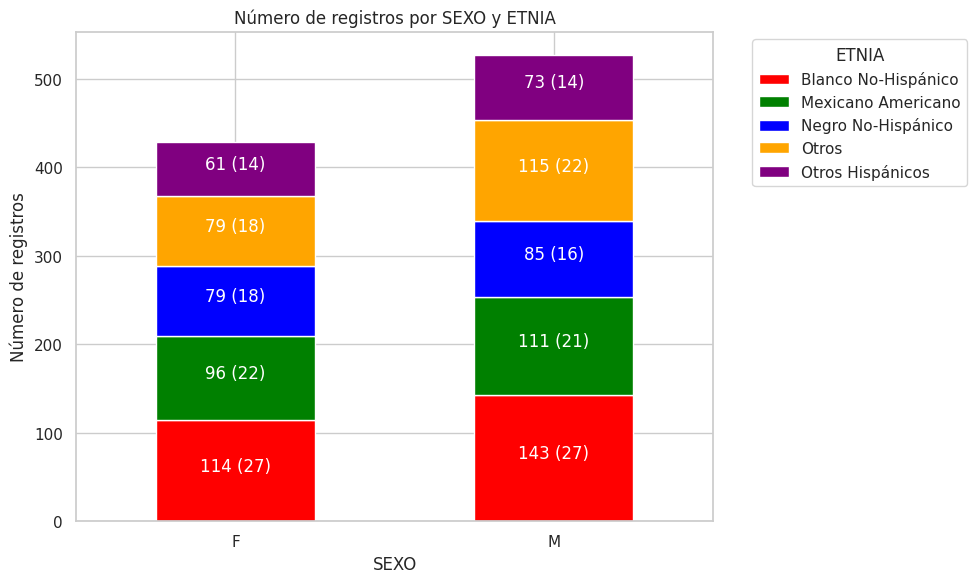

In [74]:
# 44 - GRÁFICO DE NÚMERO DE INDIVIDUOS POR SEXO Y ETNIA
import matplotlib.pyplot as plt
import numpy as np

# Definir una paleta de colores
colores_vivos = ['red', 'green', 'blue', 'orange', 'purple']

# Convertir las cadenas a enteros para el gráfico
def extract_count(value):
    return int(value.split(" ")[0])

numerical_result_df = result_df.applymap(extract_count)

# Crear el gráfico de barras apiladas
ax = numerical_result_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=colores_vivos)

# Etiquetas y título
plt.xlabel('SEXO')
plt.ylabel('Número de registros')
plt.title('Número de registros por SEXO y ETNIA')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje X para mejorar la legibilidad

# Añadir anotaciones de texto para mostrar el número y el porcentaje de registros
y_offset = np.zeros(len(result_df.index))
for index, row in enumerate(result_df.iterrows()):
    sex, values = row
    y_pos = 0  # Posición inicial del texto dentro de la barra
    for etnia, value in values.items():
        count = numerical_result_df.loc[sex, etnia]
        ax.annotate(value, (index, y_pos + count / 2), textcoords="offset points", xytext=(0,0), ha='center', color='white')
        y_pos += count  # Actualizar la posición inicial del próximo texto

# Añadir leyenda
plt.legend(title='ETNIA', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [76]:
# 10 - CASOS POSITIVOS POR SEXO Y ETNIA

# Agrupar el DataFrame por 'SEXO' y 'ETNIA' y contar el número de casos donde 'SM' es igual a 1
grouped_data_positivos = data_val_ext.groupby(['SEXO', 'ETNIA'])['SM'].sum().reset_index()

# Agrupar el DataFrame por 'SEXO' y 'ETNIA' para contar el total de casos
grouped_data_total = data_val_ext.groupby(['SEXO', 'ETNIA']).size().reset_index(name='Total')

# Fusionar los DataFrames para tener los casos positivos y el total en el mismo DataFrame
merged_data = pd.merge(grouped_data_total, grouped_data_positivos, on=['SEXO', 'ETNIA'], how='left').fillna(0)

# Calcular el porcentaje de casos positivos
merged_data['Porcentaje_Entero'] = ((merged_data['SM'] / merged_data['Total']) * 100).apply(lambda x: round(x))

# Crear una columna que combina los casos positivos y el porcentaje
merged_data['Casos_Porcentaje'] = merged_data.apply(lambda row: f"{int(row['SM'])} ({int(row['Porcentaje_Entero'])})", axis=1)

# Convertir el DataFrame a formato de tabla pivote para una mejor visualización
casos_positivos_pivot_val = merged_data.pivot(index='ETNIA', columns='SEXO', values='Casos_Porcentaje').fillna('0 (0)')

# Calcular el total de casos positivos y el total de casos por ETNIA
total_positivos_etnia = data_val_ext.groupby('ETNIA')['SM'].sum()
total_casos_etnia = data_val_ext.groupby('ETNIA').size()

# Calcular el porcentaje de casos positivos por ETNIA
porcentaje_total_etnia = ((total_positivos_etnia / total_casos_etnia) * 100).apply(lambda x: round(x))

# Crear una columna 'TOTAL' que combina los casos positivos y el porcentaje por ETNIA
casos_positivos_pivot_val['TOTAL'] = total_positivos_etnia.apply(str) + " (" + porcentaje_total_etnia.apply(str) + ")"

# Visualizar el DataFrame
print(casos_positivos_pivot_val)

SEXO                       F        M    TOTAL
ETNIA                                         
Blanco No-Hispánico  26 (23)  41 (29)  67 (26)
Mexicano Americano   36 (38)  30 (27)  66 (32)
Negro No-Hispánico    9 (11)  13 (15)  22 (13)
Otros                  6 (8)  18 (16)  24 (12)
Otros Hispánicos     17 (28)  18 (25)  35 (26)


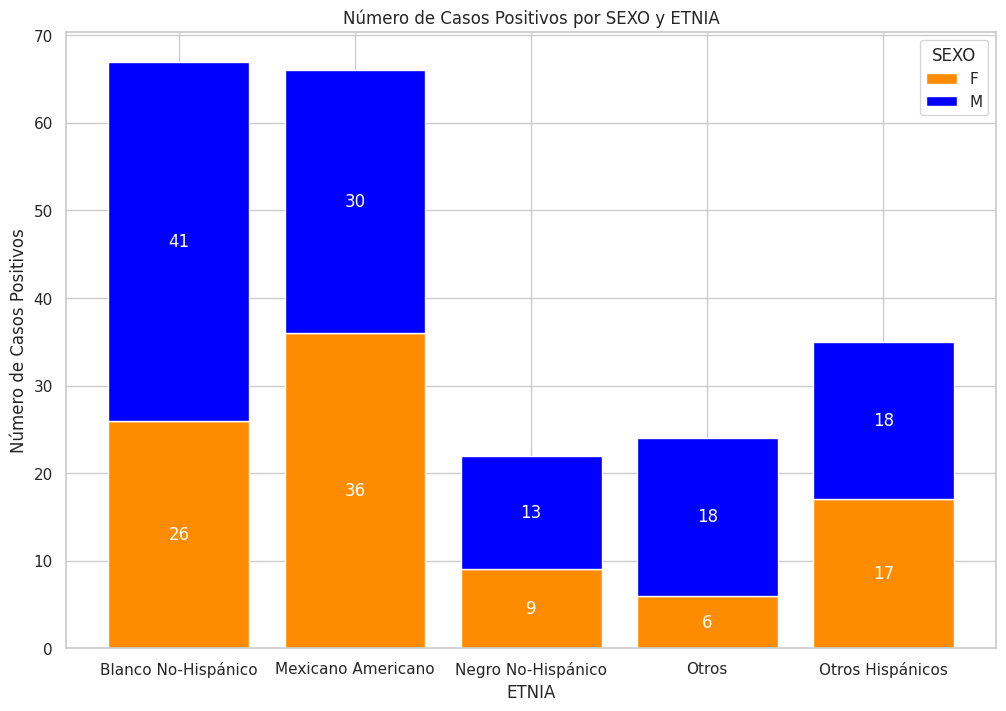

In [77]:
# 44 - GRÁFICO DE CASOS POSITIVOS POR SEXO Y ETNIA

import matplotlib.pyplot as plt
import numpy as np

# Definir colores para cada SEXO
colors = {'M': 'blue', 'F': 'darkorange'}

# Extraer los números de casos positivos y convertirlos a enteros para cada SEXO
for col in casos_positivos_pivot_val.columns:  # Incluyendo la columna 'TOTAL'
    casos_positivos_pivot_val[col] = casos_positivos_pivot_val[col].apply(lambda x: int(x.split(" ")[0]) if isinstance(x, str) else x)

# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(12, 8))

# Iniciar la altura acumulada de las barras
bottom_values = np.zeros(len(casos_positivos_pivot_val))

# Dibujar barras y etiquetas para cada SEXO
for col in casos_positivos_pivot_val.columns[:-1]:  # Excluyendo la columna 'TOTAL'
    bar = ax.bar(casos_positivos_pivot_val.index, casos_positivos_pivot_val[col], color=colors[col], label=col, bottom=bottom_values)

    # Calcular la posición de las etiquetas
    heights = bottom_values + casos_positivos_pivot_val[col] / 2

    # Añadir etiquetas centradas en color blanco
    for idx, (rect, height) in enumerate(zip(bar, heights)):
        ax.text(rect.get_x() + rect.get_width() / 2, height, str(casos_positivos_pivot_val[col].iloc[idx]), ha='center', va='center', color='white')

    bottom_values += casos_positivos_pivot_val[col]

# Añadir etiquetas y título
ax.set_ylabel('Número de Casos Positivos')
ax.set_xlabel('ETNIA')
ax.set_title('Número de Casos Positivos por SEXO y ETNIA')
ax.legend(title='SEXO')

In [ ]:
# # 45 - NORMALIZACIÓN DE LAS VARIABLES EXPLICATIVAS POR SEXO (MAX-MIN)
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Crear una copia del DataFrame original para almacenar los datos normalizados
data_norm_val = data_val_ext.copy()

# Identificar las columnas numéricas (float64 e int64)
numeric_cols = data_val_ext.select_dtypes(include=['float64', 'int64']).columns

# Filtrar columnas que solo toman los valores 0 y 1, y la columna 'N+'
filtered_cols = [col for col in numeric_cols if len(data_val_ext[col].unique()) > 2 and col != 'N+']

# Inicializar el MinMaxScaler
scaler = MinMaxScaler()

# Normalizar las columnas filtradas por SEXO
for sex in ['M', 'F']:
    subset = data_val_ext[data_val_ext['SEXO'] == sex]
    scaled_values = scaler.fit_transform(subset[filtered_cols])
    data_norm_val.loc[data_norm_val['SEXO'] == sex, filtered_cols] = scaled_values

# Guardar el DataFrame normalizado como un archivo CSV
data_norm_val.to_csv('/content/data_norm_val.csv', index=False)

# Código para descargar el archivo CSV en Google Colab
from google.colab import files
#files.download('/content/data_norm_val.csv')

In [85]:
# 46 VALIDACIÓN DE LAS VARIABLES SELECCIONADAS EN EL MODELO 1.1 (DEFINITIVO) CON UN CONJUNTO DE DATOS EXTERNOS

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, matthews_corrcoef, confusion_matrix
from joblib import dump

# Crear un diccionario para almacenar los resultados por sexo
resultados_por_sexo = {}
importancias_por_sexo = {}

# Obtener los sexos únicos en el DataFrame
sexos_unicos = data_norm_val['SEXO'].unique()

# Definir las variables predictoras específicas para cada sexo
variables_por_sexo = {
    'M': ['EDAD', 'HCT', 'CHCM', 'LEUC', 'LINF', 'EOSI'],
    'F': ['EDAD', 'VCM', 'RDW', 'LEUC']
}

# Iterar sobre cada sexo y ajustar un modelo de árbol de decisión con validación cruzada
for sexo in sexos_unicos:
    # Filtrar el DataFrame por sexo
    data_sexo = data_norm_val[data_norm_val['SEXO'] == sexo]

    # Utilizar las variables predictoras específicas para el sexo actual
    variables_predictoras = variables_por_sexo[sexo]

    # Separar las variables predictoras y la variable objetivo
    X = data_sexo[variables_predictoras]
    y = data_sexo['SM']

    # Realizar validación cruzada de 10-fold para evaluar el modelo
    modelo_cart_fin = DecisionTreeClassifier(criterion='gini', max_depth=3, class_weight='balanced', random_state=42)
    scores = cross_val_score(modelo_cart_fin, X, y, cv=10, scoring='roc_auc')

    # Entrenar el modelo en el conjunto de datos completo
    modelo_cart_fin.fit(X, y)

    # Guardar el modelo entrenado
    dump(modelo_cart_fin, f'modelo_cart_fin_{sexo}.joblib')

    # Calcular métricas de rendimiento
    y_pred = modelo_cart_fin.predict(X)
    y_prob = modelo_cart_fin.predict_proba(X)[:, 1]
    mcc = matthews_corrcoef(y, y_pred)
    roc_auc = roc_auc_score(y, y_prob)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    sensibilidad = tp / (tp + fn)
    especificidad = tn / (tn + fp)

    # Almacenar los resultados en el diccionario por sexo
    resultados_por_sexo[sexo] = {
        "Variables en el Árbol": variables_predictoras,
        "MCC": mcc,
        "AUC": roc_auc,
        "Sensibilidad": sensibilidad,
        "Especificidad": especificidad
    }

    # Imprimir los resultados
    print(f"Resultados para Sexo: {sexo}")
    print("Variables en el Árbol:")
    print(variables_predictoras)
    print("MCC:", mcc)
    print("AUC:", roc_auc)
    print("Sensibilidad:", sensibilidad)
    print("Especificidad:", especificidad)
    print("\n")

# Crear un DataFrame para los resultados por sexo
resultados_df = pd.DataFrame.from_dict(resultados_por_sexo, orient='index')
resultados_df.index.name = 'Sexo'

# Guardar el DataFrame en un archivo CSV
resultados_df.to_csv('resultados_por_sexo.csv')

Resultados para Sexo: M
Variables en el Árbol:
['EDAD', 'HCT', 'CHCM', 'LEUC', 'LINF', 'EOSI']
MCC: 0.3371503654409765
AUC: 0.7118652743652744
Sensibilidad: 0.925
Especificidad: 0.4643734643734644


Resultados para Sexo: F
Variables en el Árbol:
['EDAD', 'VCM', 'RDW', 'LEUC']
MCC: 0.37585801741080543
AUC: 0.8067005398539219
Sensibilidad: 0.9468085106382979
Especificidad: 0.49850746268656715




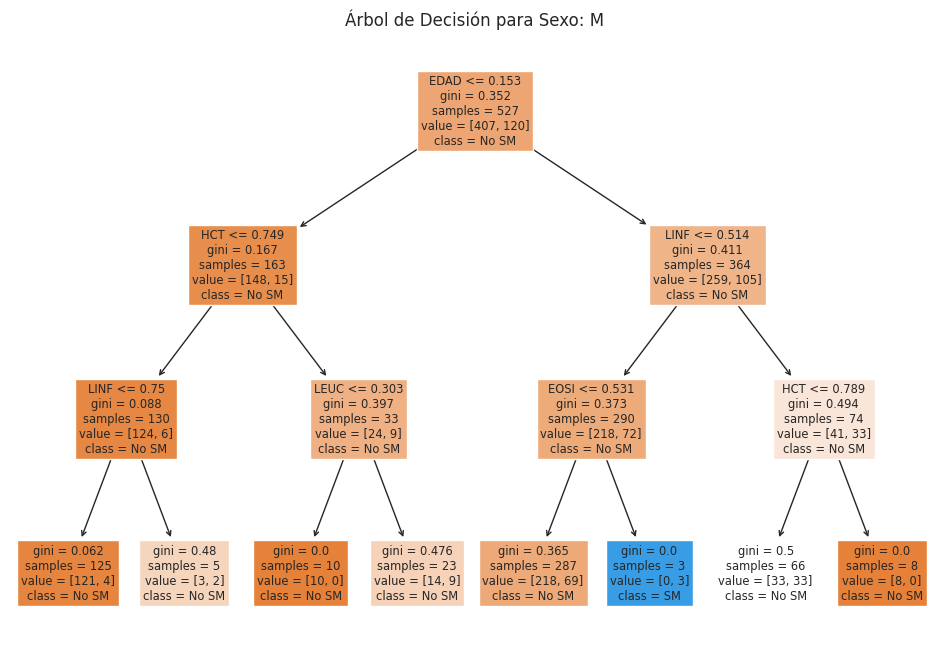

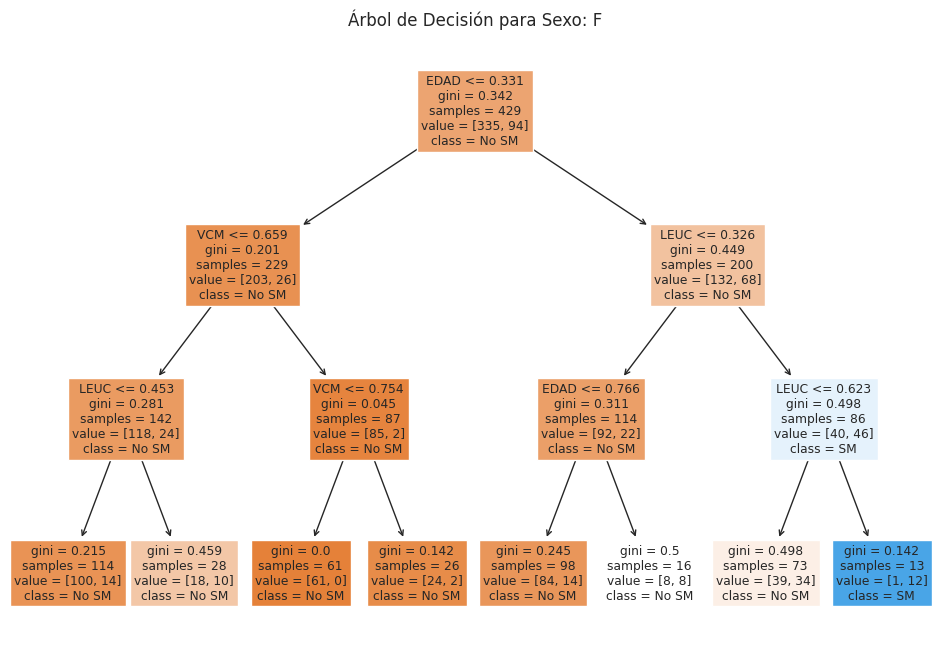

In [86]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Definir las variables predictoras específicas para cada sexo
variables_por_sexo = {
    'M': ['EDAD', 'HCT', 'CHCM', 'LEUC', 'LINF', 'EOSI'],
    'F': ['EDAD', 'VCM', 'RDW', 'LEUC']
}

# Obtener los sexos únicos en el DataFrame
sexos_unicos = data_norm_val['SEXO'].unique()

# Iterar sobre cada sexo y ajustar un modelo de árbol de decisión
for sexo in sexos_unicos:
    # Filtrar el DataFrame por sexo
    data_sexo = data_norm_val[data_norm_val['SEXO'] == sexo]

    # Utilizar las variables predictoras específicas para el sexo actual
    variables_predictoras = variables_por_sexo[sexo]

    # Separar las variables predictoras y la variable objetivo
    X = data_sexo[variables_predictoras]
    y = data_sexo['SM']

    # Crear y entrenar el modelo de árbol de decisión (sin balanceo de clases)
    modelo_cart_fin = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
    modelo_cart_fin.fit(X, y)

    # Visualizar el árbol de decisión
    plt.figure(figsize=(12, 8))
    plot_tree(modelo_cart_fin, filled=True, feature_names=variables_predictoras, class_names=['No SM', 'SM'])
    plt.title(f"Árbol de Decisión para Sexo: {sexo}")
    plt.show()


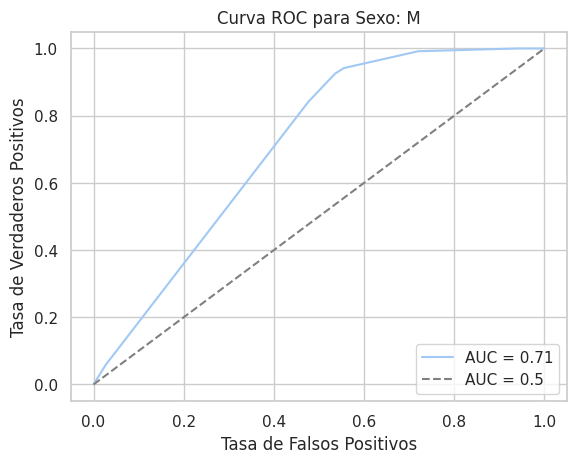

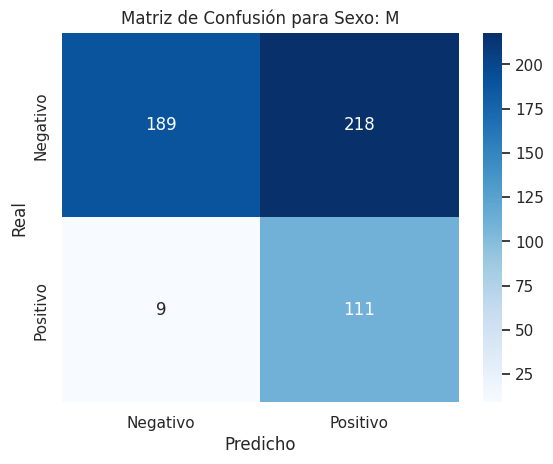

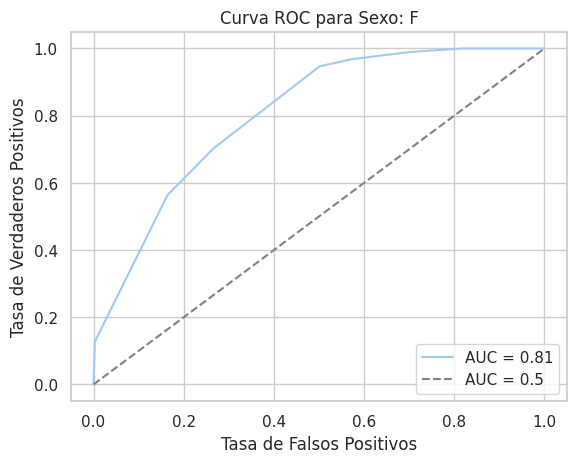

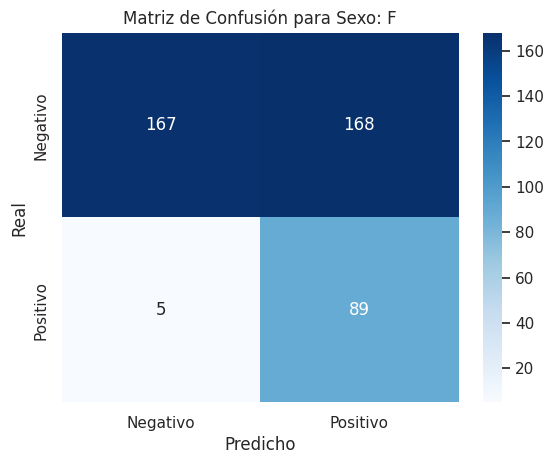

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

# Definir las variables predictoras específicas para cada sexo
variables_por_sexo = {
    'M': ['EDAD', 'HCT', 'CHCM', 'LEUC', 'LINF', 'EOSI'],
    'F': ['EDAD', 'VCM', 'RDW', 'LEUC']
}

# Obtener los sexos únicos en el DataFrame
sexos_unicos = data_norm_val['SEXO'].unique()

# Función para mostrar la curva ROC y AUC para cada sexo
def mostrar_curva_roc_auc(sexo, X, y, modelo):
    y_prob = modelo.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_prob)
    roc_auc = roc_auc_score(y, y_prob)

    plt.figure()
    plt.title(f'Curva ROC para Sexo: {sexo}')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='AUC = 0.5')
    plt.legend(loc='lower right')
    plt.show()

# Función para mostrar la matriz de confusión usando Seaborn
def mostrar_matriz_confusion(sexo, y, y_pred):
    conf_matrix = confusion_matrix(y, y_pred)
    labels = ['Negativo', 'Positivo']

    plt.figure()
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'Matriz de Confusión para Sexo: {sexo}')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()

# Iterar sobre cada sexo para mostrar los gráficos
for sexo in sexos_unicos:
    data_sexo = data_norm_val[data_norm_val['SEXO'] == sexo]

    # Utilizar las variables predictoras específicas para el sexo actual
    variables_predictoras = variables_por_sexo[sexo]

    X = data_sexo[variables_predictoras]
    y = data_sexo['SM']

    modelo_cart_fin = DecisionTreeClassifier(criterion='gini', max_depth=3, class_weight='balanced', random_state=42)
    modelo_cart_fin.fit(X, y)
    y_pred = modelo_cart_fin.predict(X)

    # Mostrar la curva ROC y AUC
    mostrar_curva_roc_auc(sexo, X, y, modelo_cart_fin)

    # Mostrar la matriz de confusión
    mostrar_matriz_confusion(sexo, y, y_pred)
